In [552]:
import pandas as pd

In [553]:
import matplotlib.pyplot as plt
import seaborn as sns
from prophet.plot import plot_plotly, plot_components_plotly


In [554]:
path = r'/content/drive/MyDrive/Colab Notebooks/Walmart.csv'

In [555]:
df = pd.read_csv(path)

In [556]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [558]:
#df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-558-17c89a58c7c0>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [559]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [561]:
df['Date'].dt.year.unique()

array([2010, 2011, 2012])

In [562]:
## store 1

# store_1 = df[df['Store']==1]
# sorted_store1 = store_1.sort_values(by= 'Date')
# plt.figure(figsize=(12, 6))
# sns.lineplot(data = sorted_store1, x='Date', y='Weekly_Sales')
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.title("Line plot of weekly sales")
# plt.xticks(rotation=20)
# plt.show()

FOR ALL STORE

In [563]:
# for i in range(1, 46):
#   store_i = df[df['Store']==i]
#   sorted_store_i = store_i.sort_values(by='Date')
#   plt.figure(figsize=(12, 6))
#   sns.lineplot(data = sorted_store_i, x='Date', y='Weekly_Sales')
#   plt.xlabel("Date")
#   plt.ylabel("Sales")
#   plt.title(f"Line plot of weekly sales for Store:{i}")
#   plt.xticks(rotation=20)
#   plt.show()

# Store Sales behaviour


*   default Behaviour = Seasonal with more sales during christmas holidays and a month before that
---
3 :  Less than a Million sales. Not so smooth with little bit default behaviour, sales values normal.
<br>17: default but not huge increase
<br>18: a drop during feb/mar of 2011 (outliear)
<br>30: less than M sales
<br>33: Less than M sales
<br>36: decline in sales
<br>37: stagnent sales with minor improment during holidays
<br>38: gradual growth with no realation with holidays
<br>42: constant sales
<br>43: constant sales (declining)
<br>44: default but improving

# Problem Statement 1:
### A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

## 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

#### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

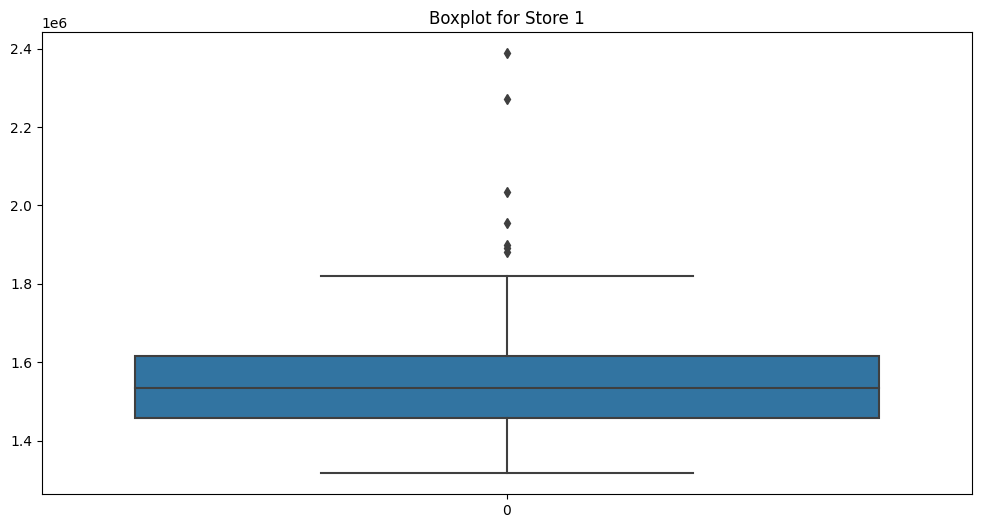

In [564]:
store_1 = df[df['Store'] == 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=store_1['Weekly_Sales'])
plt.title(f'Boxplot for Store {1}')
plt.show()

<ipython-input-565-b9770146a1de>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

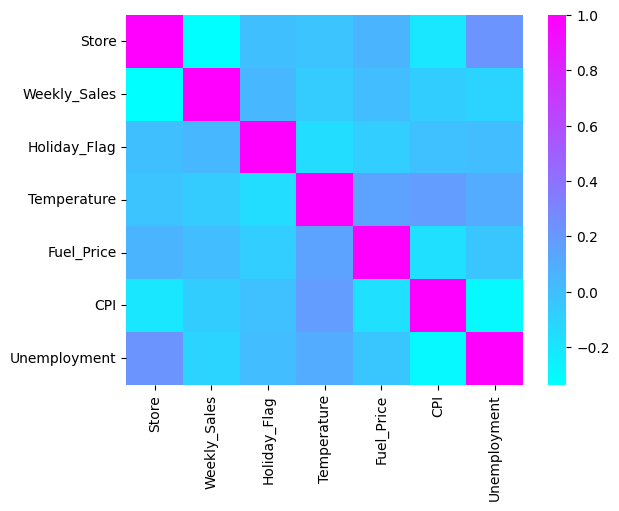

In [565]:
sns.heatmap(data = df.corr(), cmap='cool')

In [566]:
df.corr()

<ipython-input-566-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

- From corealation plot we can see that Unemployment and Weekly_sales don't have any corealtion

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [567]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

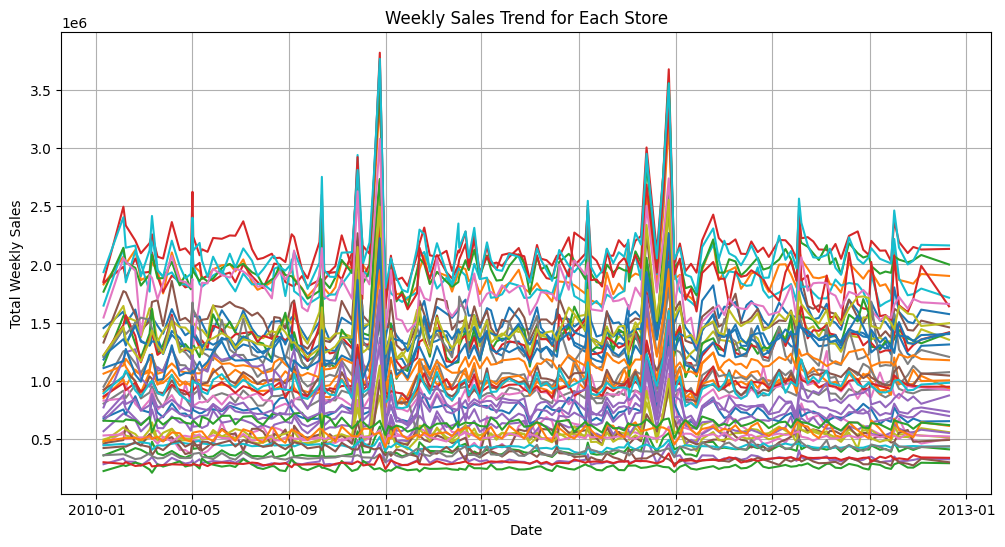

In [568]:
store_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum()

unique_stores = df['Store'].unique()


plt.figure(figsize=(12, 6))
for store in unique_stores:
    store_data = store_sales[store_sales.index.get_level_values('Store') == store]
    plt.plot(store_data.index.get_level_values('Date'), store_data.values, label=f'Store {store}')

plt.title('Weekly Sales Trend for Each Store')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
# plt.legend()
plt.grid(True)
plt.show()

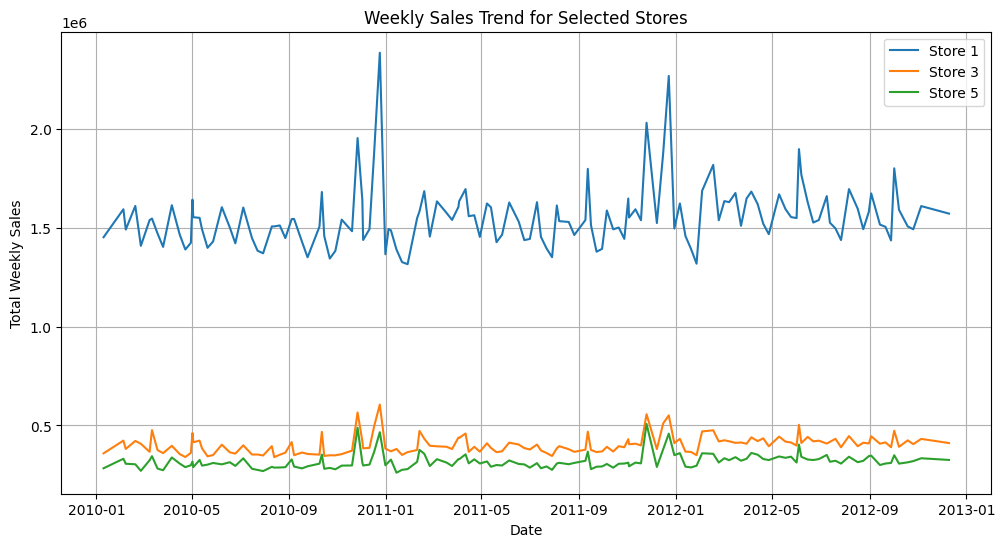

In [569]:
selected_stores = [1, 3, 5]

selected_store_sales = df[df['Store'].isin(selected_stores)]

store_sales = selected_store_sales.groupby(['Store', 'Date'])['Weekly_Sales'].sum()

plt.figure(figsize=(12, 6))
for store in selected_stores:
    store_data = store_sales[store_sales.index.get_level_values('Store') == store]
    plt.plot(store_data.index.get_level_values('Date'), store_data.values, label=f'Store {store}')

plt.title('Weekly Sales Trend for Selected Stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [570]:
year_2010 = df[df['Date'].dt.year == 2010]

In [571]:
df['Date'].dt.year.unique()

array([2010, 2011, 2012])

In [572]:
year_2010

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6335     45 2010-03-12     879244.90             0        40.93       3.046   
6336     45 2010-10-12    1002364.34             0        30.54       3.109   
6337     45 2010-12-17    1123282.85             0        30.51       3.140   
6338     45 2010-12-24    1682862.03             0        30.59       3.141   
6339     45 2010-12-31     679156.20             1        29.67       3.179   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6335  182.667615         8.724  
6336  182.551954         8.724  
6337  182.517732         8.724  
6338  182.544590         8.724  
6339  182.571448         8.724  

[2160 rows x 8 columns]

In [573]:
weekly_sales_for_2010 = year_2010.groupby(['Store','Date'])['Weekly_Sales'].sum()

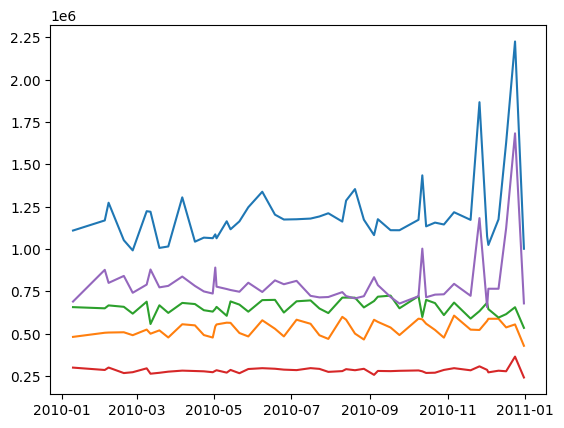

In [574]:
selected_stores = range(41,46)
for store in selected_stores:
    store_data = weekly_sales_for_2010[weekly_sales_for_2010.index.get_level_values('Store') == store]
    plt.plot(store_data.index.get_level_values('Date'), store_data.values)

For 2011- checking if the seasonality trend continues

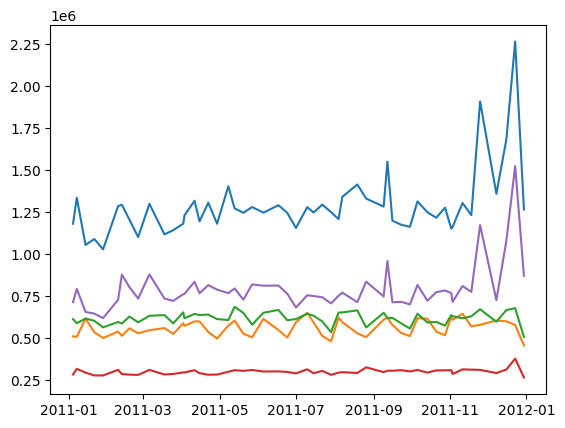

In [575]:
year_2011 = df[df['Date'].dt.year == 2011]
weekly_sales_for_2011 = year_2011.groupby(['Store','Date'])['Weekly_Sales'].sum()

selected_stores = range(41,46)
for store in selected_stores:
    store_data = weekly_sales_for_2011[weekly_sales_for_2011.index.get_level_values('Store') == store]
    plt.plot(store_data.index.get_level_values('Date'), store_data.values)

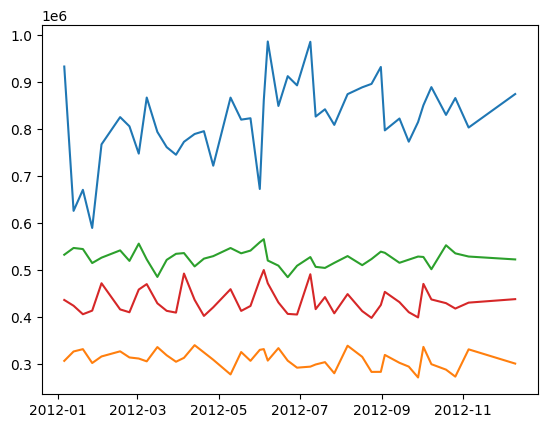

In [576]:
year_2012 = df[df['Date'].dt.year == 2012]
weekly_sales_for_2012 = year_2012.groupby(['Store','Date'])['Weekly_Sales'].sum()

selected_stores = range(35,39)
for store in selected_stores:
    store_data = weekly_sales_for_2012[weekly_sales_for_2012.index.get_level_values('Store') == store]
    plt.plot(store_data.index.get_level_values('Date'), store_data.values)

Sales spike during christmas and the begning of december.

The Seasonal trend continues for the next year too

Trend doesn't have enough data for 2012

### c. Does temperature affect the weekly sales in any manner?

In [577]:
df.corr()

<ipython-input-577-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

The correaltion between temperature and Weekly Sales is -0.063810, which is neligable hence the answer is NO.

### d. How is the Consumer Price index affecting the weekly sales of various stores?

Correlation is -0.072634, so it is negligable, hence answer is NO.

### e. Top performing stores according to the historical data.

In [578]:
e = df.groupby(['Store','Date']).sum()
e

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store Date                                                              
1     2010-01-10    1453329.50             0        71.89       2.603   
      2010-02-04    1594968.28             0        62.27       2.719   
      2010-02-07    1492418.14             0        80.91       2.669   
      2010-02-19    1611968.17             0        39.93       2.514   
      2010-02-26    1409727.59             0        46.63       2.561   
...                        ...           ...          ...         ...   
45    2012-10-08     733037.32             0        78.65       3.722   
      2012-10-19     718125.53             0        56.47       3.969   
      2012-10-26     760281.43             0        58.85       3.882   
      2012-11-05     770487.37             0        61.24       3.889   
      2012-12-10     734464.36             0        54.47       4.000   

                         CPI  Unemployment  
Store Date                                  
1     2010-01-10  211.671989         7.838  
      2010-02-04  210.820450         7.808  
      2010-02-07  211.223533         7.787  
      2010-02-19  211.289143         8.106  
      2010-02-26  211.319643         8.106  
...                      ...           ...  
45    2012-10-08  191.162613         8.684  
      2012-10-19  192.330854         8.667  
      2012-10-26  192.308899         8.667  
      2012-11-05  190.976417         8.567  
      2012-12-10  192.327265         8.667  

[6435 rows x 6 columns]

In [579]:
ea = df.groupby(['Store']).sum()
ea= ea.sort_values(by = 'Weekly_Sales', ascending=False)
ea.loc[:, ['Weekly_Sales']].head(5)

<ipython-input-579-9d2670bb4577>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08

Store 20 Has the highest sales from the historical data, which is followed up by Store number 4,14,13 which aren't that far behind from Store 20

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [580]:
best_performing_store_weekly_sales = ea.iloc[1,0]

In [581]:
worst_performing_store_weekly_sales = ea.iloc[-1,0]

In [582]:
ea[::]

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price           CPI  \
Store                                                                      
20     3.013978e+08            10      7929.55     488.718  29892.452680   
4      2.995440e+08            10      8902.23     460.027  18401.192733   
14     2.889999e+08            10      8264.11     488.718  26638.851959   
13     2.865177e+08            10      7678.69     469.919  18401.192733   
2      2.753824e+08            10      9754.94     460.417  30837.422420   
10     2.716177e+08            10     10330.49     511.357  18401.192733   
27     2.538559e+08            10      8195.49     511.696  19878.613542   
6      2.237561e+08            10      9967.10     460.417  31110.107182   
1      2.224028e+08            10      9767.87     460.417  30887.555523   
39     2.074455e+08            10     10095.42     460.417  30706.256907   
19     2.066349e+08            10      7478.19     511.696  19318.242848   
31     1.996139e+08            10      9845.21     460.417  30837.422420   
23     1.987506e+08            10      6979.13     492.169  19318.242848   
24     1.940160e+08            10      7726.29     511.696  19318.242848   
11     1.939628e+08            10     10364.75     460.417  31372.988971   
28     1.892637e+08            10     10047.58     515.718  18401.192733   
41     1.813419e+08            10      6922.68     463.543  27693.986741   
32     1.668192e+08            10      7542.90     463.543  27693.986741   
18     1.551147e+08            10      7632.09     492.169  19318.242848   
22     1.470756e+08            10      7850.29     492.169  19878.613542   
12     1.442872e+08            10     10047.58     515.718  18401.192733   
26     1.434164e+08            10      6243.13     492.169  19318.242848   
34     1.382498e+08            10      8364.91     460.027  18401.192733   
40     1.378703e+08            10      6817.46     492.169  19318.242848   
35     1.315207e+08            10      8195.49     488.718  19878.613542   
8      1.299512e+08            10      8939.50     460.417  31379.780750   
17     1.277821e+08            10      6633.37     469.919  18401.192733   
45     1.123953e+08            10      8264.11     488.718  26638.851959   
21     1.081179e+08            10      9845.21     460.417  30837.422420   
25     1.010612e+08            10      7455.79     488.718  29892.452680   
43     9.056544e+07            10      9849.51     460.417  29706.128216   
15     8.913368e+07            10      7412.24     511.696  19318.242848   
7      8.159828e+07            10      5680.00     463.543  27693.986741   
42     7.956575e+07            10     10330.49     511.357  18401.192733   
9      7.778922e+07            10      9691.85     460.417  31406.616557   
29     7.714155e+07            10      7850.29     492.169  19318.242848   
16     7.425243e+07            10      6439.30     463.543  27693.986741   
37     7.420274e+07            10     10175.93     460.417  30706.256907   
30     6.271689e+07            10      9845.21     460.417  30837.422420   
3      5.758674e+07            10     10215.09     460.417  31372.988971   
38     5.515963e+07            10     10047.58     515.718  18401.192733   
36     5.341221e+07            10     10175.93     458.201  30706.256907   
5      4.547569e+07            10      9925.65     460.417  30968.878137   
44     4.329309e+07            10      7678.69     469.919  18401.192733   
33     3.716022e+07            10     10972.13     511.357  18401.192733   

       Unemployment  
Store                
20         1054.112  
4           852.951  
14         1236.771  
13         1001.261  
2          1090.210  
10         1195.904  
27         1144.250  
6           944.787  
1          1088.290  
39         1125.274  
19         1143.464  
31         1090.210  
23          685.830  
24         1207.923  
11         1026.309  
28         1875.657  
41          997.193  
32         1227.

In [583]:
worst_performing_store_weekly_sales
#store 33

37160221.96

In [584]:
best_performing_store_weekly_sales
#store 20

299543953.38

In [585]:
difference = best_performing_store_weekly_sales/worst_performing_store_weekly_sales
print('The difference is: ', round(difference, 2))
print('The difference in sales numbers is: ', best_performing_store_weekly_sales - worst_performing_store_weekly_sales, '$')

The difference is:  8.06
The difference in sales numbers is:  262383731.42 $


Store 20 is the best performer, Store 33 is the worst performer.
store 20's weekly sales is 8 times more than store 33's weekly sales.

## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [586]:
Store1 = df[df['Store']==1]
Store1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90             0        42.31       2.572   
1        1 2010-12-02    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-05-03    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-05-10    1670785.97             0        68.55       3.617   
140      1 2012-12-10    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment  
0    211.096358         8.106  
1    211.242170         8.106  
2    211.289143         8.106  
3    211.319643         8.106  
4    211.350143         8.106  
..          ...           ...  
138  222.981658         6.908  
139  223.181477         6.573  
140  223.381296         6.573  
141  223.425723         6.573  
142  223.444251         6.573  

[143 rows x 8 columns]

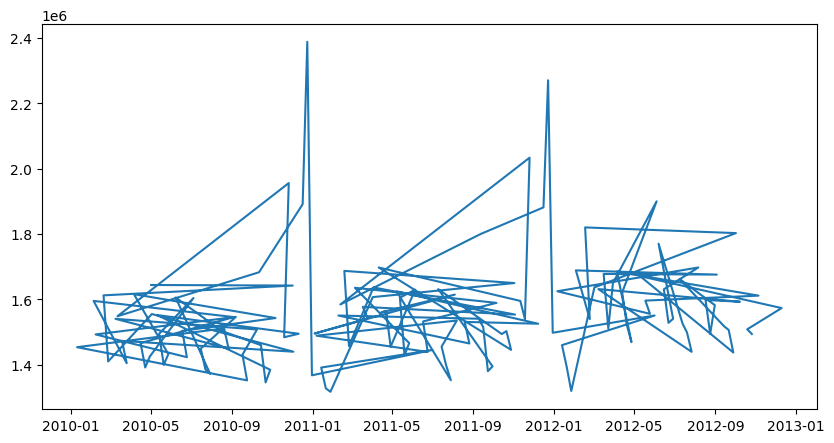

In [587]:
plt.figure(figsize=(10,5))
plt.plot(Store1['Date'], Store1['Weekly_Sales'])
plt.show()

In [588]:
Store1 = Store1.sort_values(by = 'Date')

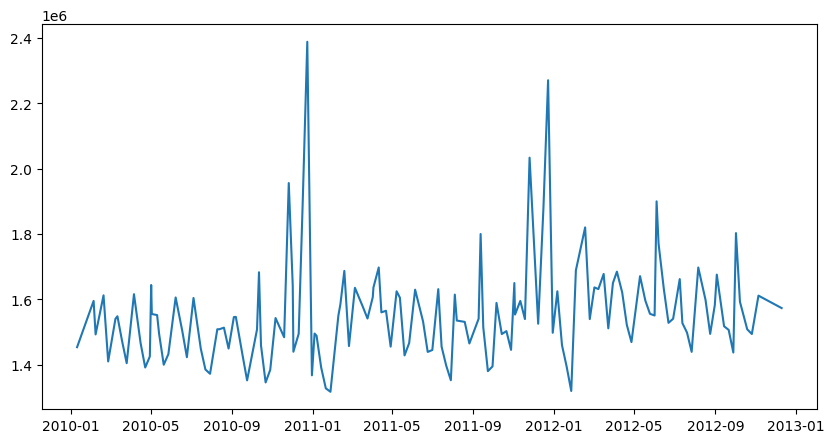

In [589]:
plt.figure(figsize=(10,5))
plt.plot(Store1['Date'], Store1['Weekly_Sales'])
plt.show()

In [590]:
Store1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
34       1 2010-01-10    1453329.50             0        71.89       2.603   
8        1 2010-02-04    1594968.28             0        62.27       2.719   
21       1 2010-02-07    1492418.14             0        80.91       2.669   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
..     ...        ...           ...           ...          ...         ...   
131      1 2012-10-08    1592409.97             0        85.05       3.494   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   
118      1 2012-11-05    1611096.05             0        73.77       3.688   
140      1 2012-12-10    1573072.81             0        62.99       3.601   

            CPI  Unemployment  
34   211.671989         7.838  
8    210.820450         7.808  
21   211.223533         7.787  
2    211.289143         8.106  
3    211.319643         8.106  
..          ...           ...  
131  221.958433         6.908  
141  223.425723         6.573  
142  223.444251         6.573  
118  221.725663         7.143  
140  223.381296         6.573  

[143 rows x 8 columns]

In [591]:
Store1.set_index('Date',inplace = True)

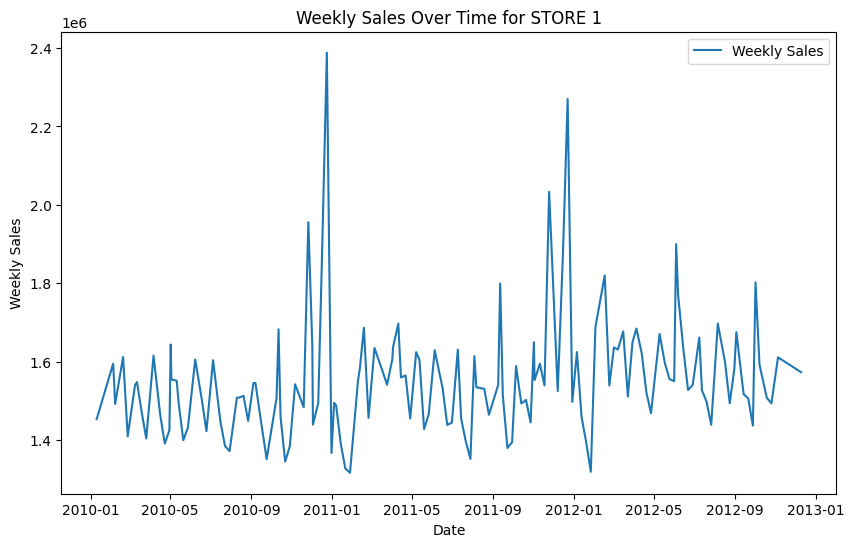

In [592]:
plt.figure(figsize=(10, 6))
plt.plot(Store1.index, Store1['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time for STORE 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [593]:
Store1.tail()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-10-08      1    1592409.97             0        85.05       3.494   
2012-10-19      1    1508068.77             0        67.97       3.594   
2012-10-26      1    1493659.74             0        69.16       3.506   
2012-11-05      1    1611096.05             0        73.77       3.688   
2012-12-10      1    1573072.81             0        62.99       3.601   

                   CPI  Unemployment  
Date                                  
2012-10-08  221.958433         6.908  
2012-10-19  223.425723         6.573  
2012-10-26  223.444251         6.573  
2012-11-05  221.725663         7.143  
2012-12-10  223.381296         6.573

2012-12-10 is the end of our data

In [594]:
Store1.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [595]:
Store1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      1    1453329.50             0        71.89       2.603   
2010-02-04      1    1594968.28             0        62.27       2.719   
2010-02-07      1    1492418.14             0        80.91       2.669   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
...           ...           ...           ...          ...         ...   
2012-10-08      1    1592409.97             0        85.05       3.494   
2012-10-19      1    1508068.77             0        67.97       3.594   
2012-10-26      1    1493659.74             0        69.16       3.506   
2012-11-05      1    1611096.05             0        73.77       3.688   
2012-12-10      1    1573072.81             0        62.99       3.601   

                   CPI  Unemployment  
Date                                  
2010-01-10  211.671989         7.838  
2010-02-04  210.820450         7.808  
2010-02-07  211.223533         7.787  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
...                ...           ...  
2012-10-08  221.958433         6.908  
2012-10-19  223.425723         6.573  
2012-10-26  223.444251         6.573  
2012-11-05  221.725663         7.143  
2012-12-10  223.381296         6.573  

[143 rows x 7 columns]

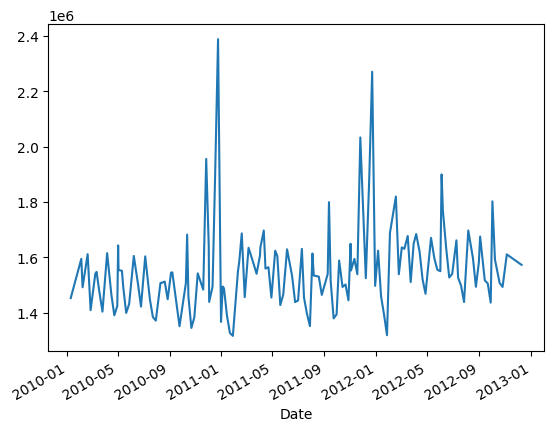

In [596]:
ax = Store1.Weekly_Sales.plot()

Linear Regression

In [597]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [598]:
import numpy as np

In [599]:
Store1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      1    1453329.50             0        71.89       2.603   
2010-02-04      1    1594968.28             0        62.27       2.719   
2010-02-07      1    1492418.14             0        80.91       2.669   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
...           ...           ...           ...          ...         ...   
2012-10-08      1    1592409.97             0        85.05       3.494   
2012-10-19      1    1508068.77             0        67.97       3.594   
2012-10-26      1    1493659.74             0        69.16       3.506   
2012-11-05      1    1611096.05             0        73.77       3.688   
2012-12-10      1    1573072.81             0        62.99       3.601   

                   CPI  Unemployment  
Date                                  
2010-01-10  211.671989         7.838  
2010-02-04  210.820450         7.808  
2010-02-07  211.223533         7.787  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
...                ...           ...  
2012-10-08  221.958433         6.908  
2012-10-19  223.425723         6.573  
2012-10-26  223.444251         6.573  
2012-11-05  221.725663         7.143  
2012-12-10  223.381296         6.573  

[143 rows x 7 columns]

X and Y, features and value

In [600]:
X = Store1.drop(columns=(['Weekly_Sales','Store']))
y = Store1.Weekly_Sales

In [601]:
model = LinearRegression()

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [603]:
X_train

Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
Date                                                                       
2011-11-03             0        53.56       3.459  214.111056         7.742
2011-11-11             0        59.11       3.297  217.998085         7.866
2011-07-15             0        88.54       3.575  215.361109         7.962
2010-09-17             0        82.11       2.582  211.522460         7.787
2012-06-29             0        84.88       3.286  221.843400         7.143
...                  ...          ...         ...         ...           ...
2010-05-03             0        46.50       2.625  211.350143         8.106
2011-10-06             0        83.13       3.648  215.043523         7.682
2012-09-21             0        69.87       3.721  222.781839         6.908
2012-03-08             0        86.11       3.417  221.949864         6.908
2010-09-04             0        65.86       2.770  210.622857         7.808

[114 rows x 5 columns]

In [604]:
X_test

Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
Date                                                                       
2012-11-05             0        73.77       3.688  221.725663         7.143
2012-05-25             0        77.22       3.561  221.744944         7.143
2011-12-08             0        90.76       3.638  215.605788         7.962
2012-09-14             0        74.97       3.717  222.582019         6.908
2010-10-15             0        67.18       2.720  211.813744         7.838
2012-06-15             0        79.35       3.393  221.762642         7.143
2011-07-22             0        85.77       3.651  215.422278         7.962
2010-01-10             0        71.89       2.603  211.671989         7.838
2012-07-13             0        77.12       3.256  221.924158         6.908
2011-03-06             0        83.00       3.699  215.273655         7.682
2011-07-10             0        69.31       3.285  217.045368         7.866
2012-03-30             0        67.61       3.845  221.361012         7.348
2010-06-18             0        84.11       2.637  211.453772         7.808
2012-01-06             0        77.95       3.501  221.747214         7.143
2012-03-02             0        56.55       3.360  220.172015         7.348
2010-02-19             0        39.93       2.514  211.289143         8.106
2012-04-13             0        69.07       3.891  221.510210         7.143
2010-03-09             0        81.21       2.577  211.531248         7.787
2011-02-12             0        48.91       3.172  218.714733         7.866
2010-04-30             0        67.41       2.780  210.389546         7.808
2011-09-12             0        43.93       3.158  218.961846         7.866
2010-12-17             0        49.84       2.869  211.405312         7.838
2012-10-08             0        85.05       3.494  221.958433         6.908
2010-12-03             0        57.79       2.667  211.380643         8.106
2011-10-14             0        71.74       3.274  217.355273         7.866
2012-08-17             0        84.85       3.571  222.038411         6.908
2011-01-14             0        35.40       2.983  211.457411         7.742
2010-05-14             0        74.78       2.854  210.337426         7.808
2010-10-12             0        46.33       2.843  211.465953         7.838

In [605]:
y_train

Date
2011-11-03    1553191.63
2011-11-11    1594938.89
2011-07-15    1455119.97
2010-09-17    1430378.67
2012-06-29    1540421.49
                 ...    
2010-05-03    1554806.68
2011-10-06    1588948.32
2012-09-21    1506126.06
2012-03-08    1631135.79
2010-09-04    1545418.53
Name: Weekly_Sales, Length: 114, dtype: float64

In [606]:
y_test

Date
2012-11-05    1611096.05
2012-05-25    1555444.55
2011-12-08    1525147.09
2012-09-14    1517428.87
2010-10-15    1459409.10
2012-06-15    1630607.00
2011-07-22    1396926.82
2010-01-10    1453329.50
2012-07-13    1527014.04
2011-03-06    1635078.41
2011-07-10    1630989.95
2012-03-30    1649604.63
2010-06-18    1503284.06
2012-01-06    1624477.58
2012-03-02    1636339.65
2010-02-19    1611968.17
2012-04-13    1621031.70
2010-03-09    1540163.53
2011-02-12    1584083.95
2010-04-30    1425100.71
2011-09-12    1799682.38
2010-12-17    1891034.93
2012-10-08    1592409.97
2010-12-03    1439541.59
2011-10-14    1493525.93
2012-08-17    1597868.05
2011-01-14    1391013.96
2010-05-14    1494251.50
2010-10-12    1682614.26
Name: Weekly_Sales, dtype: float64

In [607]:
lr = model.fit(X_train, y_train)

Prediction

In [608]:
X_test_prediction =lr.predict(X_test)

In [609]:
X_test_prediction

array([1578892.69781705, 1575730.22529258, 1513549.90216518,
       1569320.47528942, 1508426.09461923, 1576306.67209783,
       1520033.1865958 , 1499647.07119711, 1566005.08083288,
       1496308.97511073, 1582685.41253852, 1599263.62577966,
       1467611.70371382, 1575927.18336012, 1613903.11367871,
       1583985.11346706, 1579086.30198133, 1474518.83295638,
       1655924.90441986, 1478757.34091301, 1670635.9715011 ,
       1532143.1616683 , 1544200.73460382, 1545506.33765302,
       1583504.15607209, 1543912.46315067, 1550303.66126708,
       1461015.7699159 , 1540967.3884089 ])

In [610]:
X_test.index

DatetimeIndex(['2012-11-05', '2012-05-25', '2011-12-08', '2012-09-14',
               '2010-10-15', '2012-06-15', '2011-07-22', '2010-01-10',
               '2012-07-13', '2011-03-06', '2011-07-10', '2012-03-30',
               '2010-06-18', '2012-01-06', '2012-03-02', '2010-02-19',
               '2012-04-13', '2010-03-09', '2011-02-12', '2010-04-30',
               '2011-09-12', '2010-12-17', '2012-10-08', '2010-12-03',
               '2011-10-14', '2012-08-17', '2011-01-14', '2010-05-14',
               '2010-10-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

Combining the predicted data into a df to visualize

In [611]:
X_test_prediction_df = pd.DataFrame(X_test.index)

In [612]:
X_test_prediction_df['Prediction'] = X_test_prediction

In [613]:
X_test_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        29 non-null     datetime64[ns]
 1   Prediction  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 592.0 bytes


Setting date as index

In [614]:
X_test_prediction_df.set_index("Date", inplace=True)

Sorting values by date

In [615]:
X_test_prediction_df.sort_values(by='Date', inplace=True)

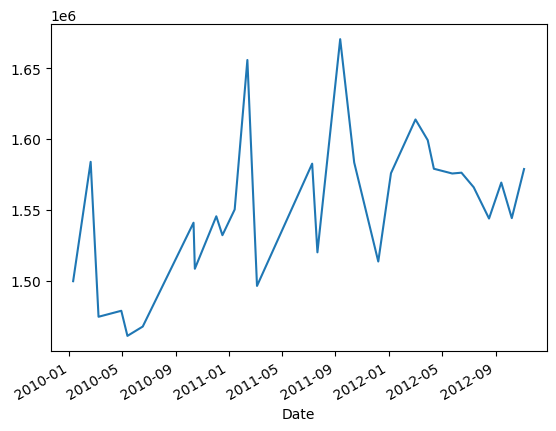

In [616]:
ax = X_test_prediction_df.Prediction.plot()

X_test prediction on actual value

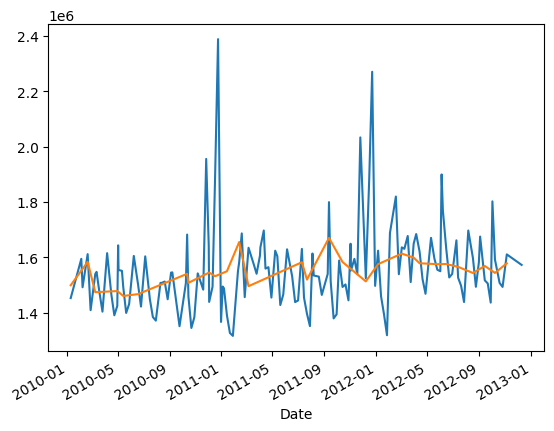

In [617]:
ax = Store1.Weekly_Sales.plot()
plt.plot(X_test_prediction_df)

asdjfjal

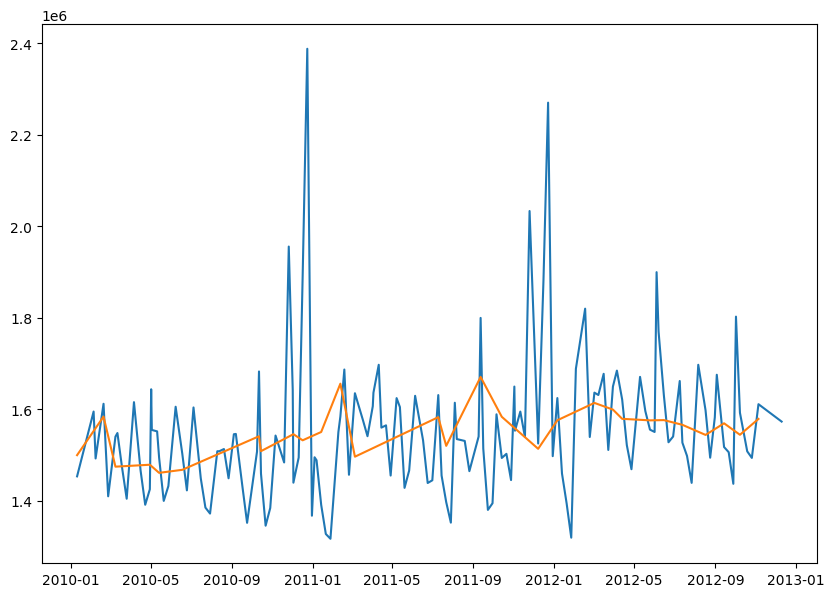

In [618]:
plt.figure(figsize =(10,7))
plt.plot(Store1.index, Store1['Weekly_Sales'])
plt.plot(X_test_prediction_df)

TRAIN TEST SPLITING on the data set is making it hard for the linear regression model to train on.

Training on entire data set and predicting on future dates would be a good idea.

In [619]:
X = Store1.drop(columns=(['Weekly_Sales','Store']))
y = Store1.Weekly_Sales

In [620]:
model = LinearRegression()

In [621]:
lr_whole_data =  model.fit(X ,y)

In [622]:
X_predict_whole = lr_whole_data.predict(X)

In [623]:
X_predict_whole

array([1502605.77517239, 1503997.16820443, 1469963.34301551,
       1588947.49260672, 1573836.11553309, 1476672.00393095,
       1547841.38529602, 1551061.393081  , 1554245.17873049,
       1470463.46062374, 1487563.95325015, 1490253.20521803,
       1484241.43700898, 1579187.83537065, 1573066.66683015,
       1533652.39413339, 1465651.38724405, 1467397.84126146,
       1465038.05698803, 1462158.50180158, 1469342.41909111,
       1466541.51375338, 1470973.80517951, 1464195.36120776,
       1466347.983364  , 1471094.29114447, 1520316.05495073,
       1463163.52202142, 1464001.40517042, 1467586.2704064 ,
       1491713.80229923, 1469634.80388446, 1474459.77912087,
       1477208.77651387, 1571184.08057024, 1548558.4698782 ,
       1512291.5154018 , 1507170.74340077, 1508655.90220016,
       1476576.95060413, 1546382.96470461, 1605962.43478802,
       1679782.06754548, 1548160.65463372, 1531614.52195655,
       1539334.09697248, 1533537.76340909, 1629948.50107238,
       1547801.21577008,

In [624]:
X_predict_whole_df = X.index

In [625]:
X_predict_whole_df= pd.DataFrame(X_predict_whole_df)

In [626]:
X_predict_whole_df.set_index('Date',inplace = True)

In [627]:
X_predict_whole_df['Predicted']= X_predict_whole

In [628]:
X_predict_whole_df

Predicted
Date                    
2010-01-10  1.502606e+06
2010-02-04  1.503997e+06
2010-02-07  1.469963e+06
2010-02-19  1.588947e+06
2010-02-26  1.573836e+06
...                  ...
2012-10-08  1.548976e+06
2012-10-19  1.580975e+06
2012-10-26  1.580854e+06
2012-11-05  1.583602e+06
2012-12-10  1.590825e+06

[143 rows x 1 columns]

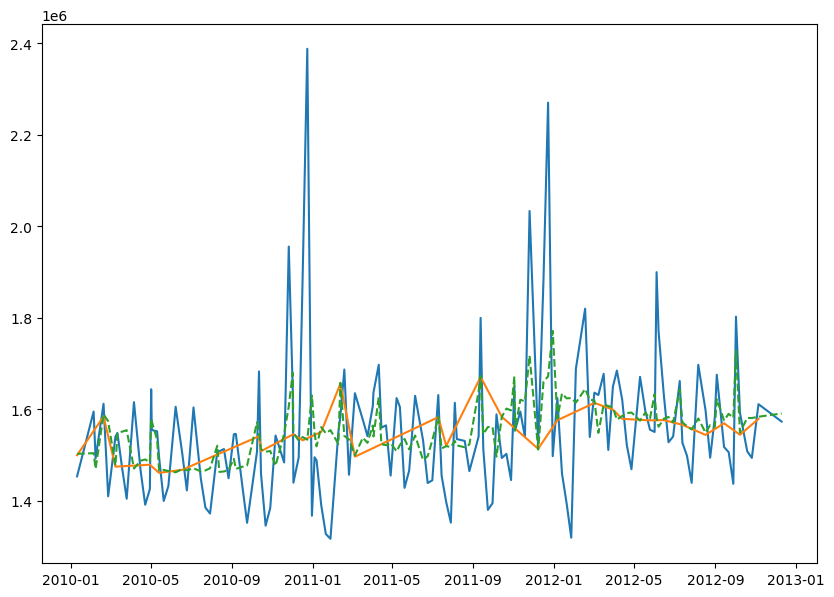

In [629]:
plt.figure(figsize =(10,7))
plt.plot(Store1.index, Store1['Weekly_Sales'])
plt.plot(X_test_prediction_df)
plt.plot(X_predict_whole_df, linestyle='--')

In [630]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mae = mean_absolute_error(Store1.Weekly_Sales, X_predict_whole_df.Predicted)
print(mae)

97691.7283944958


Random Forest

In [631]:
from sklearn.ensemble import RandomForestRegressor

In [632]:
rfr= RandomForestRegressor()

In [633]:
rfr_model=rfr.fit(X,y)
rfr_model

RandomForestRegressor()

In [634]:
rfr_prediction= rfr_model.predict(X)

In [635]:
X

Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
Date                                                                       
2010-01-10             0        71.89       2.603  211.671989         7.838
2010-02-04             0        62.27       2.719  210.820450         7.808
2010-02-07             0        80.91       2.669  211.223533         7.787
2010-02-19             0        39.93       2.514  211.289143         8.106
2010-02-26             0        46.63       2.561  211.319643         8.106
...                  ...          ...         ...         ...           ...
2012-10-08             0        85.05       3.494  221.958433         6.908
2012-10-19             0        67.97       3.594  223.425723         6.573
2012-10-26             0        69.16       3.506  223.444251         6.573
2012-11-05             0        73.77       3.688  221.725663         7.143
2012-12-10             0        62.99       3.601  223.381296         6.573

[143 rows x 5 columns]

In [636]:
rfr_prediction_df= X.index

In [637]:
rfr_prediction_df= pd.DataFrame(rfr_prediction_df)

In [638]:
rfr_prediction_df.set_index('Date', inplace=True)

In [639]:
rfr_prediction_df['Prediction']= rfr_prediction

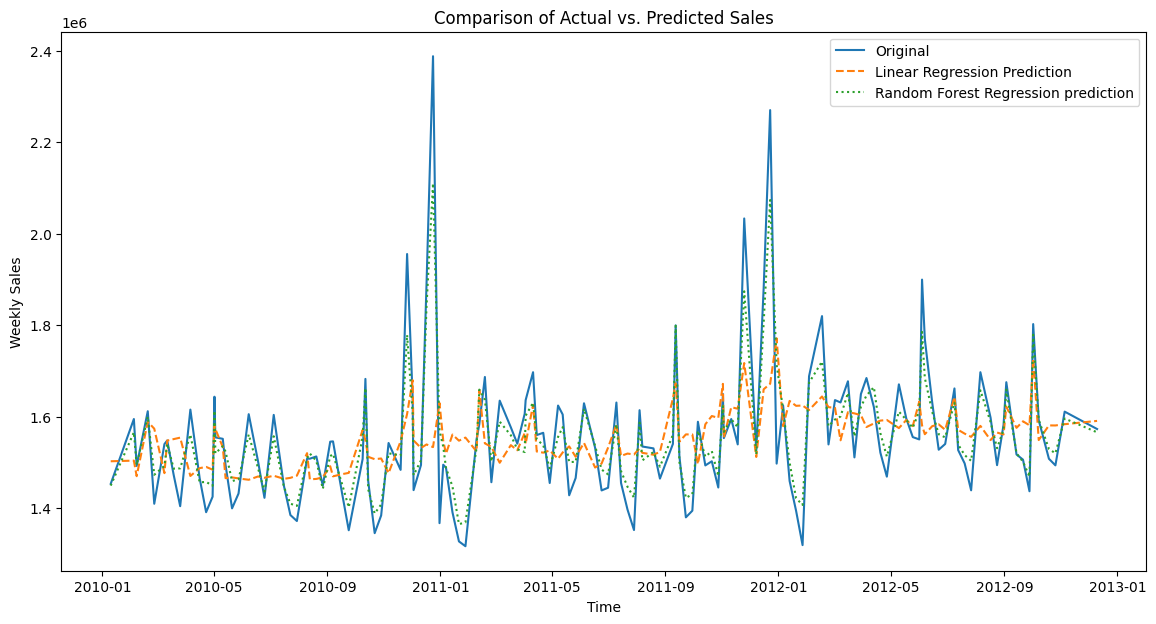

In [640]:
plt.figure(figsize=(14, 7))
plt.plot(Store1.index, Store1['Weekly_Sales'], label='Original')
#plt.plot(X_test_prediction_df)  //basic prediction
plt.plot(X_predict_whole_df, linestyle='--', label='Linear Regression Prediction')
plt.plot(rfr_prediction_df, linestyle=':', label='Random Forest Regression prediction')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual vs. Predicted Sales')
plt.legend()
plt.show()

- From the above graph we find the Random Forest Regression does the best prediction

In [641]:
Store2 = df[df['Store']==2]
Store2 = Store2.set_index('Date')
Store2 = Store2.sort_values(by='Date')
Store2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      2    1827440.43             0        69.24       2.603   
2010-02-04      2    2066187.72             0        63.27       2.719   
2010-02-07      2    2003940.64             0        82.74       2.669   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
...           ...           ...           ...          ...         ...   
2012-10-08      2    1866719.96             0        88.55       3.494   
2012-10-19      2    1847990.41             0        68.08       3.594   
2012-10-26      2    1834458.35             0        69.79       3.506   
2012-11-05      2    1917520.99             0        73.87       3.688   
2012-12-10      2    1900745.13             0        60.97       3.601   

                   CPI  Unemployment  
Date                                  
2010-01-10  211.329874         8.163  
2010-02-04  210.479887         8.200  
2010-02-07  210.880373         8.099  
2010-02-19  210.945160         8.324  
2010-02-26  210.975957         8.324  
...                ...           ...  
2012-10-08  221.595414         6.565  
2012-10-19  223.059808         6.170  
2012-10-26  223.078337         6.170  
2012-11-05  221.363221         6.891  
2012-12-10  223.015426         6.170  

[143 rows x 7 columns]

In [642]:
Store2_X = Store2.drop(columns=(['Store','Weekly_Sales']))
Store2_X

Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
Date                                                                       
2010-01-10             0        69.24       2.603  211.329874         8.163
2010-02-04             0        63.27       2.719  210.479887         8.200
2010-02-07             0        82.74       2.669  210.880373         8.099
2010-02-19             0        39.69       2.514  210.945160         8.324
2010-02-26             0        46.10       2.561  210.975957         8.324
...                  ...          ...         ...         ...           ...
2012-10-08             0        88.55       3.494  221.595414         6.565
2012-10-19             0        68.08       3.594  223.059808         6.170
2012-10-26             0        69.79       3.506  223.078337         6.170
2012-11-05             0        73.87       3.688  221.363221         6.891
2012-12-10             0        60.97       3.601  223.015426         6.170

[143 rows x 5 columns]

In [643]:
Store2_prediction = rfr_model.predict(Store2_X)

In [644]:
store2_prediction_df = Store2_X.index
store2_prediction_df = pd.DataFrame(store2_prediction_df)
store2_prediction_df.set_index('Date', inplace=True)
store2_prediction_df['Prediction'] = Store2_prediction

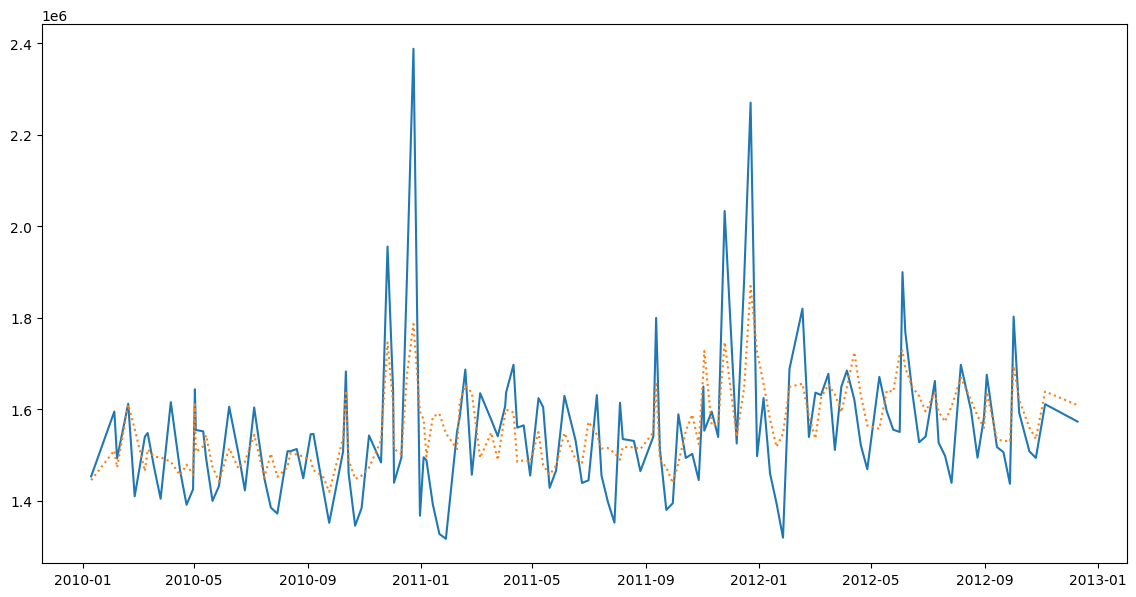

In [645]:
plt.figure(figsize=(14, 7))
plt.plot(Store2.index, Store1['Weekly_Sales'], label='Original')
plt.plot(store2_prediction_df, linestyle=':')

Train test split on store 2

In [646]:
X = Store2.head(131)
X

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      2    1827440.43             0        69.24       2.603   
2010-02-04      2    2066187.72             0        63.27       2.719   
2010-02-07      2    2003940.64             0        82.74       2.669   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
...           ...           ...           ...          ...         ...   
2012-07-13      2    1830075.13             0        80.17       3.256   
2012-07-20      2    1819666.46             0        83.23       3.311   
2012-07-27      2    1757923.88             0        86.37       3.407   
2012-08-06      2    2010216.49             0        78.69       3.452   
2012-08-17      2    1928016.01             0        84.79       3.571   

                   CPI  Unemployment  
Date                                  
2010-01-10  211.329874         8.163  
2010-02-04  210.479887         8.200  
2010-02-07  210.880373         8.099  
2010-02-19  210.945160         8.324  
2010-02-26  210.975957         8.324  
...                ...           ...  
2012-07-13  221.561678         6.565  
2012-07-20  221.570112         6.565  
2012-07-27  221.578546         6.565  
2012-08-06  221.387747         6.891  
2012-08-17  221.675146         6.565  

[131 rows x 7 columns]

In [647]:
y = Store2.tail(12)
y

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-08-24      2    1876788.15             0        76.91       3.620   
2012-08-31      2    1947083.30             0        82.64       3.638   
2012-09-03      2    1937628.26             0        57.11       3.669   
2012-09-14      2    1814806.63             0        75.88       3.717   
2012-09-21      2    1829415.67             0        71.09       3.721   
2012-09-28      2    1746470.56             0        79.45       3.666   
2012-10-02      2    2103322.68             1        46.98       3.409   
2012-10-08      2    1866719.96             0        88.55       3.494   
2012-10-19      2    1847990.41             0        68.08       3.594   
2012-10-26      2    1834458.35             0        69.79       3.506   
2012-11-05      2    1917520.99             0        73.87       3.688   
2012-12-10      2    1900745.13             0        60.97       3.601   

                   CPI  Unemployment  
Date                                  
2012-08-24  221.808352         6.565  
2012-08-31  221.941558         6.565  
2012-09-03  220.697433         7.057  
2012-09-14  222.217440         6.565  
2012-09-21  222.416936         6.565  
2012-09-28  222.616433         6.565  
2012-10-02  219.904907         7.057  
2012-10-08  221.595414         6.565  
2012-10-19  223.059808         6.170  
2012-10-26  223.078337         6.170  
2012-11-05  221.363221         6.891  
2012-12-10  223.015426         6.170

In [648]:
y_train = y.drop(columns=['Weekly_Sales','Store'])

In [649]:
X_train = X.drop(columns=['Weekly_Sales','Store'])
X_goal = X['Weekly_Sales']


In [650]:
rfr = RandomForestRegressor()

In [651]:
Model_Store2 = rfr.fit(X_train, X_goal)

In [652]:
prediction_store2 = Model_Store2.predict(y_train)

In [653]:
prediction_ytrain = y_train[['Temperature']]

In [654]:
prediction_ytrain['Predictions'] = prediction_store2
prediction_ytrain.drop(columns='Temperature', inplace=True)

<ipython-input-654-891b174533cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-654-891b174533cd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [655]:
prediction_ytrain

Predictions
Date                    
2012-08-24  1.943324e+06
2012-08-31  1.917550e+06
2012-09-03  1.958846e+06
2012-09-14  1.939326e+06
2012-09-21  1.963145e+06
2012-09-28  1.946834e+06
2012-10-02  2.102754e+06
2012-10-08  1.903675e+06
2012-10-19  1.961582e+06
2012-10-26  1.963692e+06
2012-11-05  1.975156e+06
2012-12-10  1.955669e+06

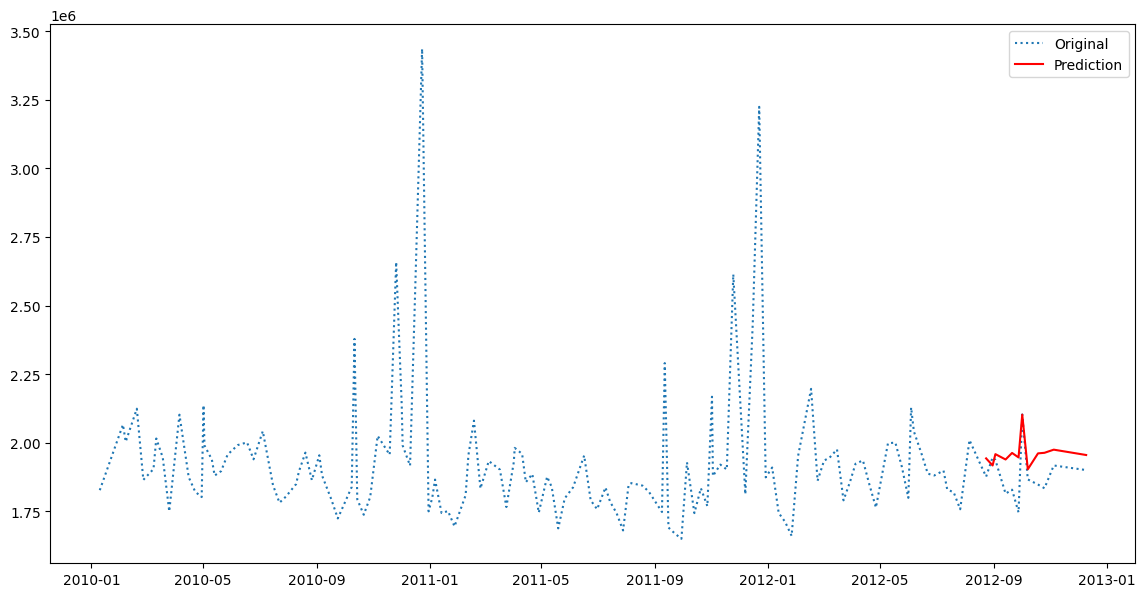

In [656]:
plt.figure(figsize=(14, 7))
plt.plot(Store2.index, Store2['Weekly_Sales'], label='Original', linestyle=':')
plt.plot(prediction_ytrain, linestyle='-', label='Prediction', color = 'red')
plt.legend()

Store2 with lag

In [657]:
Store2['lag1'] = Store2.Weekly_Sales.shift(1)

In [658]:
Store2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      2    1827440.43             0        69.24       2.603   
2010-02-04      2    2066187.72             0        63.27       2.719   
2010-02-07      2    2003940.64             0        82.74       2.669   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
...           ...           ...           ...          ...         ...   
2012-10-08      2    1866719.96             0        88.55       3.494   
2012-10-19      2    1847990.41             0        68.08       3.594   
2012-10-26      2    1834458.35             0        69.79       3.506   
2012-11-05      2    1917520.99             0        73.87       3.688   
2012-12-10      2    1900745.13             0        60.97       3.601   

                   CPI  Unemployment        lag1  
Date                                              
2010-01-10  211.329874         8.163         NaN  
2010-02-04  210.479887         8.200  1827440.43  
2010-02-07  210.880373         8.099  2066187.72  
2010-02-19  210.945160         8.324  2003940.64  
2010-02-26  210.975957         8.324  2124451.54  
...                ...           ...         ...  
2012-10-08  221.595414         6.565  2103322.68  
2012-10-19  223.059808         6.170  1866719.96  
2012-10-26  223.078337         6.170  1847990.41  
2012-11-05  221.363221         6.891  1834458.35  
2012-12-10  223.015426         6.170  1917520.99  

[143 rows x 8 columns]

In [659]:
X = Store2.head(131)
y = Store2.tail(12)
X.dropna(inplace=True)
y_train = y.drop(columns=['Weekly_Sales','Store'])
X_train = X.drop(columns=['Weekly_Sales','Store'])
X_goal = X['Weekly_Sales']
rfr = RandomForestRegressor()
Model_Store2 = rfr.fit(X_train, X_goal)
prediction_store2 = Model_Store2.predict(y_train)
prediction_ytrain = y_train[['Temperature']]

prediction_ytrain['Predictions'] = prediction_store2
prediction_ytrain.drop(columns='Temperature', inplace=True)

<ipython-input-659-64c625afe86f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-659-64c625afe86f>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-659-64c625afe86f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



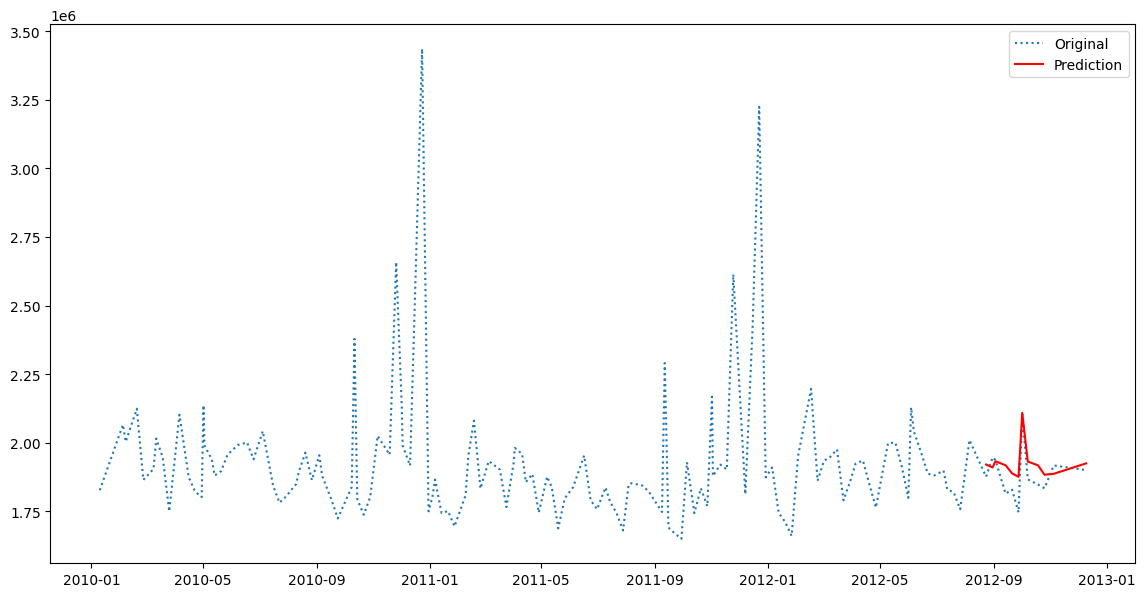

In [660]:
plt.figure(figsize=(14, 7))
plt.plot(Store2.index, Store2['Weekly_Sales'], label='Original', linestyle=':')
plt.plot(prediction_ytrain, linestyle='-', label='Prediction', color = 'red')
plt.legend()

In [661]:
Store2['lag2'] = Store2.Weekly_Sales.shift(2)

In [662]:
X = Store2.head(131)
y = Store2.tail(12)
X.dropna(inplace=True)
y_train = y.drop(columns=['Weekly_Sales','Store'])
X_train = X.drop(columns=['Weekly_Sales','Store'])
X_goal = X['Weekly_Sales']
rfr = RandomForestRegressor()
Model_Store2 = rfr.fit(X_train, X_goal)
prediction_store2 = Model_Store2.predict(y_train)
prediction_ytrain = y_train[['Temperature']]

prediction_ytrain['Predictions'] = prediction_store2
prediction_ytrain.drop(columns='Temperature', inplace=True)

<ipython-input-662-64c625afe86f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-662-64c625afe86f>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-662-64c625afe86f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



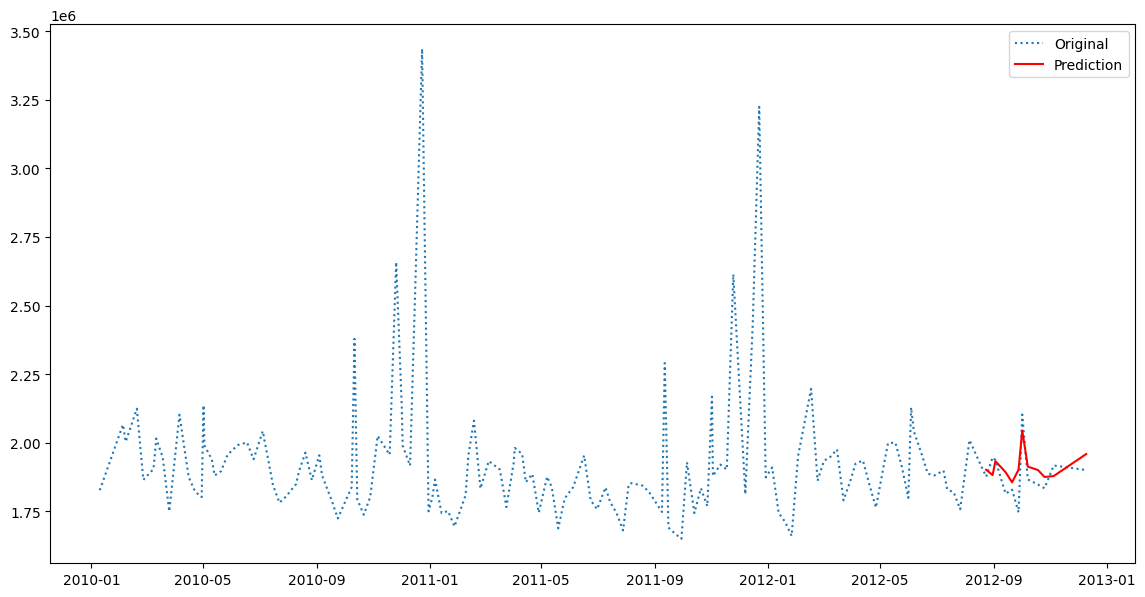

In [663]:
plt.figure(figsize=(14, 7))
plt.plot(Store2.index, Store2['Weekly_Sales'], label='Original', linestyle=':')
plt.plot(prediction_ytrain, linestyle='-', label='Prediction', color = 'red')
plt.legend()

In [664]:
Store2

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-01-10      2    1827440.43             0        69.24       2.603   
2010-02-04      2    2066187.72             0        63.27       2.719   
2010-02-07      2    2003940.64             0        82.74       2.669   
2010-02-19      2    2124451.54             0        39.69       2.514   
2010-02-26      2    1865097.27             0        46.10       2.561   
...           ...           ...           ...          ...         ...   
2012-10-08      2    1866719.96             0        88.55       3.494   
2012-10-19      2    1847990.41             0        68.08       3.594   
2012-10-26      2    1834458.35             0        69.79       3.506   
2012-11-05      2    1917520.99             0        73.87       3.688   
2012-12-10      2    1900745.13             0        60.97       3.601   

                   CPI  Unemployment        lag1        lag2  
Date                                                          
2010-01-10  211.329874         8.163         NaN         NaN  
2010-02-04  210.479887         8.200  1827440.43         NaN  
2010-02-07  210.880373         8.099  2066187.72  1827440.43  
2010-02-19  210.945160         8.324  2003940.64  2066187.72  
2010-02-26  210.975957         8.324  2124451.54  2003940.64  
...                ...           ...         ...         ...  
2012-10-08  221.595414         6.565  2103322.68  1746470.56  
2012-10-19  223.059808         6.170  1866719.96  2103322.68  
2012-10-26  223.078337         6.170  1847990.41  1866719.96  
2012-11-05  221.363221         6.891  1834458.35  1847990.41  
2012-12-10  223.015426         6.170  1917520.99  1834458.35  

[143 rows x 9 columns]

From the above we can see that With lags the model improves.

In [665]:
from prophet import Prophet

In [666]:
Store2= Store2.reset_index()

In [667]:
for_p = Store2[['Date', 'Weekly_Sales']]

In [668]:
for_p

Date  Weekly_Sales
0   2010-01-10    1827440.43
1   2010-02-04    2066187.72
2   2010-02-07    2003940.64
3   2010-02-19    2124451.54
4   2010-02-26    1865097.27
..         ...           ...
138 2012-10-08    1866719.96
139 2012-10-19    1847990.41
140 2012-10-26    1834458.35
141 2012-11-05    1917520.99
142 2012-12-10    1900745.13

[143 rows x 2 columns]

In [669]:
for_p = for_p.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

In [670]:
m = Prophet()

In [671]:
m.fit(for_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/l44mx8nv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/vficlg_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15375', 'data', 'file=/tmp/tmp9n0gyrwk/l44mx8nv.json', 'init=/tmp/tmp9n0gyrwk/vficlg_p.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelj8j0ykxz/prophet_model-20231231053355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [672]:
future = m.make_future_dataframe(periods = 14, freq = 'D')

In [673]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.340239e+06  2.119250e+06  2.560214e+06
143 2012-12-11  2.358604e+06  2.150119e+06  2.571514e+06
144 2012-12-12  2.357044e+06  2.135949e+06  2.585030e+06
145 2012-12-13  2.367139e+06  2.145140e+06  2.586996e+06
146 2012-12-14  2.384973e+06  2.169081e+06  2.618249e+06
147 2012-12-15  2.338141e+06  2.107564e+06  2.581231e+06
148 2012-12-16  2.509556e+06  2.271468e+06  2.735868e+06
149 2012-12-17  2.572013e+06  2.361205e+06  2.785612e+06
150 2012-12-18  2.577477e+06  2.351458e+06  2.804622e+06
151 2012-12-19  2.557447e+06  2.342133e+06  2.788257e+06
152 2012-12-20  2.543707e+06  2.330689e+06  2.760358e+06
153 2012-12-21  2.532677e+06  2.306915e+06  2.748209e+06
154 2012-12-22  2.452412e+06  2.242612e+06  2.666458e+06
155 2012-12-23  2.586403e+06  2.363373e+06  2.795285e+06
156 2012-12-24  2.608120e+06  2.388270e+06  2.840710e+06

The last data was december 10 of 2012, here we made prediction for 2 weeks

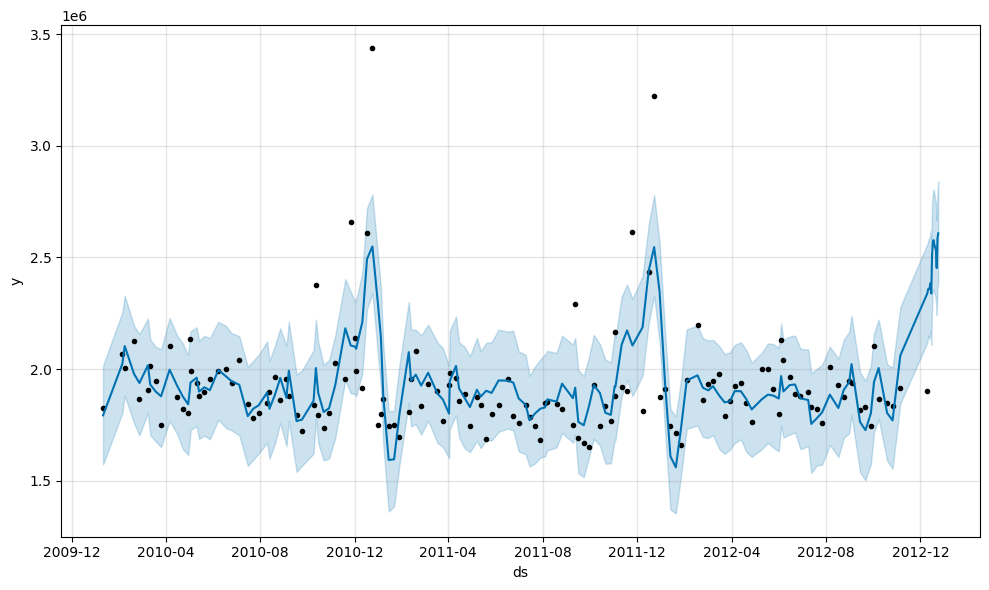

In [674]:
#forcast for  Store 2
fig1 = m.plot(forecast)

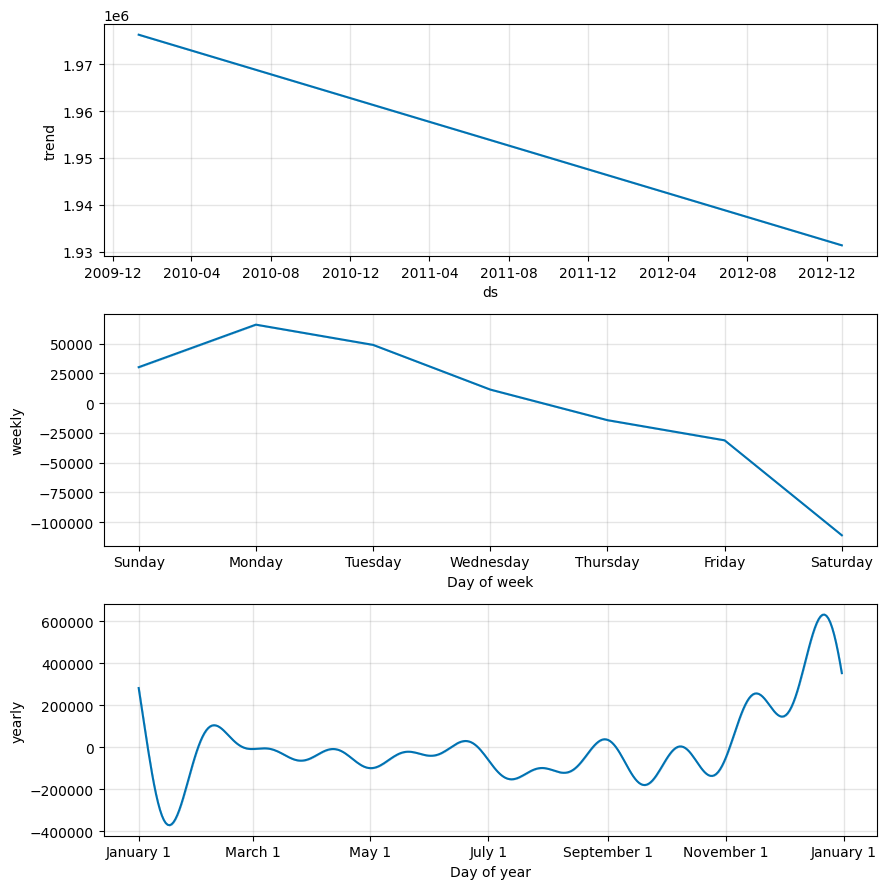

In [675]:
fig2 = m.plot_components(forecast)

In [676]:
dates_after12_weeks = forecast[['ds']]

In [677]:
fig3 = plot_plotly(m, forecast)

In [682]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [678]:
def print_prediction(forecast, m, i):
  print('')
  print(f'FOR STORE {i}')
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15))
  m.plot(forecast)
  plt.title(f'For Store {i}')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7lqqpy83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/3utuul8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12387', 'data', 'file=/tmp/tmp9n0gyrwk/7lqqpy83.json', 'init=/tmp/tmp9n0gyrwk/3utuul8r.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modela9pykns_/prophet_model-20231231054036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 1
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.870195e+06  1.714602e+06  2.014545e+06
143 2012-12-11  1.864921e+06  1.722543e+06  2.005371e+06
144 2012-12-12  1.830491e+06  1.686470e+06  1.962923e+06
145 2012-12-13  1.878870e+06  1.735312e+06  2.019458e+06
146 2012-12-14  1.826972e+06  1.695864e+06  1.977317e+06
147 2012-12-15  1.838404e+06  1.694818e+06  1.983607e+06
148 2012-12-16  1.972666e+06  1.834960e+06  2.113525e+06
149 2012-12-17  2.008963e+06  1.867931e+06  2.164429e+06
150 2012-12-18  2.001502e+06  1.868072e+06  2.151321e+06
151 2012-12-19  1.961539e+06  1.809144e+06  2.088109e+06
152 2012-12-20  2.001026e+06  1.866818e+06  2.141179e+06
153 2012-12-21  1.936944e+06  1.796408e+06  2.079251e+06
154 2012-12-22  1.933048e+06  1.798967e+06  2.076948e+06
155 2012-12-23  2.049063e+06  1.894335e+06  2.201940e+06
156 2012-12-24  2.064492e+06  1.915614e+06  2.209547e+06


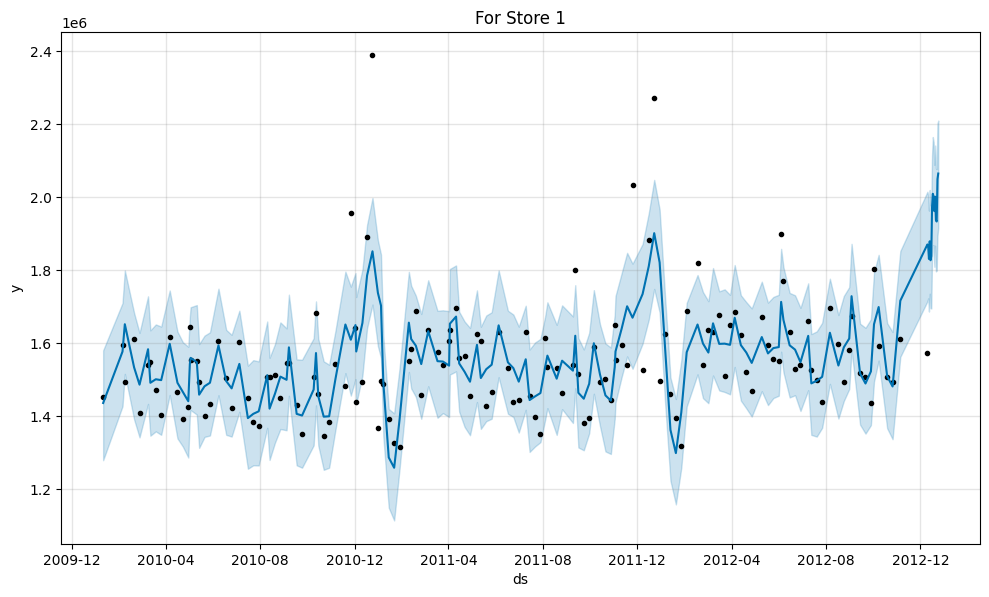

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/dfnicnmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/g2218i6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27393', 'data', 'file=/tmp/tmp9n0gyrwk/dfnicnmc.json', 'init=/tmp/tmp9n0gyrwk/g2218i6c.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modela796xo63/prophet_model-20231231054037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 2
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.340239e+06  2.110642e+06  2.555904e+06
143 2012-12-11  2.358604e+06  2.144669e+06  2.564526e+06
144 2012-12-12  2.357044e+06  2.150731e+06  2.589319e+06
145 2012-12-13  2.367139e+06  2.135525e+06  2.610063e+06
146 2012-12-14  2.384973e+06  2.150463e+06  2.612976e+06
147 2012-12-15  2.338141e+06  2.116912e+06  2.582379e+06
148 2012-12-16  2.509556e+06  2.268027e+06  2.747566e+06
149 2012-12-17  2.572013e+06  2.343798e+06  2.796345e+06
150 2012-12-18  2.577477e+06  2.355610e+06  2.795086e+06
151 2012-12-19  2.557447e+06  2.331689e+06  2.790892e+06
152 2012-12-20  2.543707e+06  2.327118e+06  2.767412e+06
153 2012-12-21  2.532677e+06  2.291539e+06  2.754285e+06
154 2012-12-22  2.452412e+06  2.239879e+06  2.672402e+06
155 2012-12-23  2.586403e+06  2.363014e+06  2.798921e+06
156 2012-12-24  2.608120e+06  2.392278e+06  2.836972e+06


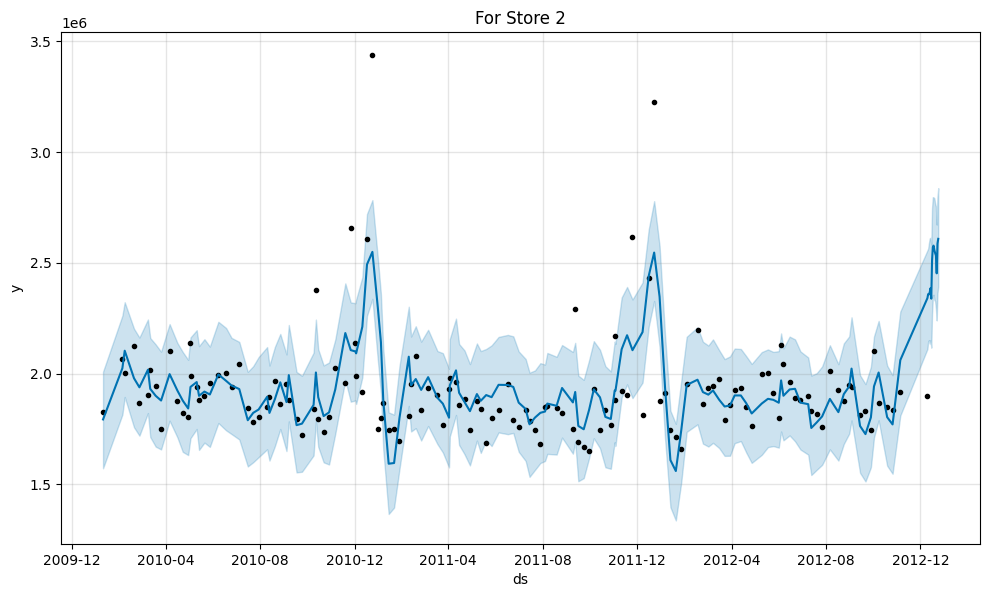

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/g7xeakd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ot5qozc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37397', 'data', 'file=/tmp/tmp9n0gyrwk/g7xeakd2.json', 'init=/tmp/tmp9n0gyrwk/ot5qozc4.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model4gdyudjc/prophet_model-20231231054038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 3
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  505819.020937  463153.591212  551380.056085
143 2012-12-11  504871.895551  463082.337727  546708.466949
144 2012-12-12  474064.461685  433845.211026  515604.703147
145 2012-12-13  489670.266234  449534.838792  532344.272723
146 2012-12-14  490928.451961  444733.749407  532665.794414
147 2012-12-15  495959.256739  452718.574018  540593.296776
148 2012-12-16  521455.843334  478943.010242  564147.997055
149 2012-12-17  532341.304556  487404.010695  577328.221066
150 2012-12-18  531289.527803  485098.341491  574399.178551
151 2012-12-19  499652.340548  449077.519963  544008.865550
152 2012-12-20  513685.165022  469849.388184  556579.694587
153 2012-12-21  512627.413001  467792.932220  555891.058525
154 2012-12-22  514618.285562  471594.747609  561065.166623
155 2012-12-23  536388.435618  497051.964909  580124.689950
156 2012-12-24  542916.339637  497197.660718  586474.323655


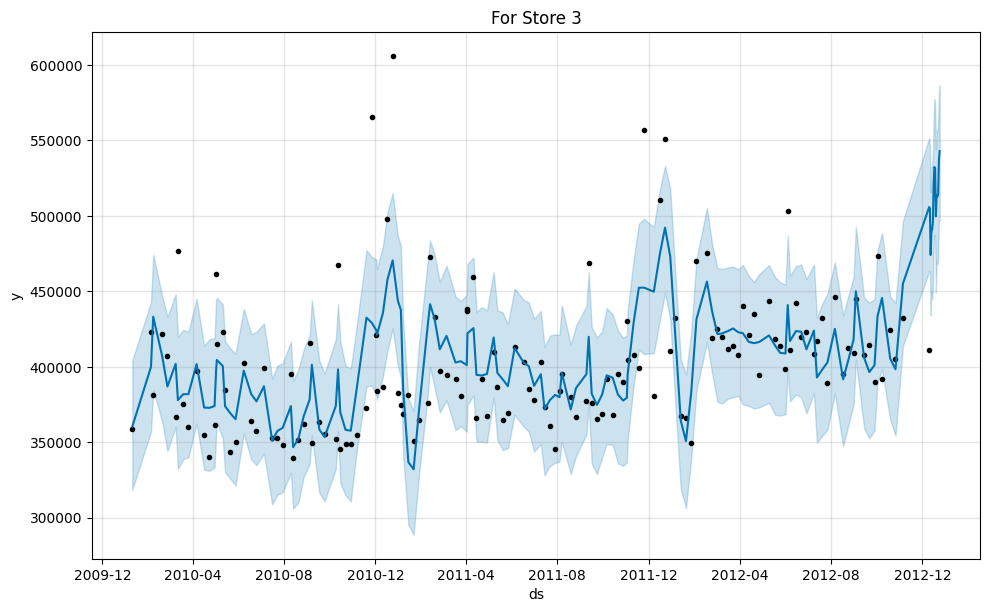

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/up67g6hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/xeawcuyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92129', 'data', 'file=/tmp/tmp9n0gyrwk/up67g6hd.json', 'init=/tmp/tmp9n0gyrwk/xeawcuyl.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelekryfpzh/prophet_model-20231231054038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 4
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.660947e+06  2.402992e+06  2.906279e+06
143 2012-12-11  2.641941e+06  2.385148e+06  2.894316e+06
144 2012-12-12  2.629457e+06  2.383369e+06  2.877404e+06
145 2012-12-13  2.643492e+06  2.419665e+06  2.862667e+06
146 2012-12-14  2.725168e+06  2.482277e+06  2.974566e+06
147 2012-12-15  2.604162e+06  2.363234e+06  2.828244e+06
148 2012-12-16  2.847443e+06  2.604568e+06  3.095156e+06
149 2012-12-17  2.876237e+06  2.632600e+06  3.113043e+06
150 2012-12-18  2.845920e+06  2.612939e+06  3.108618e+06
151 2012-12-19  2.816932e+06  2.553395e+06  3.062823e+06
152 2012-12-20  2.809397e+06  2.574472e+06  3.073059e+06
153 2012-12-21  2.864693e+06  2.608024e+06  3.097682e+06
154 2012-12-22  2.712871e+06  2.477937e+06  2.965446e+06
155 2012-12-23  2.921381e+06  2.669021e+06  3.164138e+06
156 2012-12-24  2.912043e+06  2.662634e+06  3.159607e+06


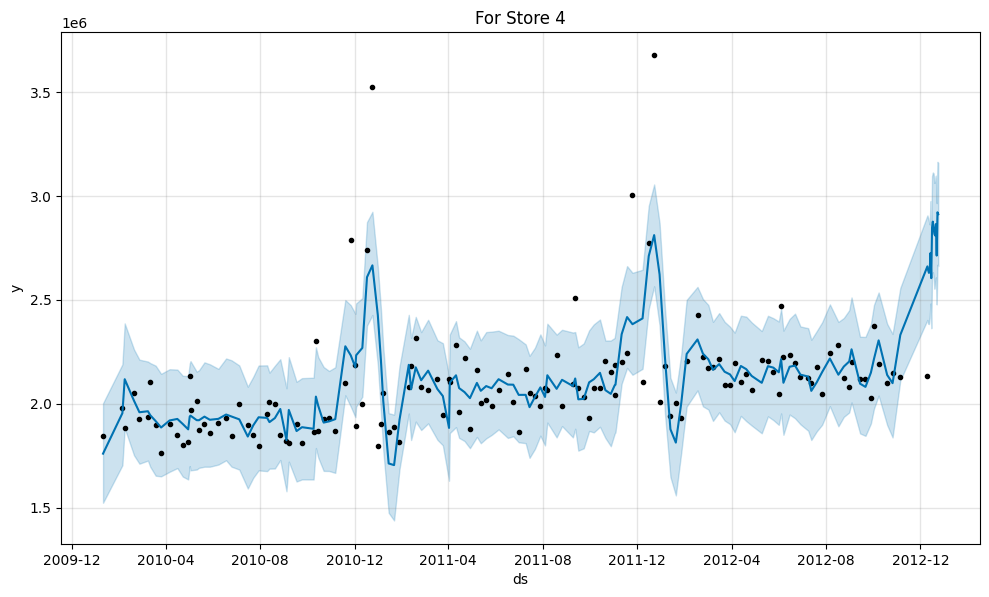

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/bb74_vg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/6uds2r60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92194', 'data', 'file=/tmp/tmp9n0gyrwk/bb74_vg7.json', 'init=/tmp/tmp9n0gyrwk/6uds2r60.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model425p587s/prophet_model-20231231054039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 5
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  382062.005879  344908.708219  417400.472826
143 2012-12-11  382714.661731  343469.524087  417313.931772
144 2012-12-12  363544.482606  329501.167951  394549.186454
145 2012-12-13  368977.138241  334489.954929  404021.994402
146 2012-12-14  373217.581080  339803.931463  410232.118608
147 2012-12-15  386438.318591  351467.912081  423151.361121
148 2012-12-16  392780.655638  360185.173826  430051.330298
149 2012-12-17  406098.963903  372642.888567  441777.687367
150 2012-12-18  409204.826493  374669.070185  444677.504043
151 2012-12-19  391716.612497  356025.823765  425722.981904
152 2012-12-20  397989.637944  362578.849724  432232.625328
153 2012-12-21  402180.456715  369364.340976  435182.348196
154 2012-12-22  414436.599081  377405.477325  446476.124616
155 2012-12-23  418898.664728  383699.849839  454043.021432
156 2012-12-24  429444.802506  397228.092808  463965.261467


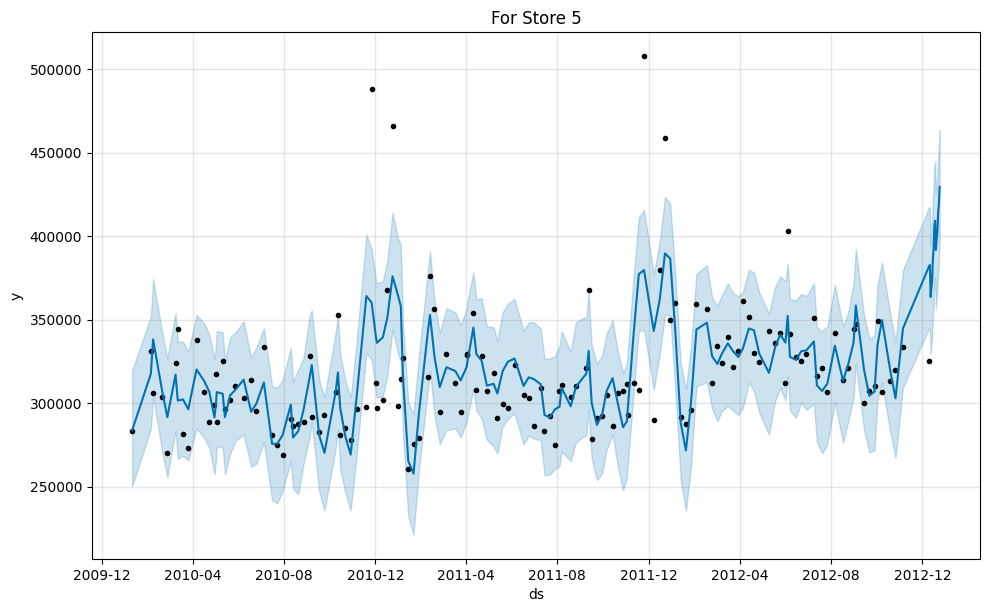

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/rnnflhz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/kzny782j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39091', 'data', 'file=/tmp/tmp9n0gyrwk/rnnflhz9.json', 'init=/tmp/tmp9n0gyrwk/kzny782j.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelrxse28gm/prophet_model-20231231054039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 6
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.839569e+06  1.643996e+06  2.030448e+06
143 2012-12-11  1.847429e+06  1.661711e+06  2.054102e+06
144 2012-12-12  1.772556e+06  1.577699e+06  1.968818e+06
145 2012-12-13  1.900290e+06  1.717173e+06  2.085078e+06
146 2012-12-14  1.896441e+06  1.707440e+06  2.095715e+06
147 2012-12-15  1.912775e+06  1.723376e+06  2.112699e+06
148 2012-12-16  2.039216e+06  1.850925e+06  2.224892e+06
149 2012-12-17  2.089829e+06  1.898204e+06  2.278588e+06
150 2012-12-18  2.096320e+06  1.925552e+06  2.288186e+06
151 2012-12-19  2.013841e+06  1.811203e+06  2.193426e+06
152 2012-12-20  2.127681e+06  1.932832e+06  2.318939e+06
153 2012-12-21  2.103762e+06  1.914568e+06  2.297463e+06
154 2012-12-22  2.094113e+06  1.903224e+06  2.281332e+06
155 2012-12-23  2.189075e+06  2.000382e+06  2.385332e+06
156 2012-12-24  2.203271e+06  2.025563e+06  2.387538e+06


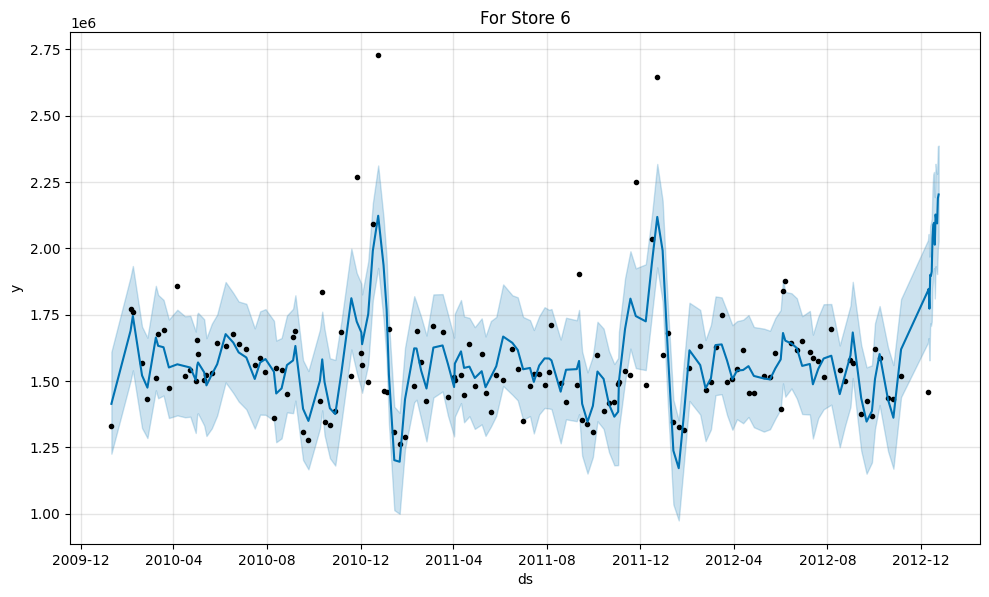

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/rm_h8ms1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ce_9l8_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95207', 'data', 'file=/tmp/tmp9n0gyrwk/rm_h8ms1.json', 'init=/tmp/tmp9n0gyrwk/ce_9l8_1.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelfw3gnm3a/prophet_model-20231231054040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 7
            ds           yhat     yhat_lower    yhat_upper
142 2012-12-10  685012.985635  595217.767002  7.760025e+05
143 2012-12-11  717093.532244  626383.025066  8.163982e+05
144 2012-12-12  763105.067549  668833.065387  8.624280e+05
145 2012-12-13  761091.391704  668437.011950  8.536672e+05
146 2012-12-14  769005.342026  672776.263423  8.643948e+05
147 2012-12-15  749199.773356  657764.601278  8.462981e+05
148 2012-12-16  820284.307638  726944.337834  9.183476e+05
149 2012-12-17  796212.433736  702079.713627  8.937191e+05
150 2012-12-18  830012.705593  742648.590802  9.253126e+05
151 2012-12-19  875425.345081  777652.382664  9.700783e+05
152 2012-12-20  870427.405980  770914.418245  9.681294e+05
153 2012-12-21  872961.352529  787613.072435  9.676593e+05
154 2012-12-22  845426.773241  753371.695450  9.419168e+05
155 2012-12-23  906536.443885  812376.195110  1.001825e+06
156 2012-12-24  870401.336712  779646.291702  9.708354e+05


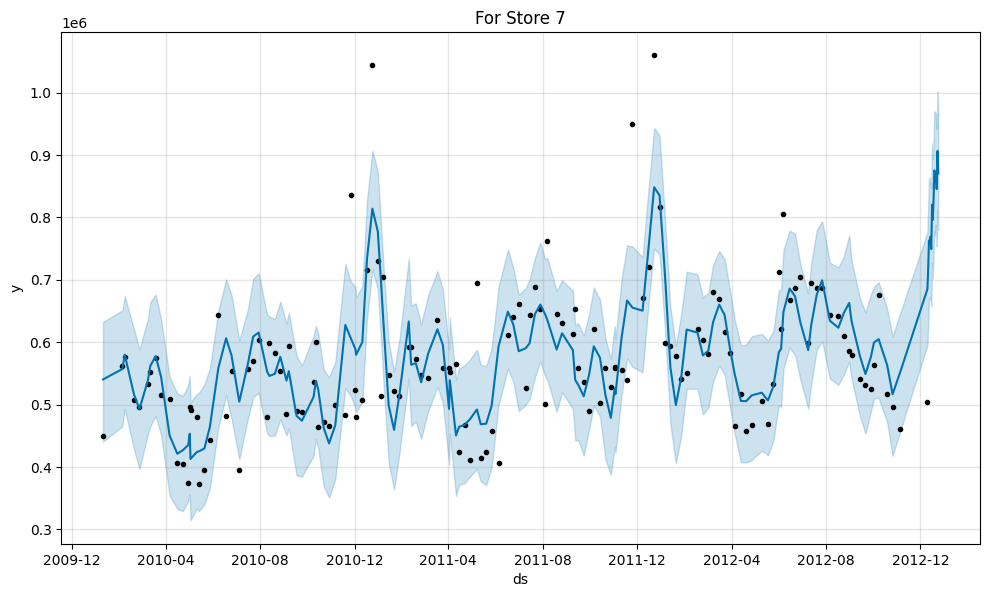

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/vim8si08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/77lg623d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15940', 'data', 'file=/tmp/tmp9n0gyrwk/vim8si08.json', 'init=/tmp/tmp9n0gyrwk/77lg623d.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelmd9yf1bo/prophet_model-20231231054041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 8
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.119749e+06  1.018245e+06  1.224032e+06
143 2012-12-11  1.146779e+06  1.043335e+06  1.251257e+06
144 2012-12-12  1.123292e+06  1.024186e+06  1.234886e+06
145 2012-12-13  1.128967e+06  1.039568e+06  1.234081e+06
146 2012-12-14  1.135354e+06  1.025796e+06  1.239075e+06
147 2012-12-15  1.130358e+06  1.028814e+06  1.233857e+06
148 2012-12-16  1.198505e+06  1.094222e+06  1.296859e+06
149 2012-12-17  1.205586e+06  1.104884e+06  1.302650e+06
150 2012-12-18  1.228168e+06  1.127620e+06  1.331974e+06
151 2012-12-19  1.198114e+06  1.088079e+06  1.305038e+06
152 2012-12-20  1.195156e+06  1.092115e+06  1.295459e+06
153 2012-12-21  1.190943e+06  1.089356e+06  1.286842e+06
154 2012-12-22  1.173528e+06  1.070040e+06  1.282521e+06
155 2012-12-23  1.227633e+06  1.127575e+06  1.325881e+06
156 2012-12-24  1.219285e+06  1.112490e+06  1.324527e+06


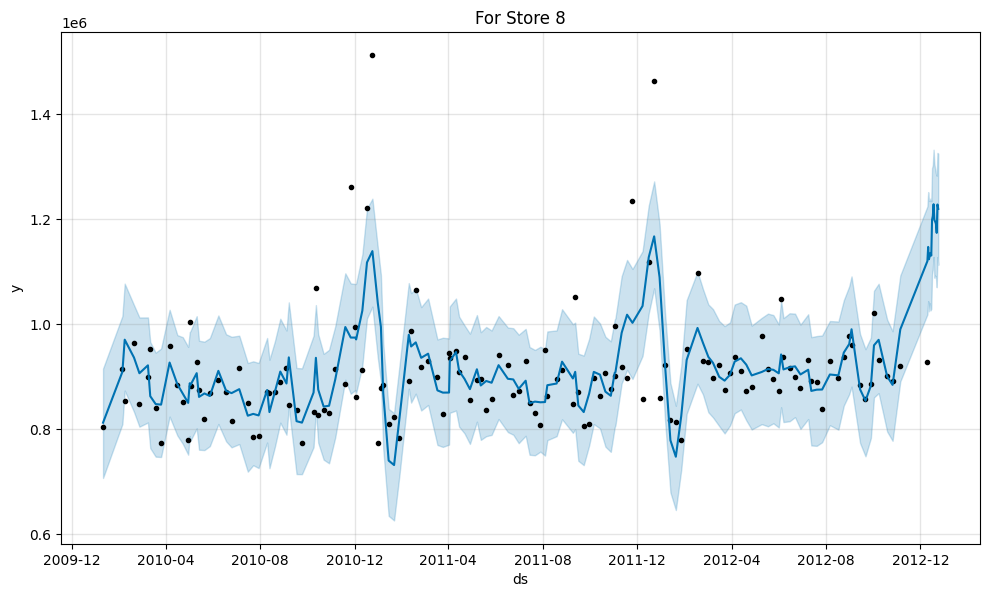

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/nlfq2qvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/3iyjrqkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34978', 'data', 'file=/tmp/tmp9n0gyrwk/nlfq2qvp.json', 'init=/tmp/tmp9n0gyrwk/3iyjrqkv.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modeldleci336/prophet_model-20231231054042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 9
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  677837.170376  612682.773033  739113.005592
143 2012-12-11  685065.292470  624471.838534  745145.631818
144 2012-12-12  652951.633401  592779.984661  716075.545567
145 2012-12-13  678026.896085  618752.943764  743103.644233
146 2012-12-14  687916.691702  629270.413011  754255.834009
147 2012-12-15  681987.248608  620965.833152  743622.649364
148 2012-12-16  735719.138183  675512.071253  795850.553317
149 2012-12-17  740180.788159  677666.967219  801043.241354
150 2012-12-18  746777.209955  686282.804427  809539.417769
151 2012-12-19  712418.726398  656168.432430  774148.175833
152 2012-12-20  733624.472050  673207.288831  796730.087855
153 2012-12-21  738048.480732  683918.183774  801411.429375
154 2012-12-22  725125.248397  663842.215592  788046.905361
155 2012-12-23  770442.305599  707148.477858  826249.569701
156 2012-12-24  765211.594127  704964.722375  829110.480328


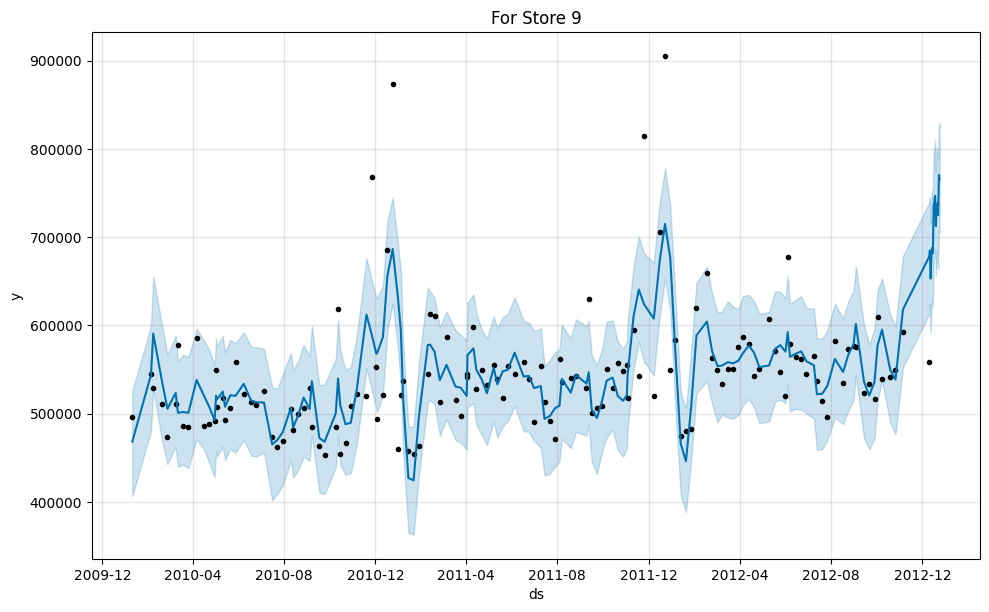

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/jayed75d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ubea91v4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56008', 'data', 'file=/tmp/tmp9n0gyrwk/jayed75d.json', 'init=/tmp/tmp9n0gyrwk/ubea91v4.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelb4bai8nr/prophet_model-20231231054043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 10
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.386354e+06  2.116805e+06  2.677490e+06
143 2012-12-11  2.388827e+06  2.097239e+06  2.672087e+06
144 2012-12-12  2.374962e+06  2.078239e+06  2.649650e+06
145 2012-12-13  2.396169e+06  2.092824e+06  2.677398e+06
146 2012-12-14  2.472731e+06  2.185534e+06  2.747494e+06
147 2012-12-15  2.384421e+06  2.094453e+06  2.679806e+06
148 2012-12-16  2.538587e+06  2.264465e+06  2.836049e+06
149 2012-12-17  2.642354e+06  2.348031e+06  2.925147e+06
150 2012-12-18  2.629947e+06  2.351196e+06  2.900984e+06
151 2012-12-19  2.594678e+06  2.321438e+06  2.904286e+06
152 2012-12-20  2.588172e+06  2.295134e+06  2.880743e+06
153 2012-12-21  2.631083e+06  2.357995e+06  2.894278e+06
154 2012-12-22  2.503705e+06  2.200332e+06  2.797582e+06
155 2012-12-23  2.614043e+06  2.316149e+06  2.902770e+06
156 2012-12-24  2.670005e+06  2.381529e+06  2.953755e+06


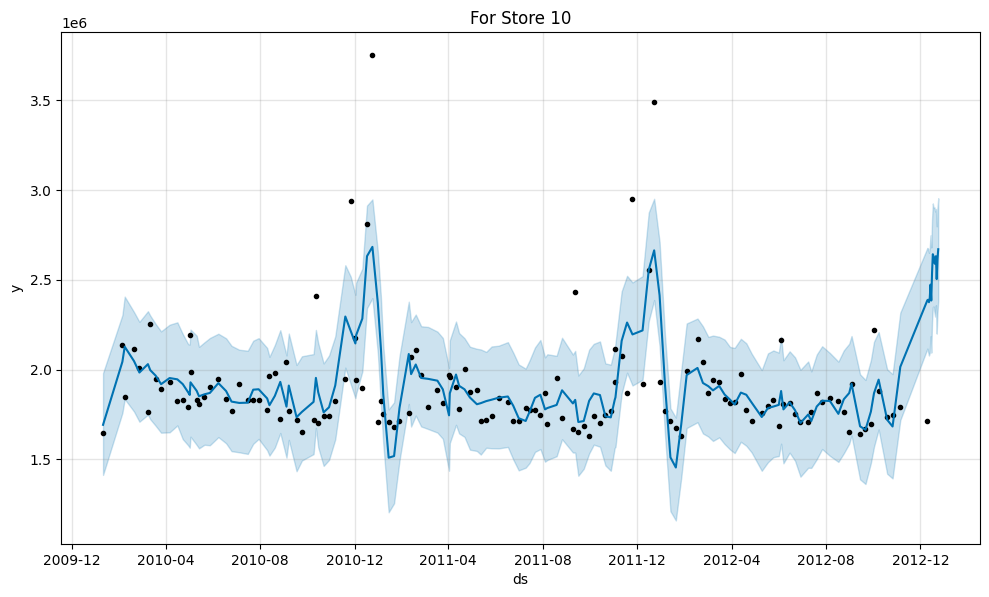

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/5uc1wcl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/efx3sn4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30697', 'data', 'file=/tmp/tmp9n0gyrwk/5uc1wcl_.json', 'init=/tmp/tmp9n0gyrwk/efx3sn4b.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelpqn7f_b3/prophet_model-20231231054044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 11
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.677476e+06  1.521071e+06  1.836790e+06
143 2012-12-11  1.677028e+06  1.520319e+06  1.840445e+06
144 2012-12-12  1.664422e+06  1.504860e+06  1.825652e+06
145 2012-12-13  1.708112e+06  1.554646e+06  1.869861e+06
146 2012-12-14  1.704586e+06  1.554141e+06  1.862291e+06
147 2012-12-15  1.674525e+06  1.516943e+06  1.843347e+06
148 2012-12-16  1.786363e+06  1.637834e+06  1.950864e+06
149 2012-12-17  1.825052e+06  1.665667e+06  1.984809e+06
150 2012-12-18  1.814874e+06  1.673355e+06  1.965299e+06
151 2012-12-19  1.789127e+06  1.633676e+06  1.952388e+06
152 2012-12-20  1.816406e+06  1.654411e+06  1.958430e+06
153 2012-12-21  1.793416e+06  1.643230e+06  1.966247e+06
154 2012-12-22  1.741131e+06  1.575876e+06  1.913425e+06
155 2012-12-23  1.828345e+06  1.666878e+06  1.996688e+06
156 2012-12-24  1.840428e+06  1.669914e+06  2.001786e+06


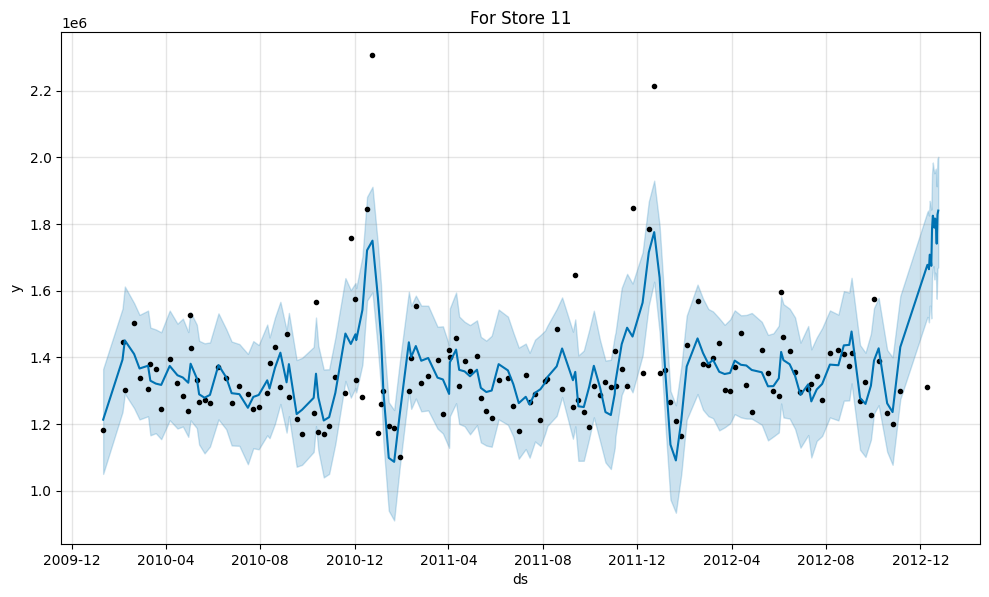

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ea6kl1by.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/uf12rj7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1128', 'data', 'file=/tmp/tmp9n0gyrwk/ea6kl1by.json', 'init=/tmp/tmp9n0gyrwk/uf12rj7c.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelydajiuza/prophet_model-20231231054046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 12
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.240691e+06  1.114560e+06  1.366378e+06
143 2012-12-11  1.249006e+06  1.123512e+06  1.375535e+06
144 2012-12-12  1.249128e+06  1.118967e+06  1.375957e+06
145 2012-12-13  1.220038e+06  1.087229e+06  1.342771e+06
146 2012-12-14  1.257884e+06  1.134074e+06  1.382327e+06
147 2012-12-15  1.223888e+06  1.093630e+06  1.356773e+06
148 2012-12-16  1.302825e+06  1.162983e+06  1.427734e+06
149 2012-12-17  1.352612e+06  1.229539e+06  1.480804e+06
150 2012-12-18  1.360251e+06  1.229327e+06  1.477755e+06
151 2012-12-19  1.356572e+06  1.215510e+06  1.474763e+06
152 2012-12-20  1.320520e+06  1.192267e+06  1.444743e+06
153 2012-12-21  1.348283e+06  1.216098e+06  1.477163e+06
154 2012-12-22  1.301209e+06  1.176890e+06  1.434722e+06
155 2012-12-23  1.364267e+06  1.236027e+06  1.487504e+06
156 2012-12-24  1.395643e+06  1.267203e+06  1.533284e+06


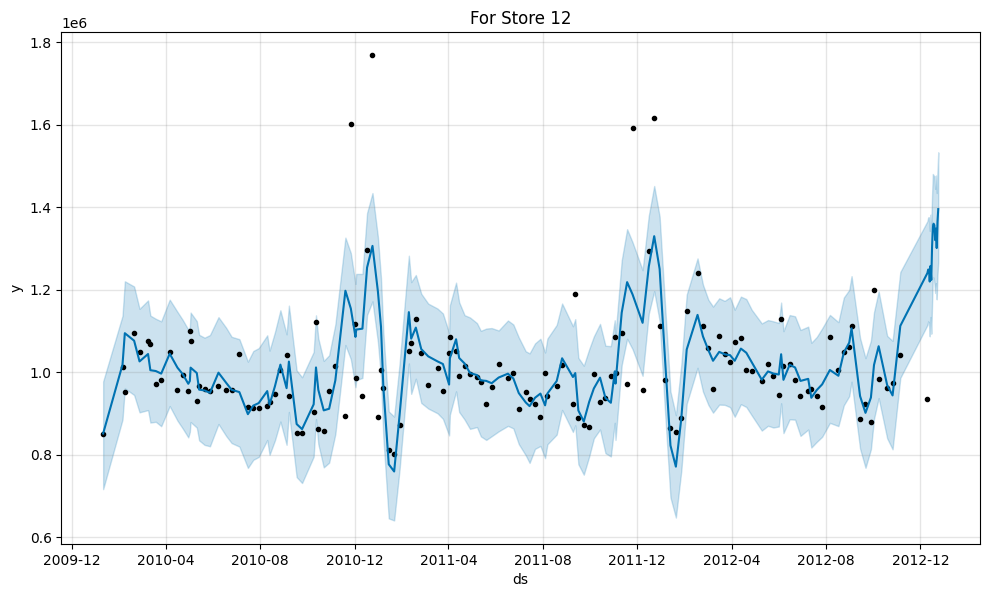

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/i0flu8_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/jvzqmpix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1199', 'data', 'file=/tmp/tmp9n0gyrwk/i0flu8_b.json', 'init=/tmp/tmp9n0gyrwk/jvzqmpix.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelqktyus9k/prophet_model-20231231054047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 13
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.519415e+06  2.275981e+06  2.771033e+06
143 2012-12-11  2.534112e+06  2.296619e+06  2.790974e+06
144 2012-12-12  2.435436e+06  2.187835e+06  2.695925e+06
145 2012-12-13  2.562354e+06  2.306362e+06  2.826603e+06
146 2012-12-14  2.637410e+06  2.396058e+06  2.881690e+06
147 2012-12-15  2.532201e+06  2.281440e+06  2.787224e+06
148 2012-12-16  2.777679e+06  2.524079e+06  3.018083e+06
149 2012-12-17  2.816809e+06  2.553838e+06  3.067087e+06
150 2012-12-18  2.816119e+06  2.554453e+06  3.062081e+06
151 2012-12-19  2.695152e+06  2.434381e+06  2.954221e+06
152 2012-12-20  2.793106e+06  2.541689e+06  3.041732e+06
153 2012-12-21  2.832919e+06  2.588903e+06  3.081399e+06
154 2012-12-22  2.686743e+06  2.427122e+06  2.935970e+06
155 2012-12-23  2.886221e+06  2.630649e+06  3.135759e+06
156 2012-12-24  2.875145e+06  2.616021e+06  3.124893e+06


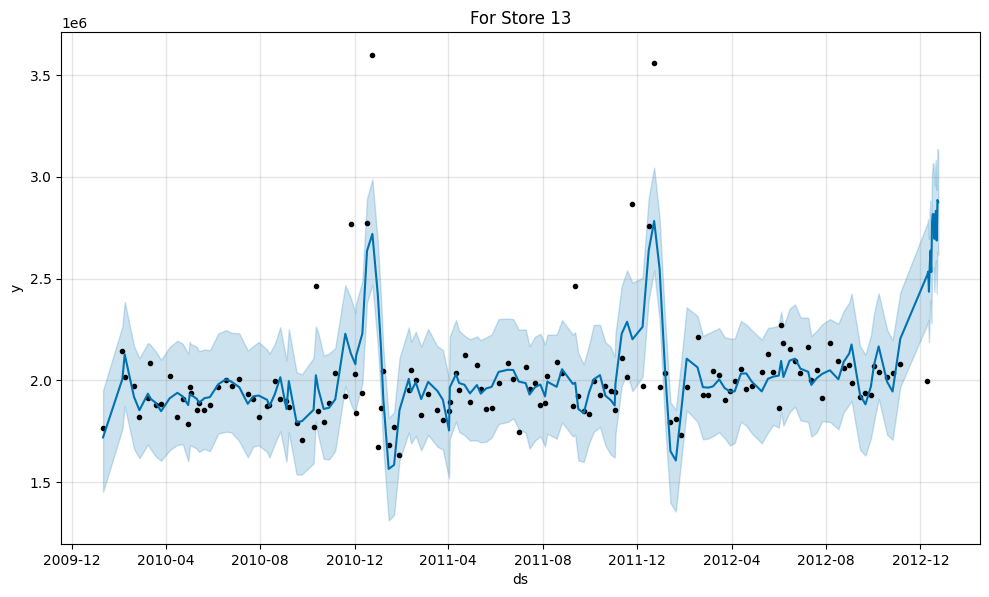

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/b72zk7ap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/3d7l1hd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57118', 'data', 'file=/tmp/tmp9n0gyrwk/b72zk7ap.json', 'init=/tmp/tmp9n0gyrwk/3d7l1hd2.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model9wph1ypj/prophet_model-20231231054048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 14
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.158964e+06  1.865200e+06  2.440759e+06
143 2012-12-11  2.087322e+06  1.818178e+06  2.376537e+06
144 2012-12-12  1.802766e+06  1.531124e+06  2.101955e+06
145 2012-12-13  2.046243e+06  1.780738e+06  2.323966e+06
146 2012-12-14  2.145743e+06  1.870064e+06  2.428436e+06
147 2012-12-15  2.139799e+06  1.848125e+06  2.433631e+06
148 2012-12-16  2.356052e+06  2.065028e+06  2.633895e+06
149 2012-12-17  2.480746e+06  2.197776e+06  2.753765e+06
150 2012-12-18  2.392260e+06  2.123337e+06  2.688685e+06
151 2012-12-19  2.083229e+06  1.811683e+06  2.338975e+06
152 2012-12-20  2.294895e+06  2.015402e+06  2.560883e+06
153 2012-12-21  2.355721e+06  2.075931e+06  2.612536e+06
154 2012-12-22  2.304884e+06  2.032422e+06  2.567523e+06
155 2012-12-23  2.470823e+06  2.203955e+06  2.746979e+06
156 2012-12-24  2.540716e+06  2.285107e+06  2.815992e+06


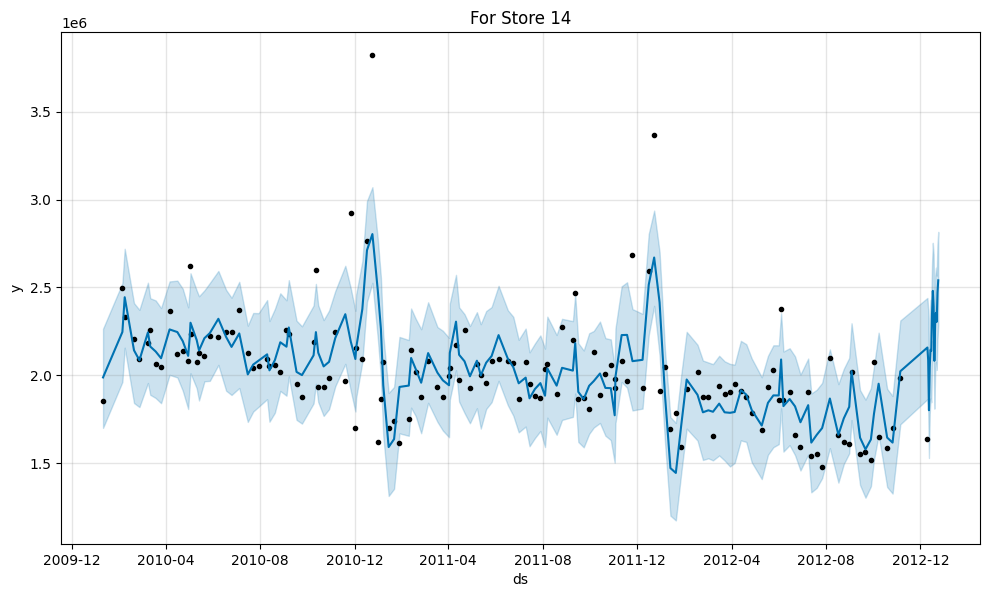

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/i77rlgus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/m0sh43u6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40306', 'data', 'file=/tmp/tmp9n0gyrwk/i77rlgus.json', 'init=/tmp/tmp9n0gyrwk/m0sh43u6.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modeljmsvmir1/prophet_model-20231231054049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 15
            ds           yhat     yhat_lower    yhat_upper
142 2012-12-10  740152.805243  629380.324868  8.456518e+05
143 2012-12-11  765274.549045  653182.644505  8.720511e+05
144 2012-12-12  776058.252869  666056.703888  8.861778e+05
145 2012-12-13  778182.331926  670216.022418  8.893194e+05
146 2012-12-14  807922.424044  695608.059566  9.200889e+05
147 2012-12-15  775503.680550  674354.253631  8.856472e+05
148 2012-12-16  867722.310677  761104.147874  9.774802e+05
149 2012-12-17  855569.944740  752205.097377  9.707735e+05
150 2012-12-18  878095.240767  765334.930409  9.850731e+05
151 2012-12-19  883176.622745  774160.300805  9.861186e+05
152 2012-12-20  876489.628680  766094.786104  9.915259e+05
153 2012-12-21  894386.865114  779550.593180  1.005225e+06
154 2012-12-22  847249.496224  726570.092772  9.559665e+05
155 2012-12-23  922105.905514  811658.021723  1.034716e+06
156 2012-12-24  890251.160283  777352.118565  9.923719e+05


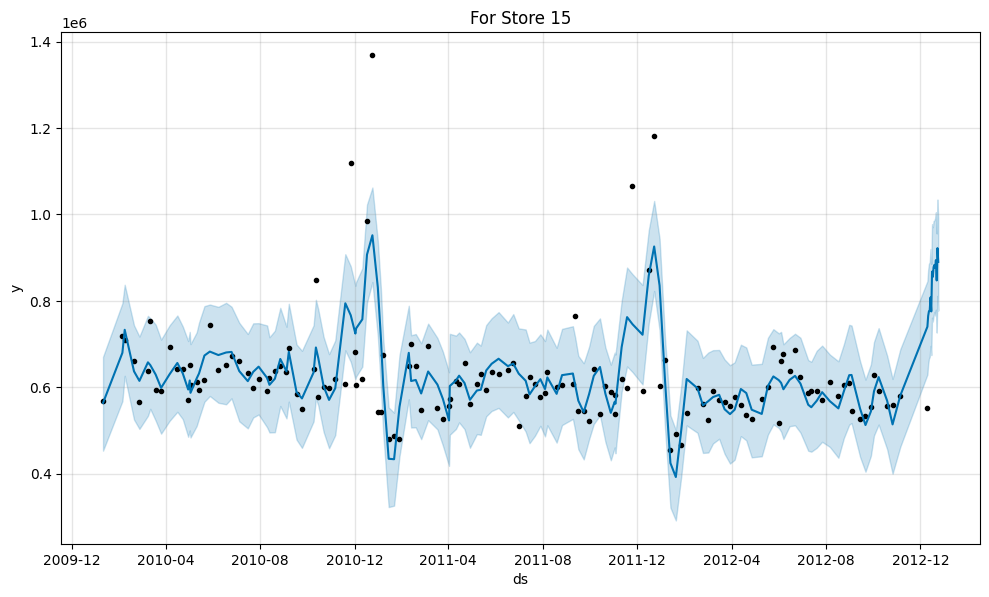

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/22yr1skw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/9w9z0h5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60160', 'data', 'file=/tmp/tmp9n0gyrwk/22yr1skw.json', 'init=/tmp/tmp9n0gyrwk/9w9z0h5j.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model5_815e3h/prophet_model-20231231054050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 16
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  589370.476700  514514.229792  660506.896403
143 2012-12-11  620168.673611  540920.842030  695115.326415
144 2012-12-12  650272.372522  575935.235146  727347.863030
145 2012-12-13  656320.086006  584827.895879  731799.647386
146 2012-12-14  678648.240779  607545.799216  750195.433105
147 2012-12-15  648679.261138  574800.330390  723476.173468
148 2012-12-16  743511.212212  666421.574854  808765.156030
149 2012-12-17  706302.027530  634914.679920  782165.677721
150 2012-12-18  733855.102368  658815.849262  808172.044242
151 2012-12-19  758407.074709  683678.762732  836319.893727
152 2012-12-20  756643.577402  679865.284748  827242.966444
153 2012-12-21  769001.352313  698580.501597  844187.799784
154 2012-12-22  727054.511022  651872.670920  801443.278299
155 2012-12-23  808101.054864  731485.303981  885946.630235
156 2012-12-24  755542.754785  676430.749739  823551.529896


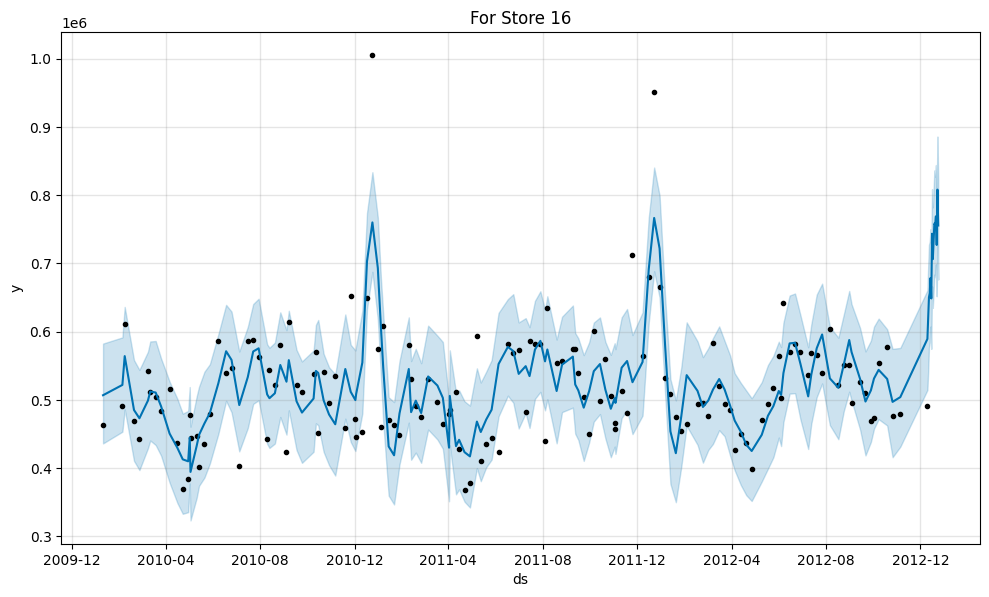

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/bng7q39s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/wbcv_hp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15600', 'data', 'file=/tmp/tmp9n0gyrwk/bng7q39s.json', 'init=/tmp/tmp9n0gyrwk/wbcv_hp2.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelo6vn_25u/prophet_model-20231231054050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 17
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.003061e+06  8.853232e+05  1.110773e+06
143 2012-12-11  1.008123e+06  8.931173e+05  1.119968e+06
144 2012-12-12  9.568922e+05  8.479899e+05  1.069146e+06
145 2012-12-13  1.012210e+06  9.048486e+05  1.125457e+06
146 2012-12-14  1.043583e+06  9.277130e+05  1.157886e+06
147 2012-12-15  1.097520e+06  9.827670e+05  1.211853e+06
148 2012-12-16  1.089139e+06  9.661459e+05  1.197229e+06
149 2012-12-17  1.070021e+06  9.555547e+05  1.174841e+06
150 2012-12-18  1.076728e+06  9.633978e+05  1.189767e+06
151 2012-12-19  1.025448e+06  9.091318e+05  1.138544e+06
152 2012-12-20  1.078917e+06  9.689338e+05  1.190090e+06
153 2012-12-21  1.106583e+06  9.990849e+05  1.226100e+06
154 2012-12-22  1.154946e+06  1.047417e+06  1.269062e+06
155 2012-12-23  1.139160e+06  1.032433e+06  1.248700e+06
156 2012-12-24  1.110902e+06  9.995096e+05  1.235167e+06


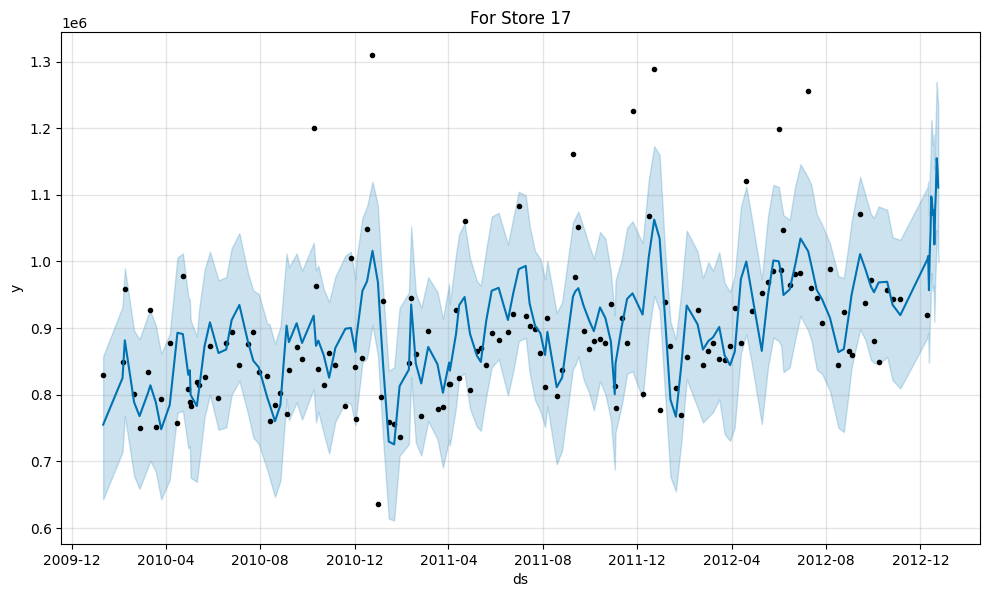

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/9swo586d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/shibvvlz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45857', 'data', 'file=/tmp/tmp9n0gyrwk/9swo586d.json', 'init=/tmp/tmp9n0gyrwk/shibvvlz.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modeluq6y93o9/prophet_model-20231231054052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 18
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.330344e+06  1.160197e+06  1.501617e+06
143 2012-12-11  1.365659e+06  1.199166e+06  1.527891e+06
144 2012-12-12  1.030101e+06  8.651420e+05  1.192736e+06
145 2012-12-13  1.330801e+06  1.160931e+06  1.493187e+06
146 2012-12-14  1.364378e+06  1.196255e+06  1.536785e+06
147 2012-12-15  1.330555e+06  1.162191e+06  1.502201e+06
148 2012-12-16  1.444732e+06  1.271640e+06  1.614150e+06
149 2012-12-17  1.478567e+06  1.319809e+06  1.649505e+06
150 2012-12-18  1.502770e+06  1.340155e+06  1.676586e+06
151 2012-12-19  1.152300e+06  9.779402e+05  1.307516e+06
152 2012-12-20  1.434465e+06  1.271634e+06  1.600559e+06
153 2012-12-21  1.446144e+06  1.287296e+06  1.630636e+06
154 2012-12-22  1.387411e+06  1.232374e+06  1.557165e+06
155 2012-12-23  1.474095e+06  1.316782e+06  1.628699e+06
156 2012-12-24  1.478349e+06  1.298774e+06  1.652614e+06


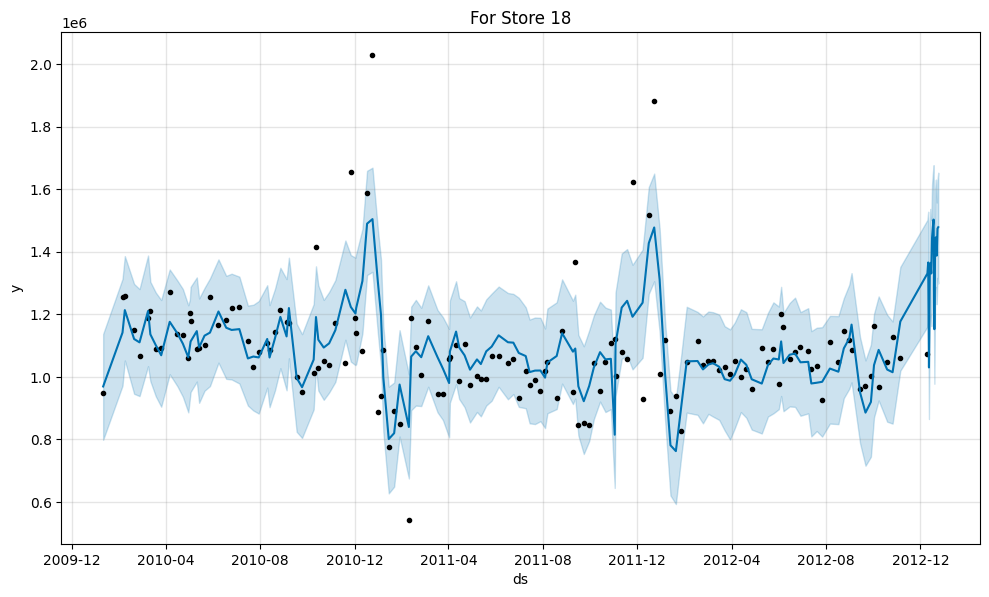

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/1itom3q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/2_p2is2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47629', 'data', 'file=/tmp/tmp9n0gyrwk/1itom3q8.json', 'init=/tmp/tmp9n0gyrwk/2_p2is2x.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelwu0fc4qi/prophet_model-20231231054053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 19
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.682243e+06  1.511250e+06  1.858678e+06
143 2012-12-11  1.706167e+06  1.535133e+06  1.891821e+06
144 2012-12-12  1.781774e+06  1.608295e+06  1.950734e+06
145 2012-12-13  1.739822e+06  1.549719e+06  1.913749e+06
146 2012-12-14  1.756221e+06  1.579536e+06  1.941102e+06
147 2012-12-15  1.722675e+06  1.562928e+06  1.903216e+06
148 2012-12-16  1.885349e+06  1.714064e+06  2.052956e+06
149 2012-12-17  1.902940e+06  1.730483e+06  2.080638e+06
150 2012-12-18  1.915925e+06  1.740543e+06  2.100141e+06
151 2012-12-19  1.975274e+06  1.812778e+06  2.146090e+06
152 2012-12-20  1.911917e+06  1.739958e+06  2.082325e+06
153 2012-12-21  1.902065e+06  1.714102e+06  2.085080e+06
154 2012-12-22  1.837846e+06  1.666750e+06  2.022199e+06
155 2012-12-23  1.965964e+06  1.800207e+06  2.139191e+06
156 2012-12-24  1.945757e+06  1.767548e+06  2.122661e+06


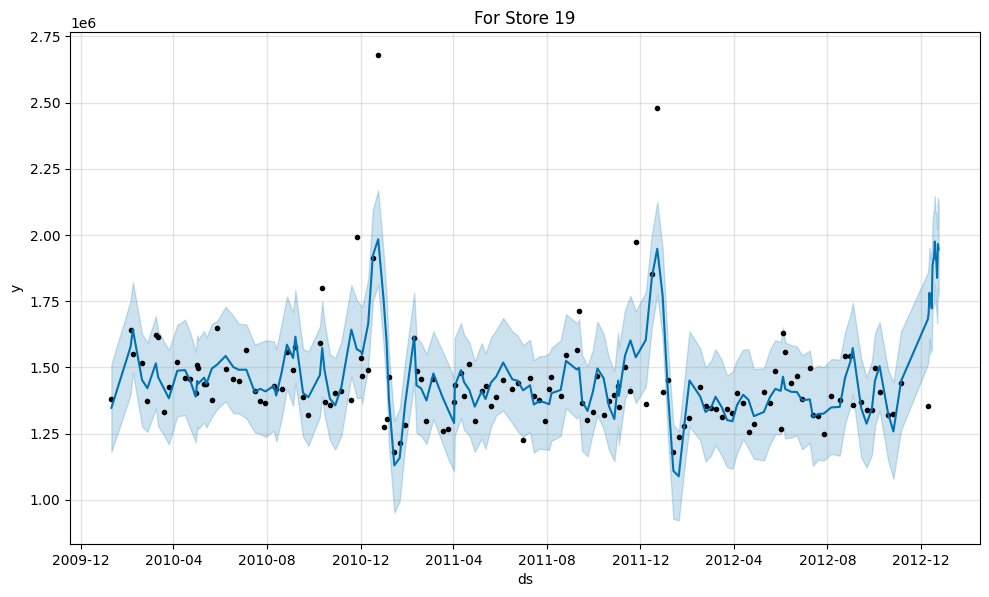

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/wx0b_p1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/bnq3ienq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89827', 'data', 'file=/tmp/tmp9n0gyrwk/wx0b_p1g.json', 'init=/tmp/tmp9n0gyrwk/bnq3ienq.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model615t14om/prophet_model-20231231054054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 20
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  2.633528e+06  2.336723e+06  2.883269e+06
143 2012-12-11  2.664798e+06  2.381844e+06  2.930223e+06
144 2012-12-12  2.614642e+06  2.353978e+06  2.877601e+06
145 2012-12-13  2.655031e+06  2.377030e+06  2.903077e+06
146 2012-12-14  2.660775e+06  2.410146e+06  2.925444e+06
147 2012-12-15  2.689168e+06  2.426374e+06  2.959054e+06
148 2012-12-16  2.897492e+06  2.636997e+06  3.161134e+06
149 2012-12-17  2.926134e+06  2.671083e+06  3.177371e+06
150 2012-12-18  2.943367e+06  2.661635e+06  3.216870e+06
151 2012-12-19  2.872201e+06  2.597692e+06  3.141135e+06
152 2012-12-20  2.884828e+06  2.631170e+06  3.151193e+06
153 2012-12-21  2.856447e+06  2.593244e+06  3.106649e+06
154 2012-12-22  2.844899e+06  2.589703e+06  3.108281e+06
155 2012-12-23  3.008158e+06  2.739822e+06  3.278107e+06
156 2012-12-24  2.987439e+06  2.723009e+06  3.235855e+06


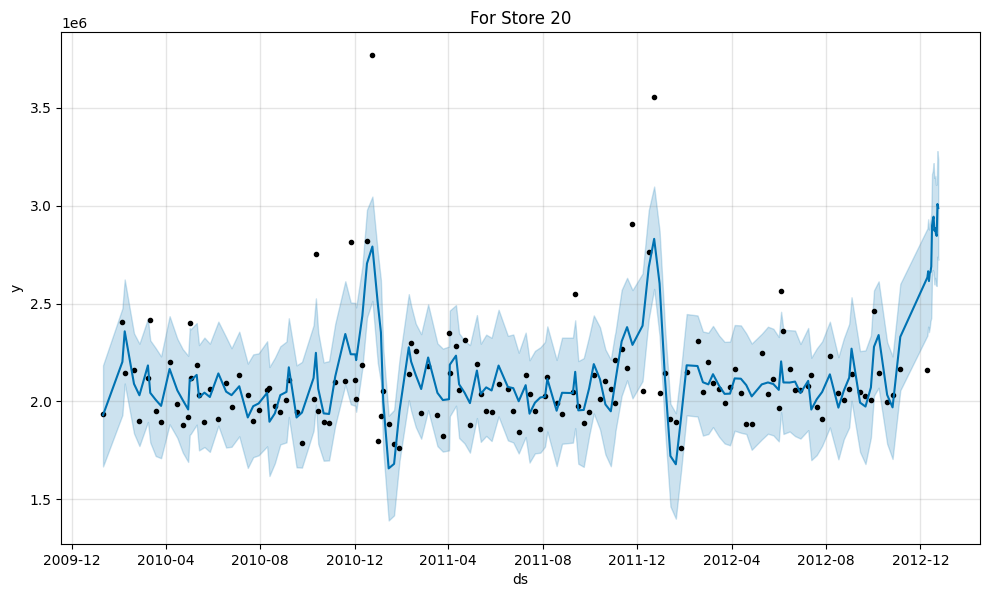

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/z633oxas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/syfz02gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11270', 'data', 'file=/tmp/tmp9n0gyrwk/z633oxas.json', 'init=/tmp/tmp9n0gyrwk/syfz02gv.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model49l11xnw/prophet_model-20231231054055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 21
            ds          yhat     yhat_lower    yhat_upper
142 2012-12-10  8.856343e+05  772495.043241  1.001038e+06
143 2012-12-11  9.012420e+05  793317.687028  1.012783e+06
144 2012-12-12  8.902117e+05  770747.914954  1.000737e+06
145 2012-12-13  9.206195e+05  798603.676422  1.031352e+06
146 2012-12-14  9.807291e+05  866891.025691  1.092261e+06
147 2012-12-15  8.764345e+05  750762.322728  9.854267e+05
148 2012-12-16  1.006818e+06  904812.279242  1.126078e+06
149 2012-12-17  1.011985e+06  900275.352086  1.131716e+06
150 2012-12-18  1.020287e+06  908044.005663  1.135136e+06
151 2012-12-19  9.988630e+05  885371.268255  1.112832e+06
152 2012-12-20  1.015915e+06  898813.339508  1.135676e+06
153 2012-12-21  1.059905e+06  947568.285733  1.176383e+06
154 2012-12-22  9.369914e+05  818468.189434  1.057284e+06
155 2012-12-23  1.046586e+06  925223.501132  1.165097e+06
156 2012-12-24  1.029176e+06  911184.835227  1.138400e+06


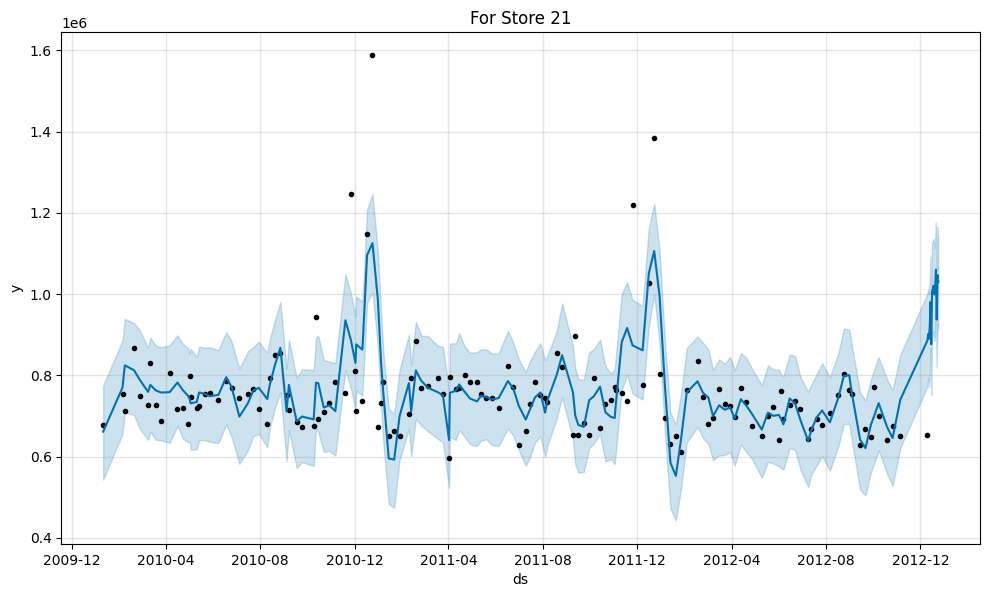

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/chrx970i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/3cesggxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52556', 'data', 'file=/tmp/tmp9n0gyrwk/chrx970i.json', 'init=/tmp/tmp9n0gyrwk/3cesggxz.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelxdh3121f/prophet_model-20231231054056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 22
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.269762e+06  1.123779e+06  1.415470e+06
143 2012-12-11  1.300792e+06  1.155799e+06  1.455804e+06
144 2012-12-12  1.204798e+06  1.043322e+06  1.355979e+06
145 2012-12-13  1.303496e+06  1.143214e+06  1.456420e+06
146 2012-12-14  1.339595e+06  1.183313e+06  1.494216e+06
147 2012-12-15  1.293073e+06  1.137333e+06  1.430123e+06
148 2012-12-16  1.430702e+06  1.277205e+06  1.576497e+06
149 2012-12-17  1.441799e+06  1.291426e+06  1.588892e+06
150 2012-12-18  1.462989e+06  1.317160e+06  1.606998e+06
151 2012-12-19  1.352981e+06  1.199946e+06  1.508718e+06
152 2012-12-20  1.433634e+06  1.284314e+06  1.593751e+06
153 2012-12-21  1.447908e+06  1.293108e+06  1.600740e+06
154 2012-12-22  1.376123e+06  1.227204e+06  1.542564e+06
155 2012-12-23  1.485484e+06  1.333147e+06  1.636103e+06
156 2012-12-24  1.465823e+06  1.327755e+06  1.615214e+06


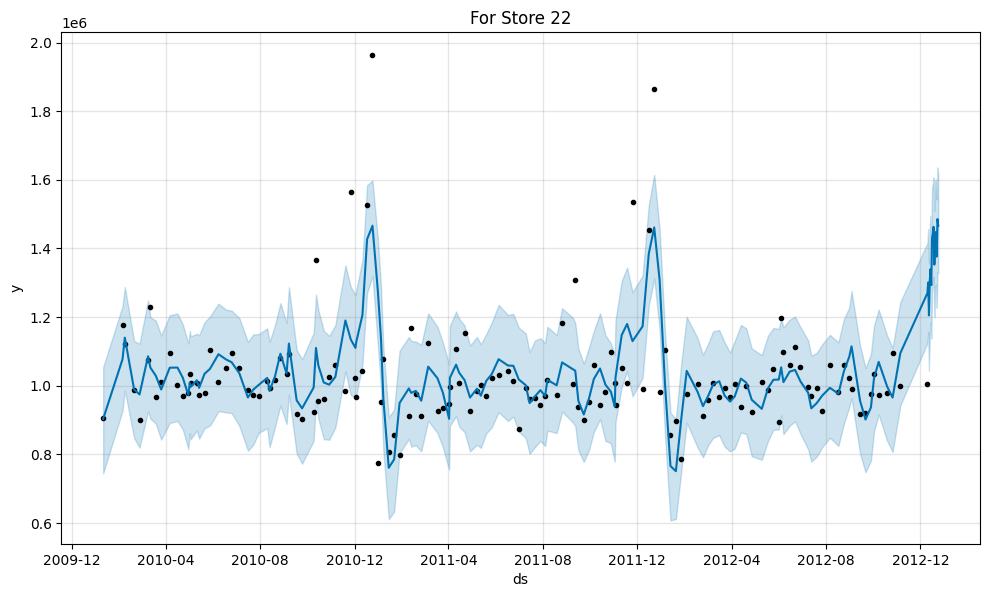

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/xjjbmko4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/xk5kryd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87074', 'data', 'file=/tmp/tmp9n0gyrwk/xjjbmko4.json', 'init=/tmp/tmp9n0gyrwk/xk5kryd3.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelee5mdhen/prophet_model-20231231054057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 23
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.828144e+06  1.582675e+06  2.052801e+06
143 2012-12-11  1.839321e+06  1.611188e+06  2.066787e+06
144 2012-12-12  1.875240e+06  1.636024e+06  2.092758e+06
145 2012-12-13  1.879636e+06  1.655149e+06  2.093815e+06
146 2012-12-14  1.956879e+06  1.744396e+06  2.177697e+06
147 2012-12-15  1.859051e+06  1.638765e+06  2.094556e+06
148 2012-12-16  2.109919e+06  1.901963e+06  2.340664e+06
149 2012-12-17  2.093065e+06  1.884370e+06  2.324140e+06
150 2012-12-18  2.084824e+06  1.872770e+06  2.305966e+06
151 2012-12-19  2.094851e+06  1.860276e+06  2.330477e+06
152 2012-12-20  2.067191e+06  1.839120e+06  2.283269e+06
153 2012-12-21  2.106684e+06  1.889169e+06  2.336611e+06
154 2012-12-22  1.966029e+06  1.749396e+06  2.189607e+06
155 2012-12-23  2.169746e+06  1.934236e+06  2.407779e+06
156 2012-12-24  2.102289e+06  1.874706e+06  2.322240e+06


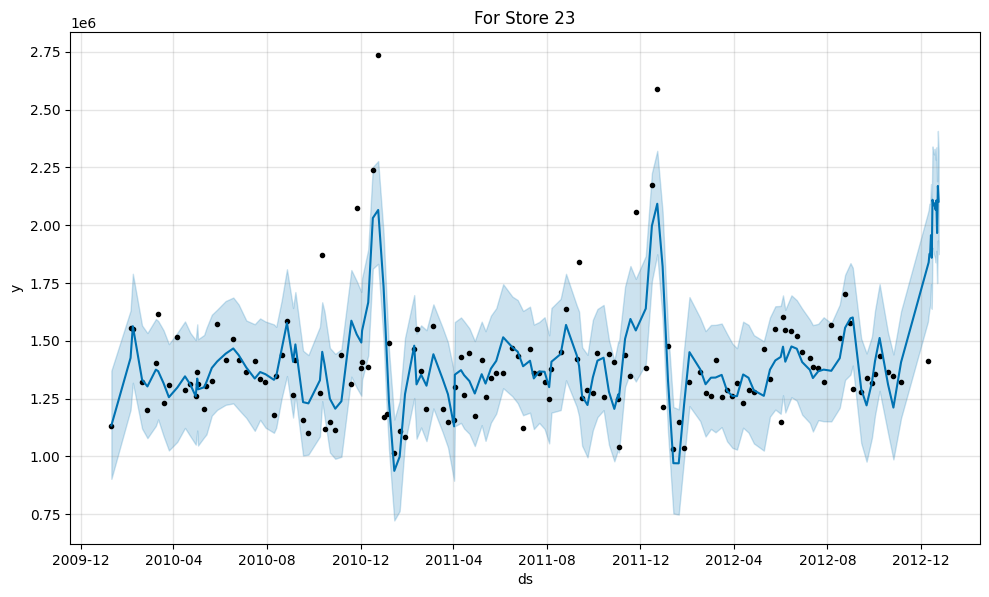

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/yfe3_v1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/pyr7o7x4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18508', 'data', 'file=/tmp/tmp9n0gyrwk/yfe3_v1l.json', 'init=/tmp/tmp9n0gyrwk/pyr7o7x4.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelrrnskx3h/prophet_model-20231231054057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 24
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.588247e+06  1.425076e+06  1.745167e+06
143 2012-12-11  1.613297e+06  1.458885e+06  1.767691e+06
144 2012-12-12  1.515293e+06  1.353314e+06  1.666234e+06
145 2012-12-13  1.654983e+06  1.504309e+06  1.807002e+06
146 2012-12-14  1.619399e+06  1.465022e+06  1.769055e+06
147 2012-12-15  1.607896e+06  1.463384e+06  1.758070e+06
148 2012-12-16  1.807839e+06  1.669591e+06  1.975766e+06
149 2012-12-17  1.777829e+06  1.623378e+06  1.921064e+06
150 2012-12-18  1.796187e+06  1.645629e+06  1.963340e+06
151 2012-12-19  1.687011e+06  1.525216e+06  1.823395e+06
152 2012-12-20  1.811141e+06  1.650964e+06  1.955955e+06
153 2012-12-21  1.755807e+06  1.611916e+06  1.910289e+06
154 2012-12-22  1.720665e+06  1.572894e+06  1.876967e+06
155 2012-12-23  1.893485e+06  1.739043e+06  2.053731e+06
156 2012-12-24  1.833355e+06  1.674977e+06  1.982995e+06


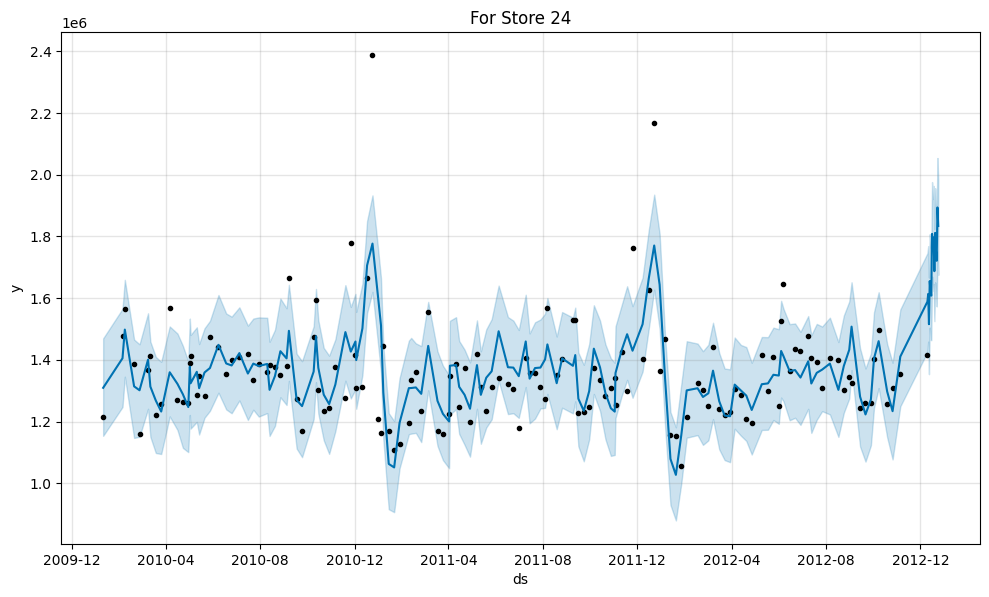

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/4efkgxuh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/envvugns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21423', 'data', 'file=/tmp/tmp9n0gyrwk/4efkgxuh.json', 'init=/tmp/tmp9n0gyrwk/envvugns.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model7bs51ec0/prophet_model-20231231054058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 25
            ds          yhat     yhat_lower    yhat_upper
142 2012-12-10  8.493111e+05  741054.833069  9.597632e+05
143 2012-12-11  8.573844e+05  750225.750378  9.637823e+05
144 2012-12-12  8.008415e+05  690350.335497  9.135651e+05
145 2012-12-13  8.600653e+05  743108.726289  9.624773e+05
146 2012-12-14  9.068553e+05  801074.166090  1.015762e+06
147 2012-12-15  9.003349e+05  795699.831063  1.005592e+06
148 2012-12-16  9.493124e+05  837401.031090  1.049526e+06
149 2012-12-17  9.751359e+05  869543.328454  1.078273e+06
150 2012-12-18  9.787319e+05  870496.757928  1.088231e+06
151 2012-12-19  9.144885e+05  800514.184952  1.019942e+06
152 2012-12-20  9.628523e+05  850952.094157  1.063061e+06
153 2012-12-21  9.957670e+05  890980.510881  1.102212e+06
154 2012-12-22  9.725786e+05  871156.042155  1.085278e+06
155 2012-12-23  1.002391e+06  897500.656002  1.106894e+06
156 2012-12-24  1.006916e+06  902628.802988  1.115562e+06


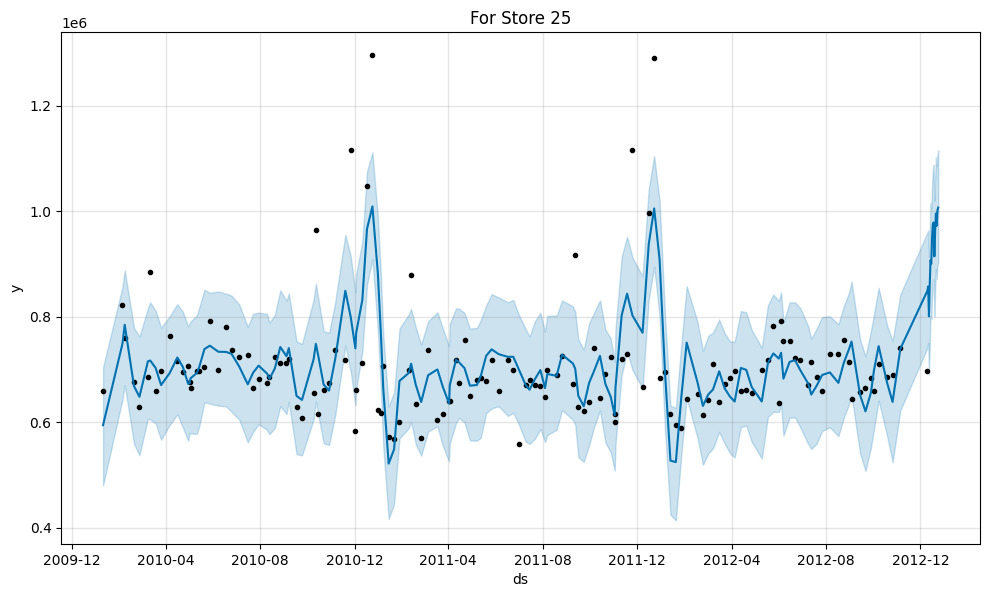

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/w66boo48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/owi7pkqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25006', 'data', 'file=/tmp/tmp9n0gyrwk/w66boo48.json', 'init=/tmp/tmp9n0gyrwk/owi7pkqb.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelo359c4t_/prophet_model-20231231054059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 26
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.183149e+06  1.093595e+06  1.279760e+06
143 2012-12-11  1.193828e+06  1.099574e+06  1.283920e+06
144 2012-12-12  1.206586e+06  1.106954e+06  1.293024e+06
145 2012-12-13  1.227164e+06  1.136077e+06  1.320668e+06
146 2012-12-14  1.185047e+06  1.091339e+06  1.274511e+06
147 2012-12-15  1.205744e+06  1.116429e+06  1.300246e+06
148 2012-12-16  1.321666e+06  1.233732e+06  1.416235e+06
149 2012-12-17  1.296796e+06  1.203431e+06  1.391811e+06
150 2012-12-18  1.303009e+06  1.208656e+06  1.394838e+06
151 2012-12-19  1.308487e+06  1.219161e+06  1.403125e+06
152 2012-12-20  1.319028e+06  1.222621e+06  1.416298e+06
153 2012-12-21  1.264242e+06  1.170771e+06  1.354973e+06
154 2012-12-22  1.269828e+06  1.181981e+06  1.364303e+06
155 2012-12-23  1.368453e+06  1.274441e+06  1.465245e+06
156 2012-12-24  1.324409e+06  1.230875e+06  1.413027e+06


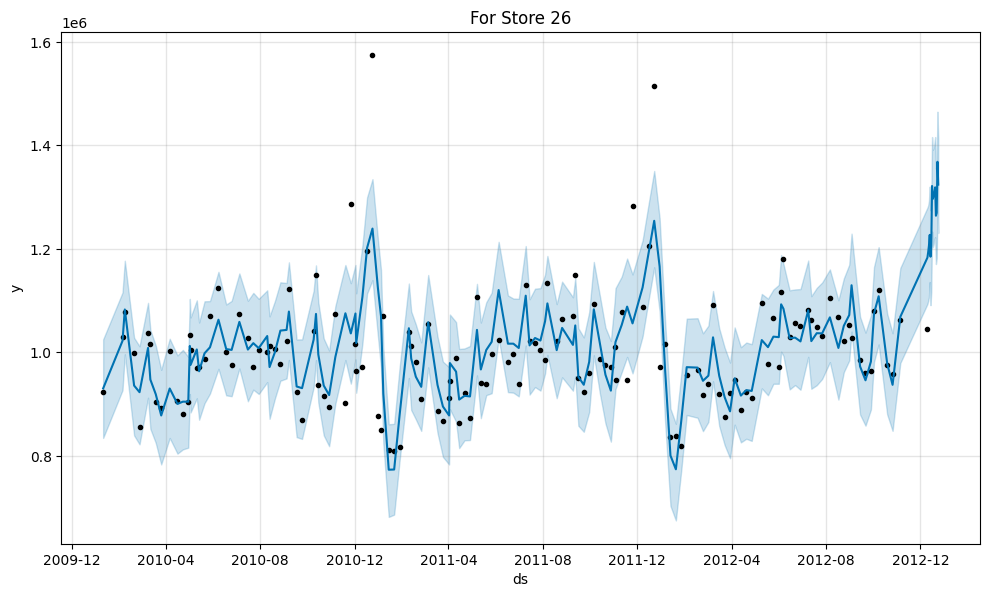

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/x1l7h4yg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/qyzft9wx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54075', 'data', 'file=/tmp/tmp9n0gyrwk/x1l7h4yg.json', 'init=/tmp/tmp9n0gyrwk/qyzft9wx.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelqhq8egym/prophet_model-20231231054100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 27
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.918272e+06  1.680294e+06  2.125041e+06
143 2012-12-11  2.026927e+06  1.801615e+06  2.241260e+06
144 2012-12-12  1.857661e+06  1.636899e+06  2.084069e+06
145 2012-12-13  2.041646e+06  1.822956e+06  2.258761e+06
146 2012-12-14  2.064380e+06  1.847898e+06  2.296035e+06
147 2012-12-15  2.055011e+06  1.825534e+06  2.302524e+06
148 2012-12-16  2.206217e+06  1.998750e+06  2.432878e+06
149 2012-12-17  2.107507e+06  1.861465e+06  2.332497e+06
150 2012-12-18  2.210173e+06  1.981949e+06  2.433354e+06
151 2012-12-19  2.029633e+06  1.797449e+06  2.254679e+06
152 2012-12-20  2.197083e+06  1.976552e+06  2.433049e+06
153 2012-12-21  2.198184e+06  1.981906e+06  2.414813e+06
154 2012-12-22  2.162376e+06  1.931321e+06  2.394938e+06
155 2012-12-23  2.282763e+06  2.061628e+06  2.508545e+06
156 2012-12-24  2.149396e+06  1.915521e+06  2.377705e+06


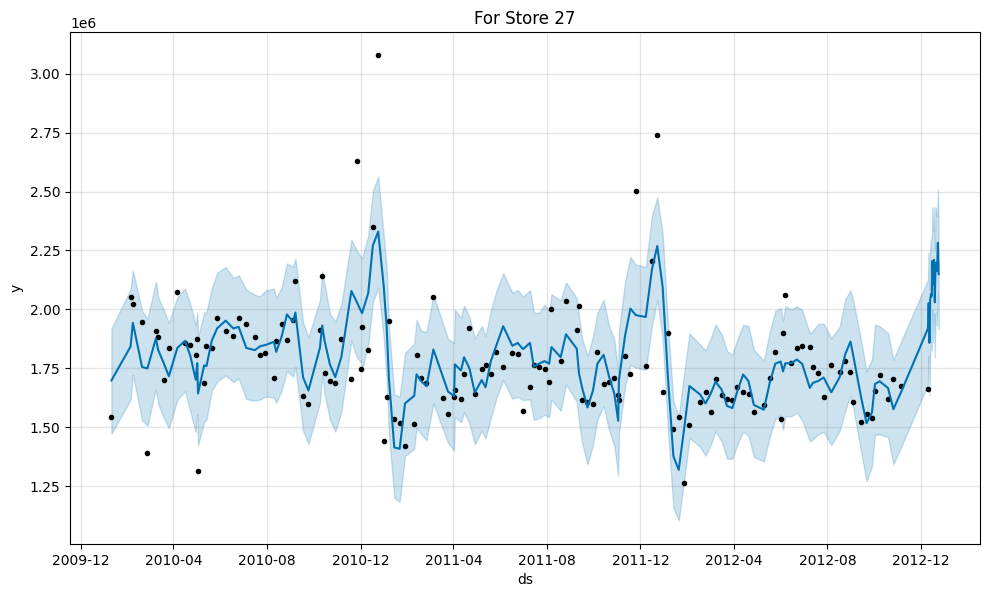

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/zsdpcl5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/pwg2bkcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81151', 'data', 'file=/tmp/tmp9n0gyrwk/zsdpcl5u.json', 'init=/tmp/tmp9n0gyrwk/pwg2bkcy.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modell0rb67nm/prophet_model-20231231054101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 28
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.574066e+06  1.413965e+06  1.740025e+06
143 2012-12-11  1.567608e+06  1.409648e+06  1.718685e+06
144 2012-12-12  1.507934e+06  1.348716e+06  1.672508e+06
145 2012-12-13  1.513896e+06  1.336088e+06  1.686929e+06
146 2012-12-14  1.390796e+06  1.232386e+06  1.564832e+06
147 2012-12-15  1.442545e+06  1.280564e+06  1.612281e+06
148 2012-12-16  1.646790e+06  1.492986e+06  1.791897e+06
149 2012-12-17  1.633679e+06  1.472631e+06  1.814066e+06
150 2012-12-18  1.631286e+06  1.464541e+06  1.786630e+06
151 2012-12-19  1.573362e+06  1.412209e+06  1.750431e+06
152 2012-12-20  1.578629e+06  1.416709e+06  1.745593e+06
153 2012-12-21  1.452323e+06  1.293573e+06  1.612199e+06
154 2012-12-22  1.498352e+06  1.332111e+06  1.657135e+06
155 2012-12-23  1.694427e+06  1.526205e+06  1.865154e+06
156 2012-12-24  1.670819e+06  1.506460e+06  1.840658e+06


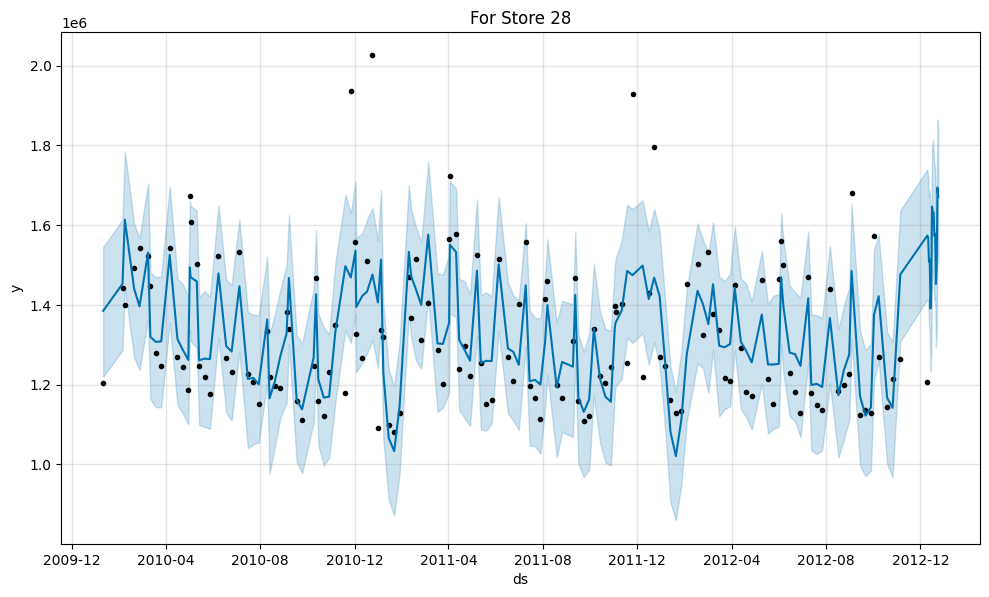

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/91etxczj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ibeuyzi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40872', 'data', 'file=/tmp/tmp9n0gyrwk/91etxczj.json', 'init=/tmp/tmp9n0gyrwk/ibeuyzi1.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model0ath6npl/prophet_model-20231231054102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 29
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  673619.947118  571832.409874  761056.373429
143 2012-12-11  678967.070770  582578.714754  776734.784046
144 2012-12-12  668823.336418  572164.612520  769546.219730
145 2012-12-13  675408.446840  577092.489110  770998.046985
146 2012-12-14  709371.378484  616137.318400  803388.068876
147 2012-12-15  682123.150090  583394.630842  772366.119097
148 2012-12-16  759527.792457  671645.601146  847545.737122
149 2012-12-17  772365.098911  676981.699707  859429.330685
150 2012-12-18  774967.652699  675318.708810  861204.176177
151 2012-12-19  759548.408775  667988.452932  857988.297080
152 2012-12-20  758349.774119  664459.433429  855012.805384
153 2012-12-21  782106.725812  691900.853575  885146.069010
154 2012-12-22  742378.211068  647491.095391  835673.554501
155 2012-12-23  805235.134350  716148.846304  904086.689189
156 2012-12-24  801718.582611  703111.286334  893573.300634


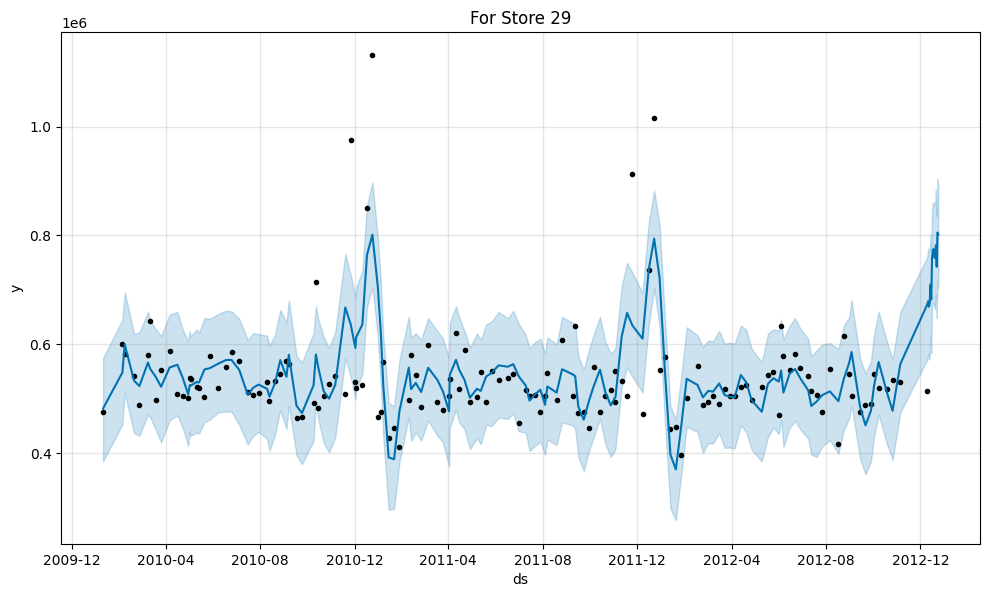

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/io4eeuv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/_2mxajan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3961', 'data', 'file=/tmp/tmp9n0gyrwk/io4eeuv8.json', 'init=/tmp/tmp9n0gyrwk/_2mxajan.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model6bia1sf3/prophet_model-20231231054103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 30
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  463282.394252  440940.463123  486364.100981
143 2012-12-11  462875.968600  438944.571903  485791.077895
144 2012-12-12  451030.639612  427756.386708  473448.415191
145 2012-12-13  463399.620332  441796.318164  485559.478298
146 2012-12-14  455233.294516  432956.143187  478158.513771
147 2012-12-15  463119.652523  440594.027881  487979.159667
148 2012-12-16  452438.396537  430675.282720  473156.773282
149 2012-12-17  456950.285861  434789.003753  477123.094913
150 2012-12-18  455612.081498  433295.627712  476133.593649
151 2012-12-19  442974.107431  419215.386332  464889.362324
152 2012-12-20  454707.018866  433084.621204  476300.802198
153 2012-12-21  446075.178272  424403.657336  467583.269430
154 2012-12-22  453676.712019  431228.376053  475906.888514
155 2012-12-23  442897.325644  421367.973697  465003.949242
156 2012-12-24  447499.457094  425642.602350  469648.659368


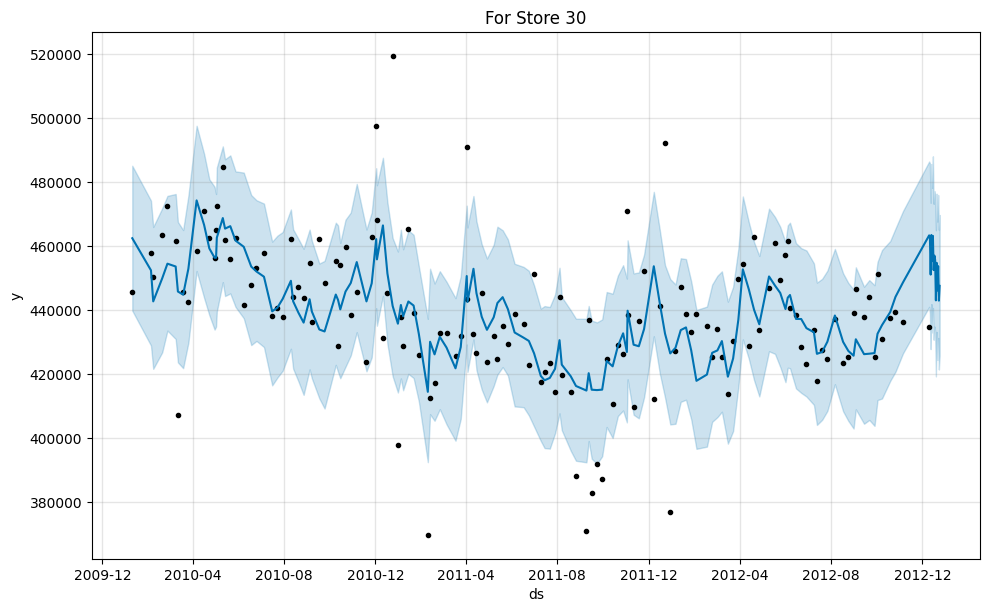

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/_pix8_4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7v7srtgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=455', 'data', 'file=/tmp/tmp9n0gyrwk/_pix8_4m.json', 'init=/tmp/tmp9n0gyrwk/7v7srtgz.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model5ddkca2o/prophet_model-20231231054104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 31
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.613761e+06  1.492897e+06  1.736686e+06
143 2012-12-11  1.613222e+06  1.497389e+06  1.738665e+06
144 2012-12-12  1.650411e+06  1.527828e+06  1.778085e+06
145 2012-12-13  1.602157e+06  1.485225e+06  1.722986e+06
146 2012-12-14  1.617954e+06  1.503057e+06  1.737369e+06
147 2012-12-15  1.579256e+06  1.456972e+06  1.697282e+06
148 2012-12-16  1.665988e+06  1.553027e+06  1.790462e+06
149 2012-12-17  1.669293e+06  1.543263e+06  1.789931e+06
150 2012-12-18  1.665689e+06  1.549015e+06  1.784269e+06
151 2012-12-19  1.697969e+06  1.571626e+06  1.819345e+06
152 2012-12-20  1.642984e+06  1.517858e+06  1.764933e+06
153 2012-12-21  1.650297e+06  1.524821e+06  1.764125e+06
154 2012-12-22  1.601480e+06  1.488389e+06  1.725576e+06
155 2012-12-23  1.676615e+06  1.550349e+06  1.802977e+06
156 2012-12-24  1.667048e+06  1.552266e+06  1.779041e+06


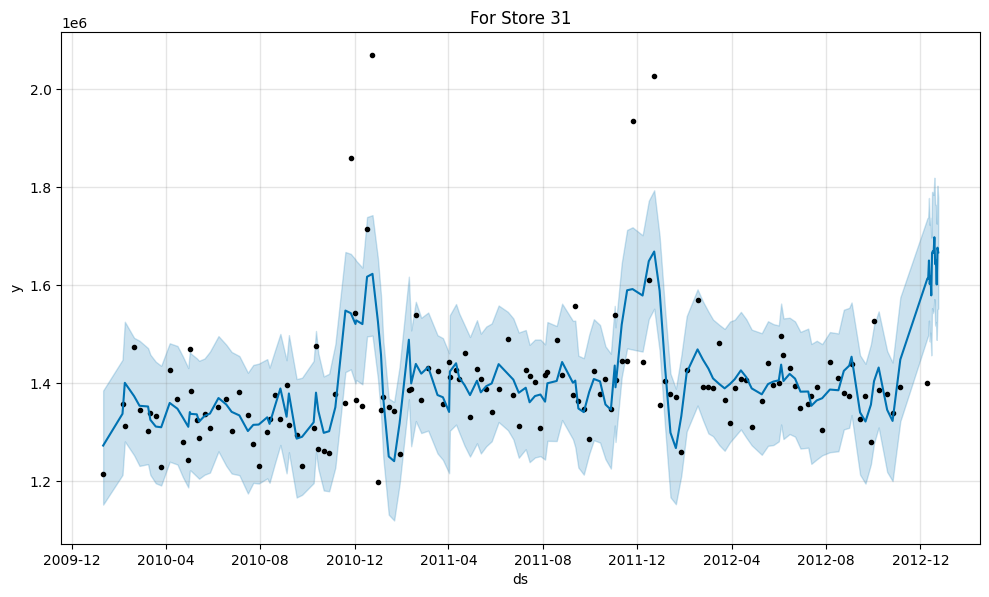

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/g6xvejtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/jhr1wb38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18981', 'data', 'file=/tmp/tmp9n0gyrwk/g6xvejtz.json', 'init=/tmp/tmp9n0gyrwk/jhr1wb38.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelml3jghyf/prophet_model-20231231054105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 32
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.426061e+06  1.292735e+06  1.555310e+06
143 2012-12-11  1.416952e+06  1.293753e+06  1.548218e+06
144 2012-12-12  1.407509e+06  1.263230e+06  1.550750e+06
145 2012-12-13  1.447669e+06  1.313360e+06  1.569735e+06
146 2012-12-14  1.500045e+06  1.366867e+06  1.629339e+06
147 2012-12-15  1.423650e+06  1.287669e+06  1.558126e+06
148 2012-12-16  1.553577e+06  1.426162e+06  1.688752e+06
149 2012-12-17  1.550495e+06  1.417094e+06  1.685835e+06
150 2012-12-18  1.532932e+06  1.404762e+06  1.662442e+06
151 2012-12-19  1.511907e+06  1.381004e+06  1.639902e+06
152 2012-12-20  1.537488e+06  1.404998e+06  1.672315e+06
153 2012-12-21  1.572497e+06  1.422630e+06  1.709895e+06
154 2012-12-22  1.476226e+06  1.345116e+06  1.600035e+06
155 2012-12-23  1.584115e+06  1.456982e+06  1.712957e+06
156 2012-12-24  1.557238e+06  1.429620e+06  1.690276e+06


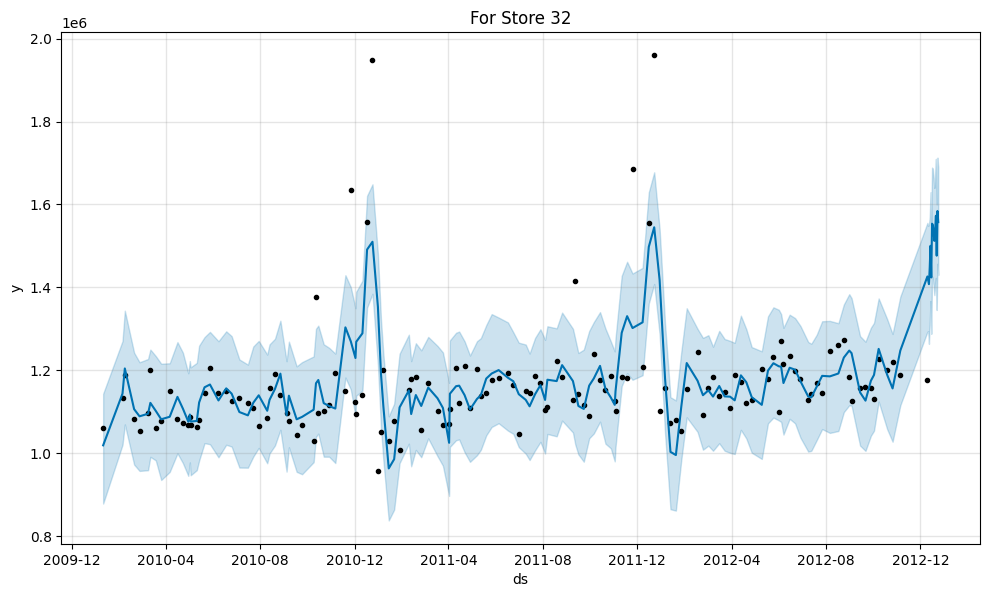

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/nl84y7k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7f7t1gnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94901', 'data', 'file=/tmp/tmp9n0gyrwk/nl84y7k9.json', 'init=/tmp/tmp9n0gyrwk/7f7t1gnp.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modeltxclfrsy/prophet_model-20231231054106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 33
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  297296.618464  272698.845515  323213.147071
143 2012-12-11  278982.555397  254687.772647  305318.336690
144 2012-12-12  287091.832565  262757.232345  312091.617559
145 2012-12-13  284724.837400  259779.065820  309317.576682
146 2012-12-14  267867.371626  244458.451367  292480.275889
147 2012-12-15  287394.306874  262070.109381  311101.928476
148 2012-12-16  263835.663353  238862.859775  289017.809235
149 2012-12-17  284424.260304  259046.695444  309109.765761
150 2012-12-18  265748.407542  242657.336183  289992.631689
151 2012-12-19  273679.555045  251876.836197  297798.581041
152 2012-12-20  271321.390102  247545.501311  294893.748961
153 2012-12-21  254659.525505  232941.207852  278449.057527
154 2012-12-22  274565.133665  250388.384974  299742.725270
155 2012-12-23  251561.076841  228410.038855  276526.861190
156 2012-12-24  272869.681788  248197.089561  296106.280143


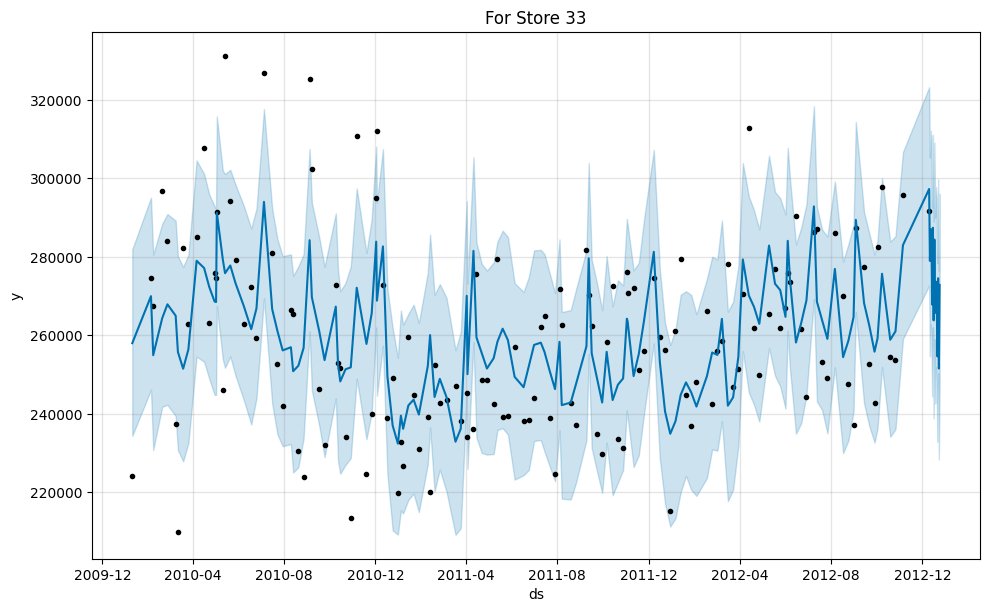

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7ilkmo_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/8d5gynqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79030', 'data', 'file=/tmp/tmp9n0gyrwk/7ilkmo_u.json', 'init=/tmp/tmp9n0gyrwk/8d5gynqk.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model3uoqojkl/prophet_model-20231231054107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 34
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.155649e+06  1.054228e+06  1.260589e+06
143 2012-12-11  1.178258e+06  1.080314e+06  1.278343e+06
144 2012-12-12  1.150804e+06  1.050092e+06  1.253496e+06
145 2012-12-13  1.169427e+06  1.071648e+06  1.275755e+06
146 2012-12-14  1.197517e+06  1.090737e+06  1.299638e+06
147 2012-12-15  1.184952e+06  1.083430e+06  1.281962e+06
148 2012-12-16  1.227839e+06  1.133473e+06  1.327383e+06
149 2012-12-17  1.251387e+06  1.152133e+06  1.354544e+06
150 2012-12-18  1.270478e+06  1.170469e+06  1.363986e+06
151 2012-12-19  1.237205e+06  1.141749e+06  1.326730e+06
152 2012-12-20  1.247732e+06  1.142868e+06  1.350209e+06
153 2012-12-21  1.265529e+06  1.162378e+06  1.364125e+06
154 2012-12-22  1.240605e+06  1.136144e+06  1.338507e+06
155 2012-12-23  1.269257e+06  1.173443e+06  1.372712e+06
156 2012-12-24  1.276926e+06  1.176462e+06  1.373963e+06


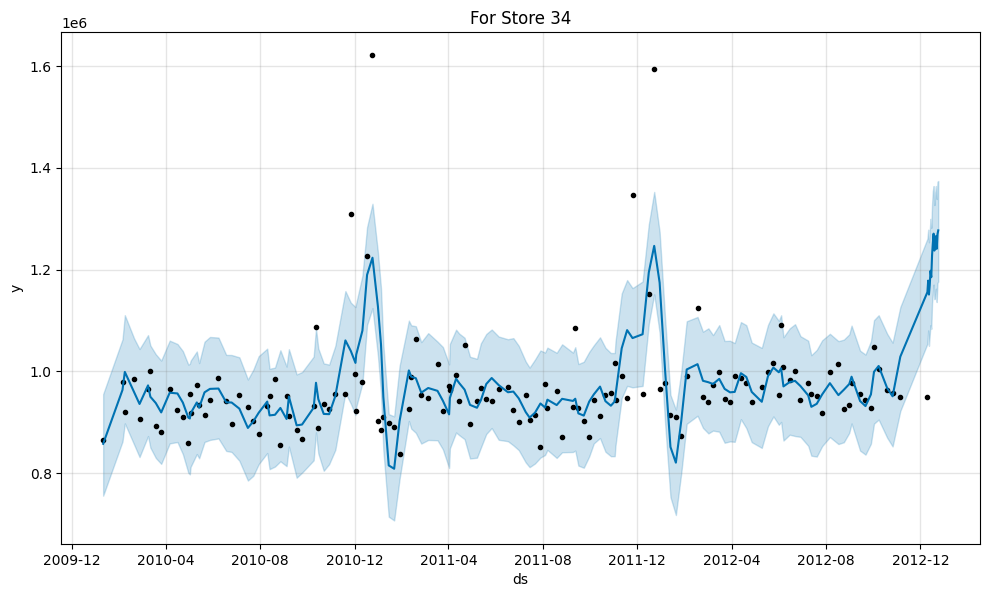

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/r7e08w4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/htygg69j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72636', 'data', 'file=/tmp/tmp9n0gyrwk/r7e08w4p.json', 'init=/tmp/tmp9n0gyrwk/htygg69j.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model74oc3l5u/prophet_model-20231231054108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 35
            ds          yhat     yhat_lower    yhat_upper
142 2012-12-10  1.064746e+06  882570.401294  1.238409e+06
143 2012-12-11  1.076234e+06  905964.573613  1.269152e+06
144 2012-12-12  1.032634e+06  861073.020504  1.217349e+06
145 2012-12-13  1.085598e+06  881248.369325  1.265835e+06
146 2012-12-14  1.089874e+06  899364.887887  1.284661e+06
147 2012-12-15  1.050530e+06  874892.138783  1.241485e+06
148 2012-12-16  1.120227e+06  927913.537609  1.291799e+06
149 2012-12-17  1.118346e+06  943896.583169  1.302635e+06
150 2012-12-18  1.129561e+06  949522.959897  1.315242e+06
151 2012-12-19  1.082901e+06  903867.621525  1.279746e+06
152 2012-12-20  1.129923e+06  955915.713796  1.323838e+06
153 2012-12-21  1.125361e+06  942056.199350  1.310527e+06
154 2012-12-22  1.074346e+06  908697.371644  1.256292e+06
155 2012-12-23  1.129686e+06  952340.532391  1.310603e+06
156 2012-12-24  1.110981e+06  932590.073648  1.293867e+06


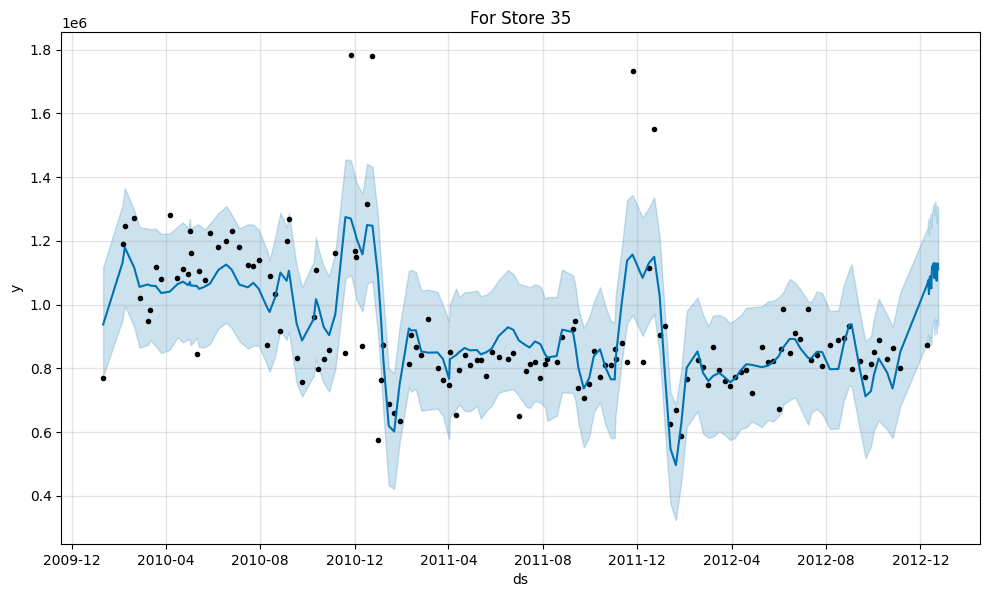

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/iugu8i70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7zj0iaj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79696', 'data', 'file=/tmp/tmp9n0gyrwk/iugu8i70.json', 'init=/tmp/tmp9n0gyrwk/7zj0iaj3.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_models93ffh_y/prophet_model-20231231054109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 36
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  304070.655266  274397.954866  335707.210560
143 2012-12-11  300545.017554  267918.489540  330727.034889
144 2012-12-12  306386.245185  273850.821167  335854.519647
145 2012-12-13  300642.024594  267728.948406  332511.066045
146 2012-12-14  285015.557061  254363.856920  315845.096622
147 2012-12-15  288275.370170  256629.694590  323249.191574
148 2012-12-16  277286.165406  246231.124628  308607.192965
149 2012-12-17  283500.951481  249689.173680  314887.521940
150 2012-12-18  277654.243730  247232.067062  308381.783459
151 2012-12-19  281519.130648  248823.864350  313961.744819
152 2012-12-20  274191.780992  243954.861217  305829.864278
153 2012-12-21  257414.738424  226430.292060  290683.558002
154 2012-12-22  259985.661040  229236.384305  291874.841504
155 2012-12-23  248787.357366  218046.385752  279063.930632
156 2012-12-24  255279.391491  225681.048850  287950.004357


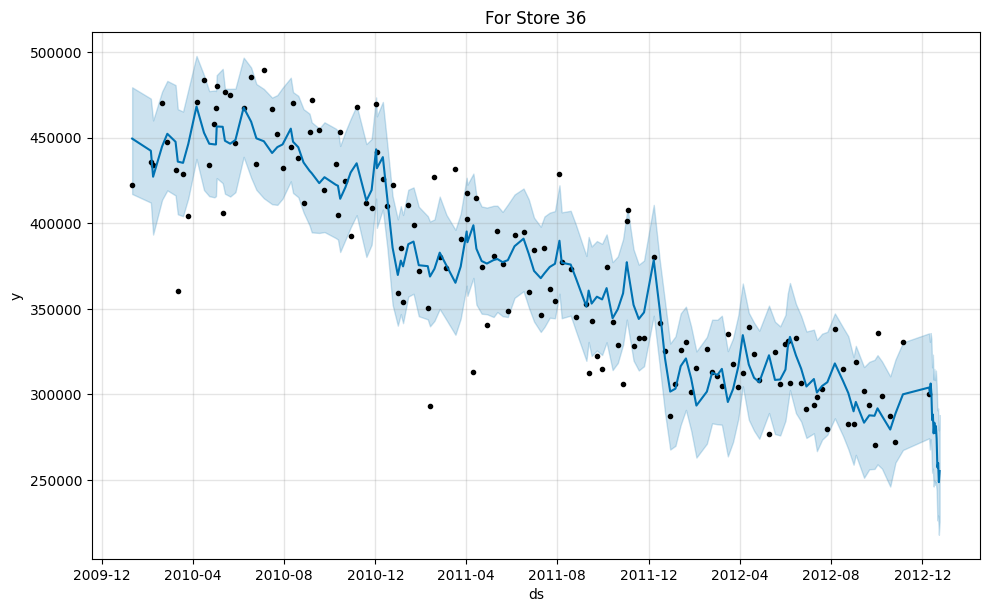

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/gkqbi015.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/5696z9fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59486', 'data', 'file=/tmp/tmp9n0gyrwk/gkqbi015.json', 'init=/tmp/tmp9n0gyrwk/5696z9fy.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelhwkrryg0/prophet_model-20231231054109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 37
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  550691.685362  527624.490848  573602.059317
143 2012-12-11  541580.625730  519293.401775  566933.746414
144 2012-12-12  545587.896070  522385.473581  569701.224990
145 2012-12-13  543702.058866  521751.468011  567510.930220
146 2012-12-14  537310.498826  513184.682188  559909.130726
147 2012-12-15  545121.342514  521745.045048  569081.121509
148 2012-12-16  540475.897972  517596.000936  564302.087713
149 2012-12-17  550535.490010  529110.512852  573631.291151
150 2012-12-18  540866.463508  518831.531118  565200.188043
151 2012-12-19  544387.937312  521144.067469  568169.755819
152 2012-12-20  542095.632941  517403.499233  564912.935556
153 2012-12-21  535382.109392  512145.047908  558296.362329
154 2012-12-22  542958.586728  519917.398810  567228.563648
155 2012-12-23  538167.340142  516187.702597  560108.762760
156 2012-12-24  548168.541337  524776.364776  571804.485281


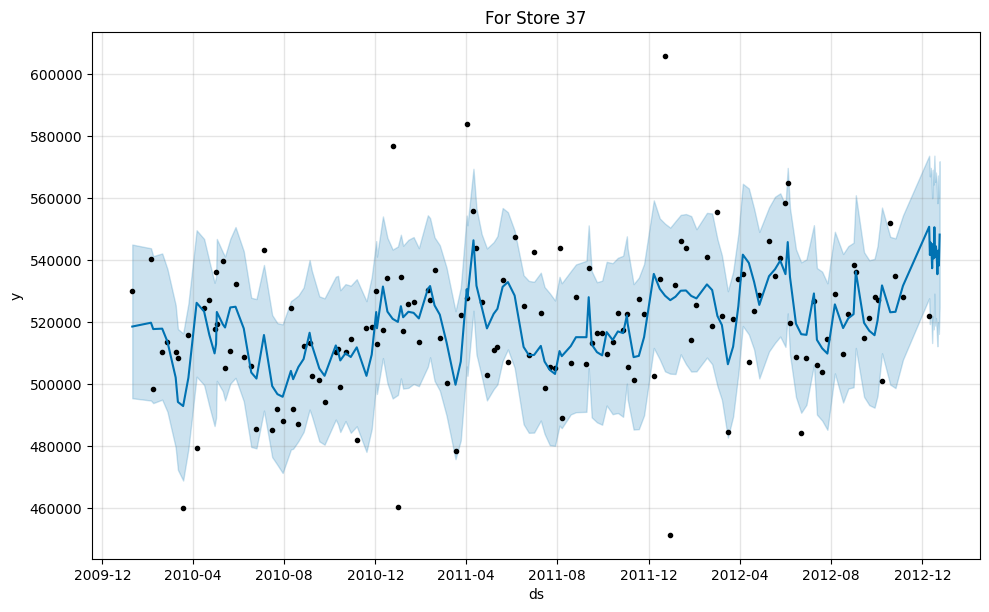

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ysb557kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/w_x87grr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69478', 'data', 'file=/tmp/tmp9n0gyrwk/ysb557kc.json', 'init=/tmp/tmp9n0gyrwk/w_x87grr.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelz85w0ste/prophet_model-20231231054111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 38
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  458912.712163  437052.780235  481249.216655
143 2012-12-11  453735.996978  431976.414357  477310.413643
144 2012-12-12  436878.361864  412789.580287  460437.057522
145 2012-12-13  442903.976178  420640.897293  465968.782395
146 2012-12-14  417397.700006  394076.545539  440230.197116
147 2012-12-15  436889.102107  414857.333167  459552.435549
148 2012-12-16  458272.679830  435966.040409  479561.857595
149 2012-12-17  460191.640348  436100.471113  483520.073843
150 2012-12-18  456532.550798  435219.859473  478151.788739
151 2012-12-19  441162.386169  418088.251031  463534.382915
152 2012-12-20  448612.425321  425201.063486  471340.399941
153 2012-12-21  424436.677504  402766.039851  446492.028208
154 2012-12-22  445136.700924  422206.806051  468585.941103
155 2012-12-23  467582.540771  443163.896214  489700.838975
156 2012-12-24  470397.126427  448275.672363  492530.351503


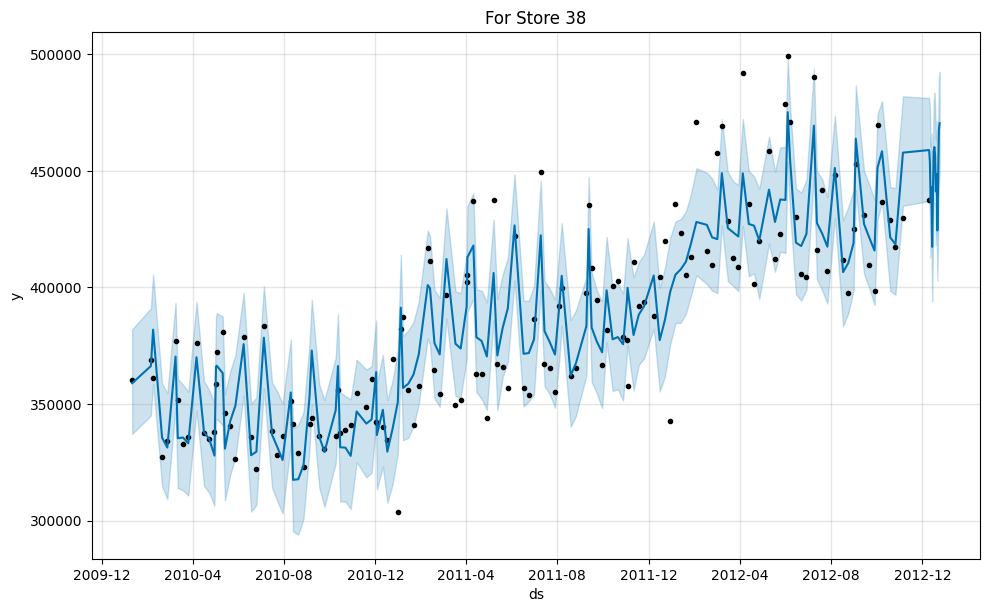

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/ag4teat8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/n2_f17i0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28787', 'data', 'file=/tmp/tmp9n0gyrwk/ag4teat8.json', 'init=/tmp/tmp9n0gyrwk/n2_f17i0.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modeluvsfonc_/prophet_model-20231231054112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 39
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.853814e+06  1.652567e+06  2.039236e+06
143 2012-12-11  1.858890e+06  1.650435e+06  2.052708e+06
144 2012-12-12  1.780897e+06  1.579923e+06  1.969962e+06
145 2012-12-13  1.880852e+06  1.687275e+06  2.075934e+06
146 2012-12-14  1.935713e+06  1.758086e+06  2.137343e+06
147 2012-12-15  1.884039e+06  1.701087e+06  2.074262e+06
148 2012-12-16  2.018580e+06  1.833005e+06  2.205006e+06
149 2012-12-17  2.053583e+06  1.844202e+06  2.238944e+06
150 2012-12-18  2.057584e+06  1.850165e+06  2.247260e+06
151 2012-12-19  1.973486e+06  1.783812e+06  2.176089e+06
152 2012-12-20  2.062253e+06  1.856754e+06  2.253571e+06
153 2012-12-21  2.100916e+06  1.892340e+06  2.290830e+06
154 2012-12-22  2.028240e+06  1.828213e+06  2.225229e+06
155 2012-12-23  2.137302e+06  1.927159e+06  2.337847e+06
156 2012-12-24  2.142797e+06  1.956149e+06  2.331217e+06


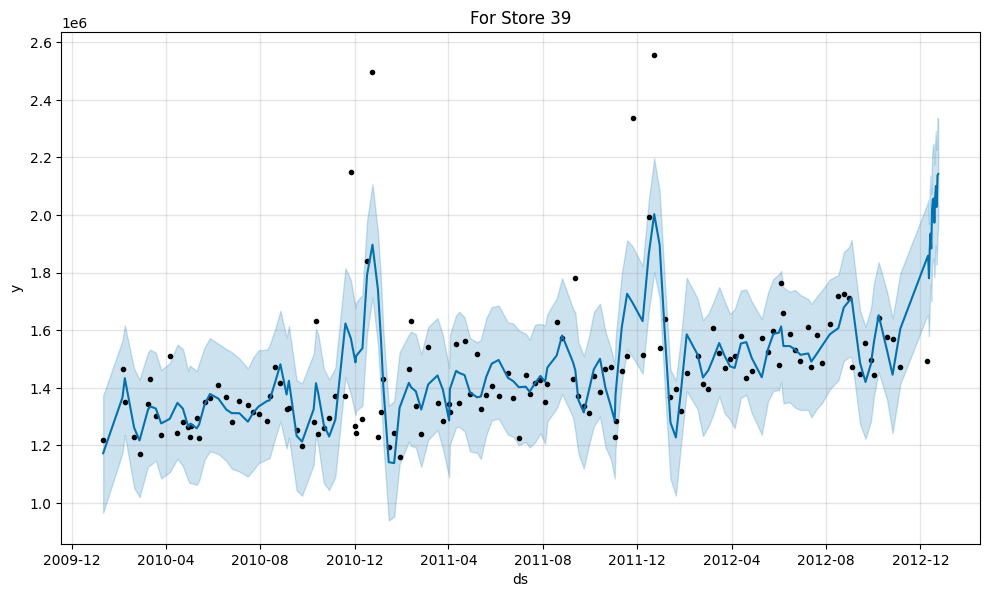

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/54hf4idi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/9cktmpdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25068', 'data', 'file=/tmp/tmp9n0gyrwk/54hf4idi.json', 'init=/tmp/tmp9n0gyrwk/9cktmpdp.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelevz6bi7t/prophet_model-20231231054113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 40
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.149395e+06  1.041902e+06  1.256068e+06
143 2012-12-11  1.161000e+06  1.060281e+06  1.271592e+06
144 2012-12-12  1.113144e+06  1.006600e+06  1.219843e+06
145 2012-12-13  1.197840e+06  1.090537e+06  1.304826e+06
146 2012-12-14  1.162167e+06  1.059272e+06  1.268373e+06
147 2012-12-15  1.185067e+06  1.081966e+06  1.304792e+06
148 2012-12-16  1.328436e+06  1.230631e+06  1.431432e+06
149 2012-12-17  1.300383e+06  1.193686e+06  1.412137e+06
150 2012-12-18  1.306276e+06  1.208723e+06  1.411205e+06
151 2012-12-19  1.249369e+06  1.142915e+06  1.358682e+06
152 2012-12-20  1.321751e+06  1.215915e+06  1.427837e+06
153 2012-12-21  1.270662e+06  1.158701e+06  1.373720e+06
154 2012-12-22  1.275275e+06  1.160134e+06  1.384994e+06
155 2012-12-23  1.397794e+06  1.293268e+06  1.500653e+06
156 2012-12-24  1.346695e+06  1.243979e+06  1.451654e+06


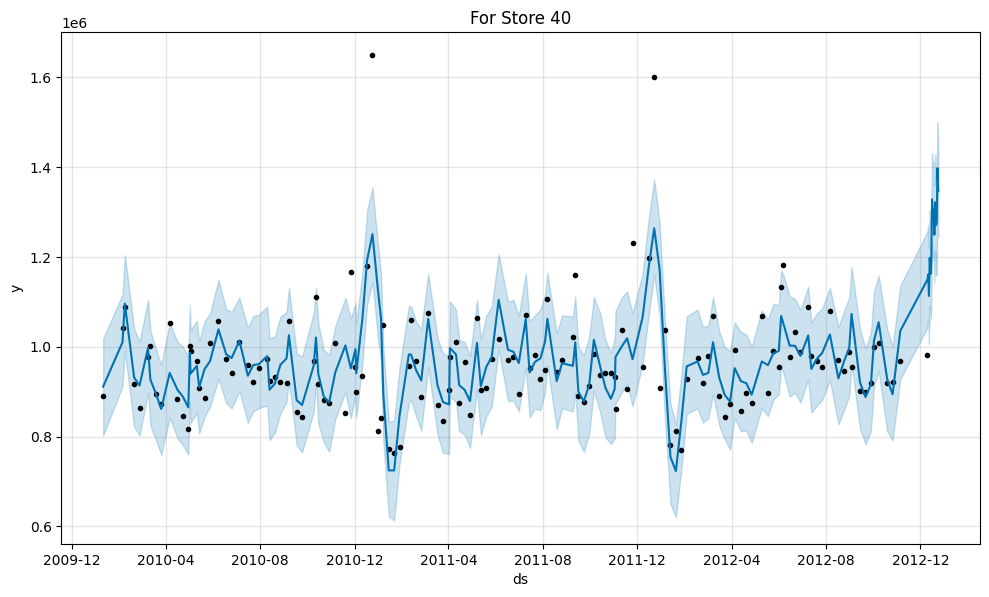

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/56qphh7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/0ew1ftqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95200', 'data', 'file=/tmp/tmp9n0gyrwk/56qphh7o.json', 'init=/tmp/tmp9n0gyrwk/0ew1ftqt.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelt0e5mhks/prophet_model-20231231054114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 41
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  1.627593e+06  1.445508e+06  1.797756e+06
143 2012-12-11  1.657660e+06  1.492708e+06  1.840010e+06
144 2012-12-12  1.611333e+06  1.430492e+06  1.779244e+06
145 2012-12-13  1.671808e+06  1.499182e+06  1.841733e+06
146 2012-12-14  1.707400e+06  1.538843e+06  1.882728e+06
147 2012-12-15  1.655923e+06  1.493261e+06  1.831017e+06
148 2012-12-16  1.830087e+06  1.659304e+06  2.000127e+06
149 2012-12-17  1.813814e+06  1.638201e+06  1.989310e+06
150 2012-12-18  1.837191e+06  1.671007e+06  2.014844e+06
151 2012-12-19  1.779808e+06  1.604782e+06  1.941077e+06
152 2012-12-20  1.824946e+06  1.653863e+06  1.990709e+06
153 2012-12-21  1.841114e+06  1.662154e+06  2.011463e+06
154 2012-12-22  1.766422e+06  1.596092e+06  1.941475e+06
155 2012-12-23  1.913969e+06  1.754032e+06  2.083496e+06
156 2012-12-24  1.868160e+06  1.695182e+06  2.039025e+06


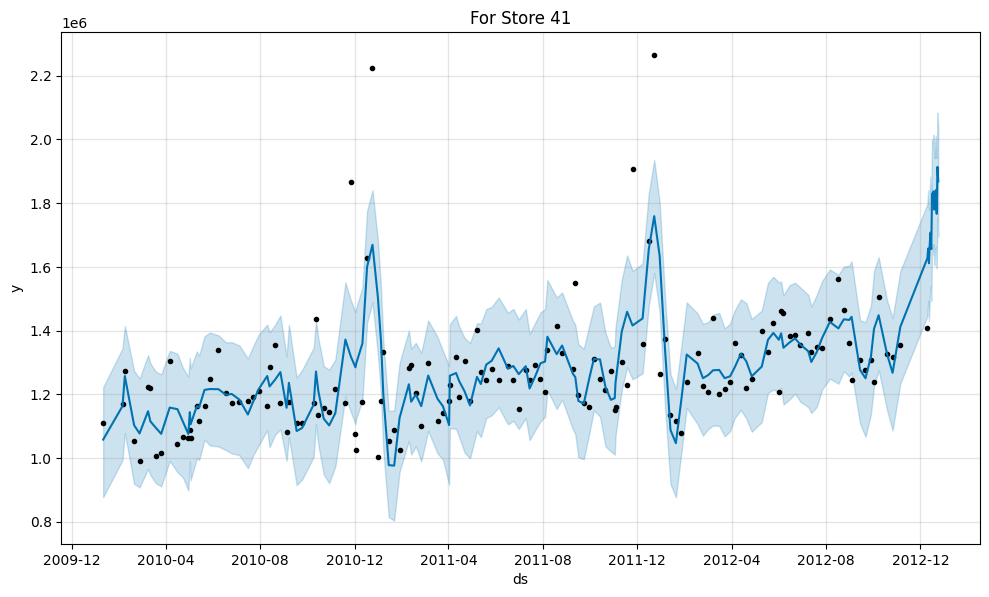

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/7rs_gydn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/guwl3mm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74251', 'data', 'file=/tmp/tmp9n0gyrwk/7rs_gydn.json', 'init=/tmp/tmp9n0gyrwk/guwl3mm6.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model_c9wq_s0/prophet_model-20231231054115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 42
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  644903.223086  600603.464052  690027.504872
143 2012-12-11  641670.723315  598882.166221  686782.206219
144 2012-12-12  620146.395800  579388.470469  666821.713507
145 2012-12-13  610170.306933  567646.668028  659518.561729
146 2012-12-14  569593.546032  519075.493164  613912.256084
147 2012-12-15  616199.874228  567764.634438  664918.016361
148 2012-12-16  598044.489840  555387.998964  644612.120564
149 2012-12-17  616275.592454  569312.757877  659821.807252
150 2012-12-18  611686.260826  568669.410223  659316.467747
151 2012-12-19  589253.967708  541050.623846  633462.288106
152 2012-12-20  578852.741339  532397.618127  624903.954718
153 2012-12-21  538357.857062  490891.203158  581002.729349
154 2012-12-22  585566.678681  536293.007449  630630.286674
155 2012-12-23  568536.861127  520653.866644  615473.136968
156 2012-12-24  588407.614633  544744.869416  635203.154211


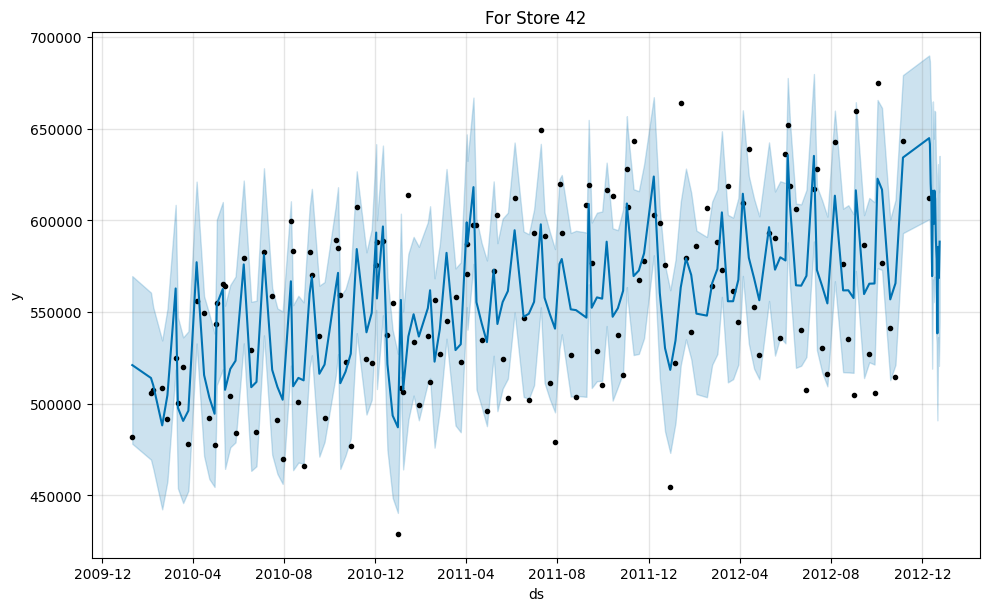

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/91q70u08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/vrujn5p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77726', 'data', 'file=/tmp/tmp9n0gyrwk/91q70u08.json', 'init=/tmp/tmp9n0gyrwk/vrujn5p4.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_model9hqyjz68/prophet_model-20231231054116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 43
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  630842.833751  587925.293925  676822.239776
143 2012-12-11  632060.518964  585195.439125  673089.914523
144 2012-12-12  602800.924491  557426.530585  646624.681643
145 2012-12-13  619528.424423  572836.592693  665947.909350
146 2012-12-14  601944.970565  561138.376781  642789.374278
147 2012-12-15  620440.384209  573599.453235  666350.094074
148 2012-12-16  606074.907850  562731.770667  648906.242555
149 2012-12-17  616157.618010  574145.240972  659398.943668
150 2012-12-18  616992.477226  571177.688703  658668.578556
151 2012-12-19  587538.643516  546081.176921  634658.057854
152 2012-12-20  604262.876219  562243.044860  646995.595134
153 2012-12-21  586865.963199  540526.834284  627434.807937
154 2012-12-22  605733.103999  561373.168376  647663.173125
155 2012-12-23  591916.626509  545191.751062  636473.495185
156 2012-12-24  602714.632526  559051.274321  643664.495681


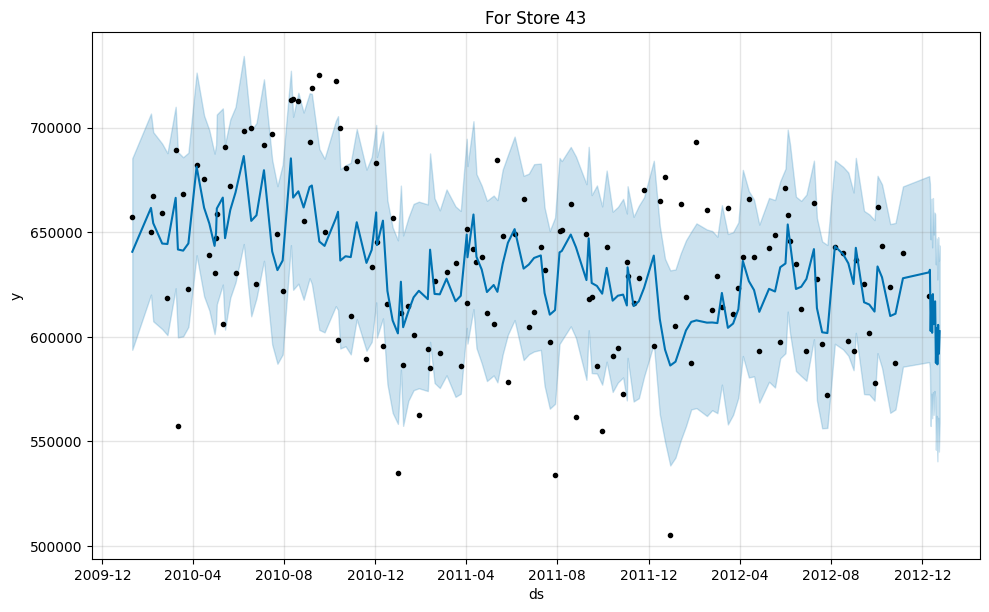

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/rk1_l35e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/82ec6_b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48295', 'data', 'file=/tmp/tmp9n0gyrwk/rk1_l35e.json', 'init=/tmp/tmp9n0gyrwk/82ec6_b1.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modela5_44ps1/prophet_model-20231231054117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 44
            ds           yhat     yhat_lower     yhat_upper
142 2012-12-10  343782.150145  326883.187291  360524.760748
143 2012-12-11  346098.007390  329486.490144  363929.162645
144 2012-12-12  359794.523490  342444.618146  376765.345959
145 2012-12-13  355179.158121  337093.703929  372270.548911
146 2012-12-14  352273.667104  335164.131865  369832.236699
147 2012-12-15  349960.933736  333777.609550  367055.080255
148 2012-12-16  364927.711462  347204.770197  383945.415843
149 2012-12-17  354483.040271  337249.639899  372870.897416
150 2012-12-18  356250.172972  339314.833713  373895.259765
151 2012-12-19  369211.735368  352769.298319  386146.805781
152 2012-12-20  363693.428078  345572.011715  381972.477752
153 2012-12-21  359738.931099  342180.002740  377687.278411
154 2012-12-22  356256.161125  337572.794741  374048.112833
155 2012-12-23  369959.368816  352518.857387  388508.962181
156 2012-12-24  358186.855427  341096.181298  376018.804523


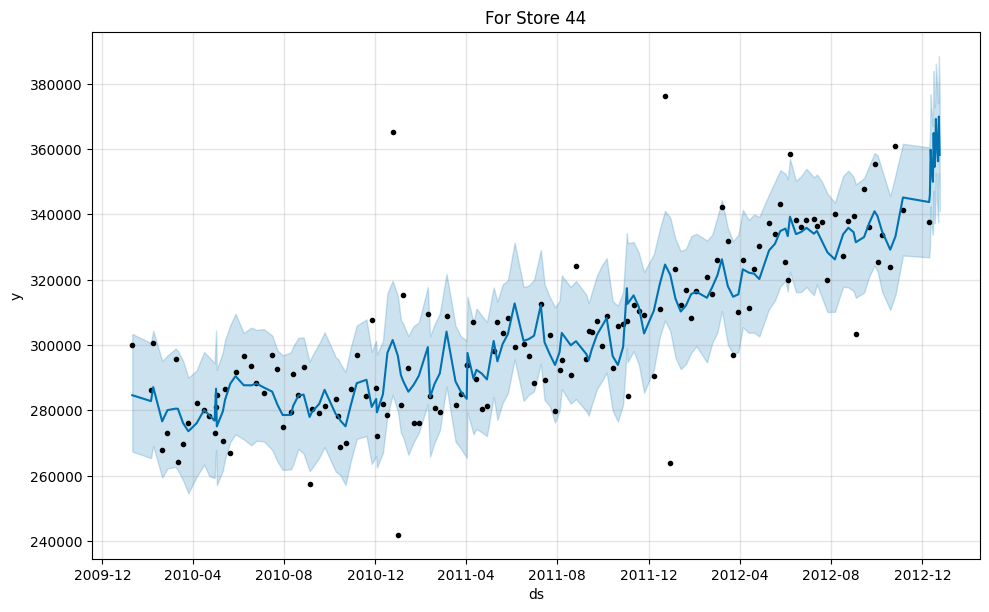

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/p6rir8x9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9n0gyrwk/sxdazker.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72707', 'data', 'file=/tmp/tmp9n0gyrwk/p6rir8x9.json', 'init=/tmp/tmp9n0gyrwk/sxdazker.json', 'output', 'file=/tmp/tmp9n0gyrwk/prophet_modelfzjn_1_9/prophet_model-20231231054119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FOR STORE 45
            ds          yhat    yhat_lower    yhat_upper
142 2012-12-10  9.568698e+05  8.315377e+05  1.081879e+06
143 2012-12-11  9.680984e+05  8.436570e+05  1.077892e+06
144 2012-12-12  9.178315e+05  7.990340e+05  1.045157e+06
145 2012-12-13  9.800053e+05  8.612212e+05  1.103378e+06
146 2012-12-14  1.039255e+06  9.118621e+05  1.154971e+06
147 2012-12-15  1.024601e+06  9.104448e+05  1.143638e+06
148 2012-12-16  1.122536e+06  1.005786e+06  1.240713e+06
149 2012-12-17  1.132996e+06  1.010825e+06  1.252827e+06
150 2012-12-18  1.138327e+06  1.028594e+06  1.260322e+06
151 2012-12-19  1.078273e+06  9.580043e+05  1.190910e+06
152 2012-12-20  1.126850e+06  1.009879e+06  1.249383e+06
153 2012-12-21  1.168867e+06  1.040468e+06  1.288460e+06
154 2012-12-22  1.133608e+06  1.015969e+06  1.250763e+06
155 2012-12-23  1.207911e+06  1.088295e+06  1.330453e+06
156 2012-12-24  1.192130e+06  1.063728e+06  1.306420e+06


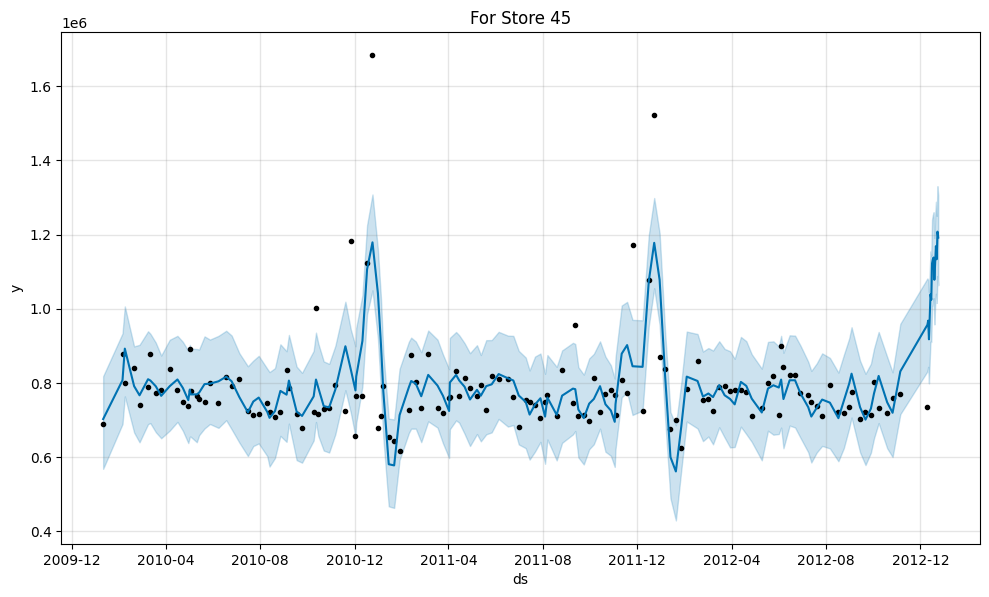

In [683]:
for i in range(1, 46):
  store_i = df[df['Store']==i]
  sorted_store_i = store_i.sort_values(by='Date')
  for_p = sorted_store_i[['Date', 'Weekly_Sales']]
  for_p = for_p.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
  m = Prophet()
  m.fit(for_p)
  future = m.make_future_dataframe(periods = 14, freq = 'D')
  forecast = m.predict(future)
  print_prediction(forecast, m, i)